# Proposal Process

### Step 1. Import necessary libraries

In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#Model Building and Evaluation
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, multilabel_confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve
from sklearn.metrics import ConfusionMatrixDisplay

##### Models

In [4]:
#pip install xgboost

In [5]:
#pip install lightgbm

In [6]:
#pip install catboost

In [7]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

#KNN Model
from sklearn.neighbors import KNeighborsClassifier

#KNN Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

# Decision Tree
from sklearn.tree import DecisionTreeClassifier,plot_tree

#Random Forest, Bagging, Voting
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, VotingClassifier

#SVM
from sklearn.svm import SVC

# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB

#AdaBoost
from sklearn.ensemble import AdaBoostClassifier

#XGBoost
from xgboost import XGBClassifier

#Light GBM
from lightgbm import LGBMClassifier

#catBoost
from catboost import CatBoostClassifier

#Gradient Boosting classifier (GBM)
from sklearn.ensemble import GradientBoostingClassifier

In [8]:
#SMOTE
#pip install imblearn
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler

### Step 2. Data Gathering

In [9]:
df = pd.read_excel("Dataset.xlsx")
df.head()

file_name PGR_Version  \
0  \\euiecrkfile002\Shared001\Proposals\01 Intros...   PGR 2.6.1   
1  \\euiecrkfile002\Shared001\Proposals\01 Intros...     PGR 1.6   
2  \\euiecrkfile002\Shared001\Proposals\01 Intros...     PGR 2.6   
3  \\euiecrkfile002\Shared001\Proposals\01 Intros...   PGR 2.6.1   
4  \\euiecrkfile002\Shared001\Proposals\01 Intros...     PGR 2.3   

  Proposal_Number Quote_Number  RA_Product_Cost  RA_Product_Quote  \
0             .0.       0080F1          3049.59           5180.67   
1        30187300          NaN         24080.00          36932.67   
2        30350506          NaN             0.00              0.00   
3             .0.       0081F1             0.00              0.00   
4        30328031   30328031.1           402.04           2295.88   

   RA_Labor_Hours  RA_Labor_Cost  RA_Labor_Quote  RA_Service_Hours  ...  \
0          150.00        8336.21        11492.93               0.0  ...   
1         1616.30      104615.30       152723.07               0.0  ...   
2         1240.02      102720.09       145702.25               0.0  ...   
3           29.00        1526.20         2152.38               0.0  ...   
4          528.00       38253.29        57164.80               0.0  ...   

           Opp_Industry  Country       Offering  FP_Proposed_Date  \
0                 Other  Ireland  PRO - Process     FY2023 Q3 Jun   
1         Life Sciences  Ireland  PRO - Process     FY2021 Q3 May   
2         Life Sciences  Ireland  PRO - Process     FY2023 Q2 Feb   
3         Life Sciences  Ireland  PRO - Process     FY2023 Q3 Jun   
4  Chemicals & Plastics  Ireland  PRO - Process     FY2022 Q4 Aug   

   FP_Closed_date  Reporting_Price_US  Matching  KPI_BlendLaborRate  \
0   FY2023 Q3 Jun             27296.8  0.999998           76.619533   
1   FY2023 Q2 Jan            184962.0  0.937502           94.489309   
2   FY2023 Q4 Sep            145702.0  0.999998          117.499919   
3   FY2023 Q4 Jul              3937.5  1.000000           74.220000   
4   FY2023 Q1 Oct             60561.9  0.937498          108.266667   

   KPI_BlendLaborCost  BlendLabor_Margin  
0           55.574733           0.274666  
1           64.725175           0.315000  
2           82.837446           0.295000  
3           52.627586           0.290924  
4           72.449413           0.330824  

[5 rows x 39 columns]

### Step 3. EDA

##### 3.1 Shape

In [10]:
df.shape

(1861, 39)

##### knowHow:
      -> 39 features : 38 Independent, 1 dependent
      -> 1861 records

##### 3.2 Info

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1861 entries, 0 to 1860
Data columns (total 39 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   file_name                1861 non-null   object 
 1   PGR_Version              1861 non-null   object 
 2   Proposal_Number          1855 non-null   object 
 3   Quote_Number             1674 non-null   object 
 4   RA_Product_Cost          1859 non-null   float64
 5   RA_Product_Quote         1859 non-null   float64
 6   RA_Labor_Hours           1859 non-null   float64
 7   RA_Labor_Cost            1858 non-null   float64
 8   RA_Labor_Quote           1858 non-null   float64
 9   RA_Service_Hours         1861 non-null   float64
 10  RA_Service_Cost          1859 non-null   float64
 11  RA_Service_Quote         1859 non-null   float64
 12  Third_Party_Hours        1861 non-null   float64
 13  Third_Party_Cost         1858 non-null   float64
 14  Third_Party_Quote       

##### 3.3 describe

In [12]:
df.describe()

RA_Product_Cost  RA_Product_Quote  RA_Labor_Hours  RA_Labor_Cost  \
count     1.859000e+03      1.859000e+03     1859.000000   1.858000e+03   
mean      3.937056e+04      1.224385e+05     2395.190124   1.738079e+05   
std       1.239034e+05      3.684759e+05     6807.821520   5.062453e+05   
min      -3.184740e+03     -5.600000e+03        0.000000   0.000000e+00   
25%       0.000000e+00      0.000000e+00      193.000000   1.420623e+04   
50%       3.623750e+03      1.600358e+04      528.000000   3.687832e+04   
75%       2.456544e+04      7.929371e+04     1482.850000   1.095219e+05   
max       1.224432e+06      4.172626e+06    69742.500000   5.224680e+06   

       RA_Labor_Quote  RA_Service_Hours  RA_Service_Cost  RA_Service_Quote  \
count    1.858000e+03       1861.000000     1.859000e+03      1.859000e+03   
mean     2.513234e+05         62.486518     1.142629e+04      1.695779e+04   
std      7.448485e+05        461.020578     6.216464e+04      8.983955e+04   
min      0.000000e+00          0.000000     0.000000e+00      0.000000e+00   
25%      2.009459e+04          0.000000     0.000000e+00      0.000000e+00   
50%      5.489248e+04          0.000000     0.000000e+00      0.000000e+00   
75%      1.615468e+05          0.000000     0.000000e+00      0.000000e+00   
max      8.034665e+06       7950.110000     1.299301e+06      1.953835e+06   

       Third_Party_Hours  Third_Party_Cost  ...  Total_Project_Quote  \
count        1861.000000      1.858000e+03  ...         1.857000e+03   
mean           37.802703      4.938349e+05  ...         1.008410e+06   
std           379.015467      3.860764e+06  ...         5.846851e+06   
min             0.000000      0.000000e+00  ...         0.000000e+00   
25%             0.000000      0.000000e+00  ...         3.445462e+04   
50%             0.000000      5.032470e+03  ...         1.160272e+05   
75%             0.000000      3.657644e+04  ...         3.086869e+05   
max          8317.490000      3.868898e+07  ...         6.009542e+07   

       Voted_PROMS_Number   Proposal No      Version  Max Version  \
count        1.861000e+03  1.861000e+03  1861.000000  1861.000000   
mean         3.026079e+07  3.026079e+07     1.637829     2.461042   
std          9.304583e+04  9.304585e+04     1.161177     1.777461   
min          3.000773e+07  3.000773e+07     1.000000     1.000000   
25%          3.018999e+07  3.018999e+07     1.000000     1.000000   
50%          3.026631e+07  3.026631e+07     1.000000     2.000000   
75%          3.033304e+07  3.033304e+07     2.000000     3.000000   
max          3.044918e+07  3.044918e+07    10.000000    11.000000   

       Reporting_Price_US     Matching  KPI_BlendLaborRate  \
count        1.861000e+03  1861.000000         1861.000000   
mean         1.022889e+06     1.089736          105.583606   
std          5.791084e+06     1.654298           35.598218   
min          0.000000e+00     0.000000            0.000000   
25%          3.044380e+04     0.776318           88.269410   
50%          1.036510e+05     0.999998          102.266504   
75%          2.856000e+05     1.000000          118.667475   
max          5.210870e+07    34.791912          309.960000   

       KPI_BlendLaborCost  BlendLabor_Margin  
count         1861.000000        1861.000000  
mean            73.924656           0.287272  
std             22.853641           0.136408  
min              0.000000          -2.719731  
25%             63.425000           0.276127  
50%             72.747847           0.288001  
75%             81.889859           0.309975  
max            219.888000           0.589883  

[8 rows x 27 columns]

##### Knowhow
     -> Data Types of all columns are  of integer, float and object
     -> int : It represents interger variables
     -> object : It represents object which are categorical in nature
     -> No column has null values.

##### 3.4 Statistical Analysis

In [13]:
df_stats = (df.describe().T).style.background_gradient(cmap='Reds')
df_stats

knowhow :
Darker red: Indicates higher numerical values within the column.
Lighter red: Indicates lower numerical values within the column.

Std : a higher standard deviation implies greater variability or dispersion of data points around the mean, suggesting that the data might be more spread out and less clustered around the average value

In [14]:
df_obj = (df.describe(include='object').T).style.background_gradient(cmap='Blues')
df_obj

##### 3.4 isna/isnull

In [15]:
df.isna().sum()

file_name                    0
PGR_Version                  0
Proposal_Number              6
Quote_Number               187
RA_Product_Cost              2
RA_Product_Quote             2
RA_Labor_Hours               2
RA_Labor_Cost                3
RA_Labor_Quote               3
RA_Service_Hours             0
RA_Service_Cost              2
RA_Service_Quote             2
Third_Party_Hours            0
Third_Party_Cost             3
Third_Party_Quote            3
Recovered_Project_Cost       2
Recovered_Project_Quote      2
Absorbed_Project_Cost        3
Absorbed_Project_Quote       3
Total_Project_Hours          2
Total_Project_Cost           4
Total_Project_Quote          4
Voted_PROMS_Number           0
Proposal No                  0
Version                      0
Max Version                  0
Sold To                      0
End Customer                 0
Opportunity_Status           0
Opp_Industry                 0
Country                      0
Offering                     0
FP_Propo

In [16]:
df.isnull().sum()

file_name                    0
PGR_Version                  0
Proposal_Number              6
Quote_Number               187
RA_Product_Cost              2
RA_Product_Quote             2
RA_Labor_Hours               2
RA_Labor_Cost                3
RA_Labor_Quote               3
RA_Service_Hours             0
RA_Service_Cost              2
RA_Service_Quote             2
Third_Party_Hours            0
Third_Party_Cost             3
Third_Party_Quote            3
Recovered_Project_Cost       2
Recovered_Project_Quote      2
Absorbed_Project_Cost        3
Absorbed_Project_Quote       3
Total_Project_Hours          2
Total_Project_Cost           4
Total_Project_Quote          4
Voted_PROMS_Number           0
Proposal No                  0
Version                      0
Max Version                  0
Sold To                      0
End Customer                 0
Opportunity_Status           0
Opp_Industry                 0
Country                      0
Offering                     0
FP_Propo

knowhow 

##### 3.5 Duplicates

In [17]:
df.duplicated().sum()

0

##### 3.6 columns

In [18]:
df.columns

Index(['file_name', 'PGR_Version', 'Proposal_Number', 'Quote_Number',
       'RA_Product_Cost', 'RA_Product_Quote', 'RA_Labor_Hours',
       'RA_Labor_Cost', 'RA_Labor_Quote', 'RA_Service_Hours',
       'RA_Service_Cost', 'RA_Service_Quote', 'Third_Party_Hours',
       'Third_Party_Cost', 'Third_Party_Quote', 'Recovered_Project_Cost',
       'Recovered_Project_Quote', 'Absorbed_Project_Cost',
       'Absorbed_Project_Quote', 'Total_Project_Hours', 'Total_Project_Cost',
       'Total_Project_Quote', 'Voted_PROMS_Number', 'Proposal No', 'Version',
       'Max Version', 'Sold To', 'End Customer', 'Opportunity_Status',
       'Opp_Industry', 'Country', 'Offering', 'FP_Proposed_Date',
       'FP_Closed_date', 'Reporting_Price_US', 'Matching',
       'KPI_BlendLaborRate', 'KPI_BlendLaborCost', 'BlendLabor_Margin'],
      dtype='object')

In [19]:
len(df.columns)

39

Features and their Importance:

In [20]:
#

##### 3.7 Correlation / Heatmap

In [21]:
df.columns

Index(['file_name', 'PGR_Version', 'Proposal_Number', 'Quote_Number',
       'RA_Product_Cost', 'RA_Product_Quote', 'RA_Labor_Hours',
       'RA_Labor_Cost', 'RA_Labor_Quote', 'RA_Service_Hours',
       'RA_Service_Cost', 'RA_Service_Quote', 'Third_Party_Hours',
       'Third_Party_Cost', 'Third_Party_Quote', 'Recovered_Project_Cost',
       'Recovered_Project_Quote', 'Absorbed_Project_Cost',
       'Absorbed_Project_Quote', 'Total_Project_Hours', 'Total_Project_Cost',
       'Total_Project_Quote', 'Voted_PROMS_Number', 'Proposal No', 'Version',
       'Max Version', 'Sold To', 'End Customer', 'Opportunity_Status',
       'Opp_Industry', 'Country', 'Offering', 'FP_Proposed_Date',
       'FP_Closed_date', 'Reporting_Price_US', 'Matching',
       'KPI_BlendLaborRate', 'KPI_BlendLaborCost', 'BlendLabor_Margin'],
      dtype='object')

In [22]:
df1=df.drop(['file_name','PGR_Version','Proposal_Number', 'Quote_Number','Voted_PROMS_Number', 'Proposal No', 'Version','Max Version', 'Sold To',
             'End Customer','Opp_Industry','Country','FP_Proposed_Date','FP_Closed_date', 'Matching','Offering','BlendLabor_Margin'],axis=1)

In [23]:
df1.columns

Index(['RA_Product_Cost', 'RA_Product_Quote', 'RA_Labor_Hours',
       'RA_Labor_Cost', 'RA_Labor_Quote', 'RA_Service_Hours',
       'RA_Service_Cost', 'RA_Service_Quote', 'Third_Party_Hours',
       'Third_Party_Cost', 'Third_Party_Quote', 'Recovered_Project_Cost',
       'Recovered_Project_Quote', 'Absorbed_Project_Cost',
       'Absorbed_Project_Quote', 'Total_Project_Hours', 'Total_Project_Cost',
       'Total_Project_Quote', 'Opportunity_Status', 'Reporting_Price_US',
       'KPI_BlendLaborRate', 'KPI_BlendLaborCost'],
      dtype='object')

In [24]:
df2=df1.copy()

In [25]:
df1

RA_Product_Cost  RA_Product_Quote  RA_Labor_Hours  RA_Labor_Cost  \
0             3049.59           5180.67          150.00        8336.21   
1            24080.00          36932.67         1616.30      104615.30   
2                0.00              0.00         1240.02      102720.09   
3                0.00              0.00           29.00        1526.20   
4              402.04           2295.88          528.00       38253.29   
...               ...               ...             ...            ...   
1856          1493.27          22937.71          261.00       16961.07   
1857             0.00              0.00         1017.00       61200.82   
1858          2026.73          53400.64          953.00       73636.10   
1859          7553.93          67939.44          953.00       73636.10   
1860          2955.90          11263.20           32.00        1904.26   

      RA_Labor_Quote  RA_Service_Hours  RA_Service_Cost  RA_Service_Quote  \
0           11492.93               0.0              0.0               0.0   
1          152723.07               0.0              0.0               0.0   
2          145702.25               0.0              0.0               0.0   
3            2152.38               0.0              0.0               0.0   
4           57164.80               0.0              0.0               0.0   
...              ...               ...              ...               ...   
1856        23101.42               0.0              0.0               0.0   
1857        90955.43               0.0              0.0               0.0   
1858        96433.35               0.0              0.0               0.0   
1859        96433.35               0.0              0.0               0.0   
1860         2551.17               0.0              0.0               0.0   

      Third_Party_Hours  Third_Party_Cost  ...  Recovered_Project_Quote  \
0                   1.0           9029.58  ...                     0.00   
1                   0.0           4605.44  ...                  2218.40   
2                   0.0              0.00  ...                     0.00   
3                   0.0           1426.92  ...                     0.00   
4                   0.0           5264.00  ...                     0.00   
...                 ...               ...  ...                      ...   
1856                0.0           1102.76  ...                     0.00   
1857                0.0              0.00  ...                     0.00   
1858                0.0            380.00  ...                 45332.49   
1859                0.0            380.00  ...                 45332.49   
1860                0.0              0.00  ...                     0.00   

      Absorbed_Project_Cost  Absorbed_Project_Quote  Total_Project_Hours  \
0                      0.00                    0.00               151.00   
1                   6759.20                    0.00              1616.30   
2                   2054.85                    0.00              1240.02   
3                      0.00                    0.00                29.00   
4                   3825.25                -2240.00               528.00   
...                     ...                     ...                  ...   
1856                3800.00               -16536.69               261.00   
1857                1900.00                -7429.38              1017.00   
1858               19000.00                -1615.04               953.00   
1859               11400.00               -24893.84               953.00   
1860                 456.00                -2551.17                32.00   

      Total_Project_Cost  Total_Project_Quote  \
0               20415.38             27296.85   
1              141945.57            197292.30   
2              104774.94            145702.25   
3                2953.12              3937.50   
4               47744.58             64599.51   
...                  ...                  ...   
1856            23357.10           

In [26]:
df2

RA_Product_Cost  RA_Product_Quote  RA_Labor_Hours  RA_Labor_Cost  \
0             3049.59           5180.67          150.00        8336.21   
1            24080.00          36932.67         1616.30      104615.30   
2                0.00              0.00         1240.02      102720.09   
3                0.00              0.00           29.00        1526.20   
4              402.04           2295.88          528.00       38253.29   
...               ...               ...             ...            ...   
1856          1493.27          22937.71          261.00       16961.07   
1857             0.00              0.00         1017.00       61200.82   
1858          2026.73          53400.64          953.00       73636.10   
1859          7553.93          67939.44          953.00       73636.10   
1860          2955.90          11263.20           32.00        1904.26   

      RA_Labor_Quote  RA_Service_Hours  RA_Service_Cost  RA_Service_Quote  \
0           11492.93               0.0              0.0               0.0   
1          152723.07               0.0              0.0               0.0   
2          145702.25               0.0              0.0               0.0   
3            2152.38               0.0              0.0               0.0   
4           57164.80               0.0              0.0               0.0   
...              ...               ...              ...               ...   
1856        23101.42               0.0              0.0               0.0   
1857        90955.43               0.0              0.0               0.0   
1858        96433.35               0.0              0.0               0.0   
1859        96433.35               0.0              0.0               0.0   
1860         2551.17               0.0              0.0               0.0   

      Third_Party_Hours  Third_Party_Cost  ...  Recovered_Project_Quote  \
0                   1.0           9029.58  ...                     0.00   
1                   0.0           4605.44  ...                  2218.40   
2                   0.0              0.00  ...                     0.00   
3                   0.0           1426.92  ...                     0.00   
4                   0.0           5264.00  ...                     0.00   
...                 ...               ...  ...                      ...   
1856                0.0           1102.76  ...                     0.00   
1857                0.0              0.00  ...                     0.00   
1858                0.0            380.00  ...                 45332.49   
1859                0.0            380.00  ...                 45332.49   
1860                0.0              0.00  ...                     0.00   

      Absorbed_Project_Cost  Absorbed_Project_Quote  Total_Project_Hours  \
0                      0.00                    0.00               151.00   
1                   6759.20                    0.00              1616.30   
2                   2054.85                    0.00              1240.02   
3                      0.00                    0.00                29.00   
4                   3825.25                -2240.00               528.00   
...                     ...                     ...                  ...   
1856                3800.00               -16536.69               261.00   
1857                1900.00                -7429.38              1017.00   
1858               19000.00                -1615.04               953.00   
1859               11400.00               -24893.84               953.00   
1860                 456.00                -2551.17                32.00   

      Total_Project_Cost  Total_Project_Quote  \
0               20415.38             27296.85   
1              141945.57            197292.30   
2              104774.94            145702.25   
3                2953.12              3937.50   
4               47744.58             64599.51   
...                  ...                  ...   
1856            23357.10           

In [27]:
df1.shape

(1861, 22)

In [28]:
df1.columns

Index(['RA_Product_Cost', 'RA_Product_Quote', 'RA_Labor_Hours',
       'RA_Labor_Cost', 'RA_Labor_Quote', 'RA_Service_Hours',
       'RA_Service_Cost', 'RA_Service_Quote', 'Third_Party_Hours',
       'Third_Party_Cost', 'Third_Party_Quote', 'Recovered_Project_Cost',
       'Recovered_Project_Quote', 'Absorbed_Project_Cost',
       'Absorbed_Project_Quote', 'Total_Project_Hours', 'Total_Project_Cost',
       'Total_Project_Quote', 'Opportunity_Status', 'Reporting_Price_US',
       'KPI_BlendLaborRate', 'KPI_BlendLaborCost'],
      dtype='object')

In [29]:
len(df1.columns)

22

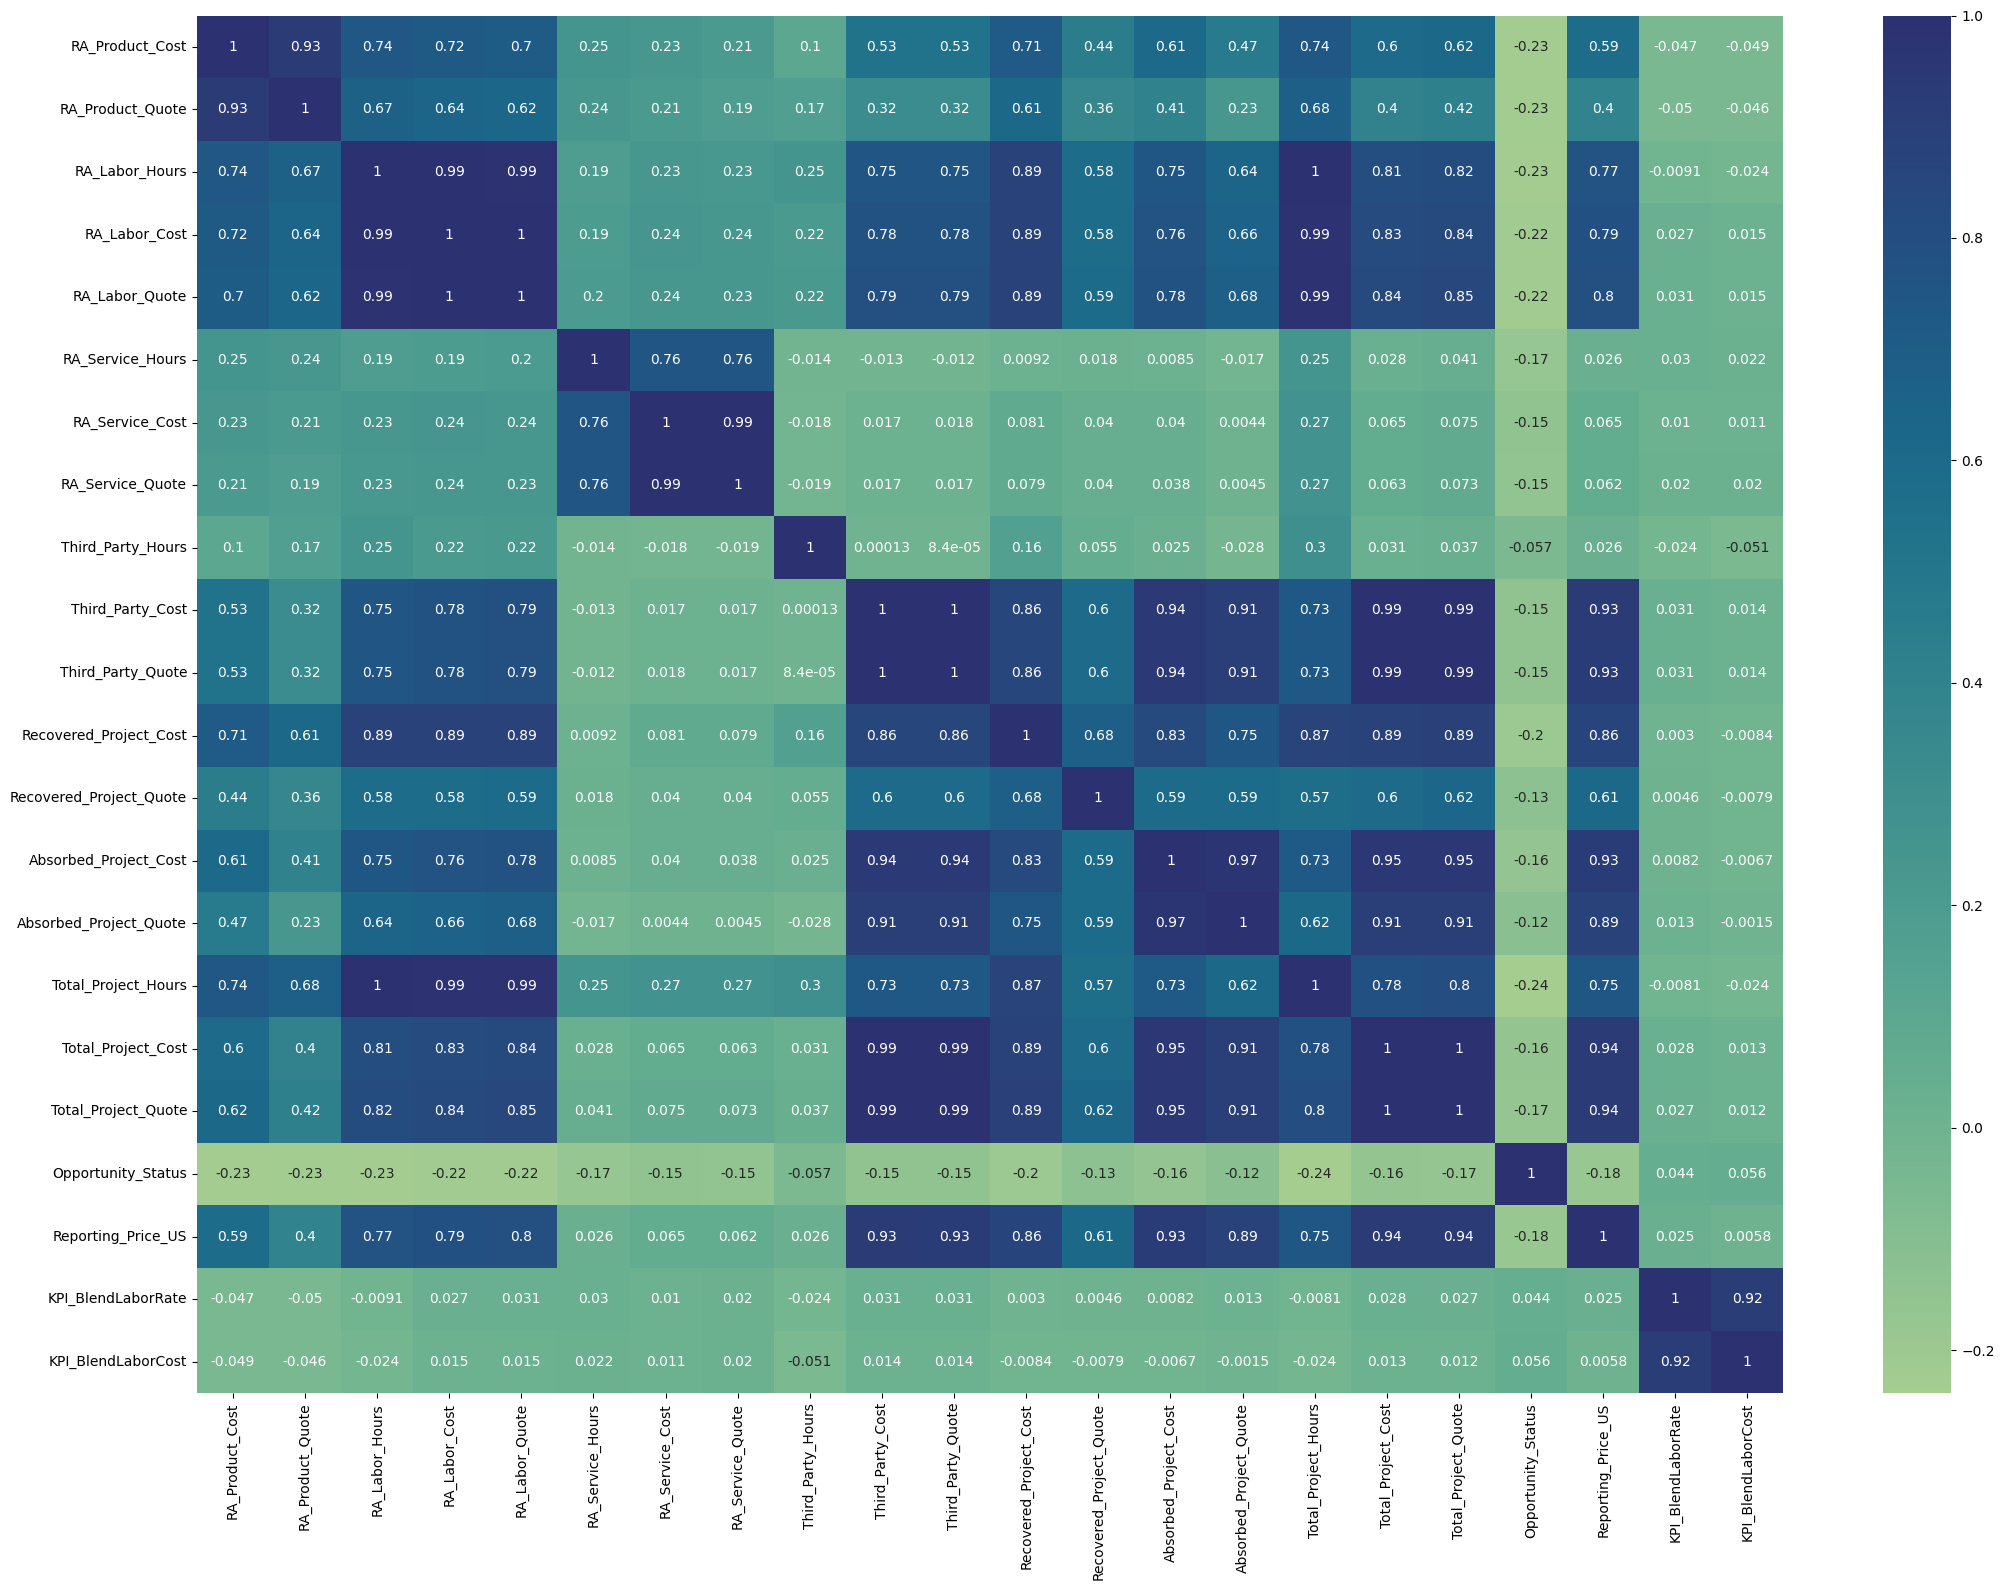

In [30]:
for col in df1.select_dtypes(include='object').columns:
    df1[col] = df1[col].astype('category').cat.codes

# Calculate correlation matrix
corr_matrix = df1.corr()

# Plot heatmap
plt.figure(figsize=(22,16))
sns.heatmap(corr_matrix, annot=True, cmap='crest')
plt.tight_layout()
plt.savefig("output_fig/corr_matrix_obj.png")
plt.show()

## Understanding Target Feature and Distribution of Target : Opportunity Status

In [31]:
df2

RA_Product_Cost  RA_Product_Quote  RA_Labor_Hours  RA_Labor_Cost  \
0             3049.59           5180.67          150.00        8336.21   
1            24080.00          36932.67         1616.30      104615.30   
2                0.00              0.00         1240.02      102720.09   
3                0.00              0.00           29.00        1526.20   
4              402.04           2295.88          528.00       38253.29   
...               ...               ...             ...            ...   
1856          1493.27          22937.71          261.00       16961.07   
1857             0.00              0.00         1017.00       61200.82   
1858          2026.73          53400.64          953.00       73636.10   
1859          7553.93          67939.44          953.00       73636.10   
1860          2955.90          11263.20           32.00        1904.26   

      RA_Labor_Quote  RA_Service_Hours  RA_Service_Cost  RA_Service_Quote  \
0           11492.93               0.0              0.0               0.0   
1          152723.07               0.0              0.0               0.0   
2          145702.25               0.0              0.0               0.0   
3            2152.38               0.0              0.0               0.0   
4           57164.80               0.0              0.0               0.0   
...              ...               ...              ...               ...   
1856        23101.42               0.0              0.0               0.0   
1857        90955.43               0.0              0.0               0.0   
1858        96433.35               0.0              0.0               0.0   
1859        96433.35               0.0              0.0               0.0   
1860         2551.17               0.0              0.0               0.0   

      Third_Party_Hours  Third_Party_Cost  ...  Recovered_Project_Quote  \
0                   1.0           9029.58  ...                     0.00   
1                   0.0           4605.44  ...                  2218.40   
2                   0.0              0.00  ...                     0.00   
3                   0.0           1426.92  ...                     0.00   
4                   0.0           5264.00  ...                     0.00   
...                 ...               ...  ...                      ...   
1856                0.0           1102.76  ...                     0.00   
1857                0.0              0.00  ...                     0.00   
1858                0.0            380.00  ...                 45332.49   
1859                0.0            380.00  ...                 45332.49   
1860                0.0              0.00  ...                     0.00   

      Absorbed_Project_Cost  Absorbed_Project_Quote  Total_Project_Hours  \
0                      0.00                    0.00               151.00   
1                   6759.20                    0.00              1616.30   
2                   2054.85                    0.00              1240.02   
3                      0.00                    0.00                29.00   
4                   3825.25                -2240.00               528.00   
...                     ...                     ...                  ...   
1856                3800.00               -16536.69               261.00   
1857                1900.00                -7429.38              1017.00   
1858               19000.00                -1615.04               953.00   
1859               11400.00               -24893.84               953.00   
1860                 456.00                -2551.17                32.00   

      Total_Project_Cost  Total_Project_Quote  \
0               20415.38             27296.85   
1              141945.57            197292.30   
2              104774.94            145702.25   
3                2953.12              3937.50   
4               47744.58             64599.51   
...                  ...                  ...   
1856            23357.10           

In [32]:
df2['Opportunity_Status'].nunique()

23

**This is a case of Multiclass classification**

In [33]:
opp_status_count= pd.DataFrame(df2['Opportunity_Status'].value_counts())
opp_status_count

count
Opportunity_Status                                  
Won                                             1076
In Progress                                      133
Lost Due to Sales Process                         92
Not to Pursue by Customer                         87
Other                                             77
Lost                                              58
No Decision / Stopped by Customer                 52
Closed as Duplicate                               47
Stopped by RA / Qualified Out                     46
Stopped by RA                                     29
Not to Pursue by Customer-NOT IIN USED            29
Lost Due to Solution Offering                     27
Auto Closed                                       25
Lost Due to Price                                 22
No Funding or Funding Reallocated                 12
Other-NOT IN USED                                 12
Lost Due to Solution Partner                       9
Lost-NOT IN USED                                   9
On Hold                                            7
Lost Due to Service                                5
Lost Due to Availability                           3
No Funding or Funding Reallocated-NOT IN USED      2
Lost Due to Solution Partner-NOT IN USED           2

In [34]:
# Count in percentage 

# Calculate total count of entries
total_count = opp_status_count.sum()

# Calculate percentage values with one decimal place and append percentage symbol
percentage_values = (opp_status_count / total_count) * 100
percentage_values = percentage_values.round(1).astype(str) + '%'

# Display the percentage values
print(percentage_values)

                                               count
Opportunity_Status                                  
Won                                            57.8%
In Progress                                     7.1%
Lost Due to Sales Process                       4.9%
Not to Pursue by Customer                       4.7%
Other                                           4.1%
Lost                                            3.1%
No Decision / Stopped by Customer               2.8%
Closed as Duplicate                             2.5%
Stopped by RA / Qualified Out                   2.5%
Stopped by RA                                   1.6%
Not to Pursue by Customer-NOT IIN USED          1.6%
Lost Due to Solution Offering                   1.5%
Auto Closed                                     1.3%
Lost Due to Price                               1.2%
No Funding or Funding Reallocated               0.6%
Other-NOT IN USED                               0.6%
Lost Due to Solution Partner                  

In [35]:
# Create countplot (barplot)

In [36]:
#".value_counts()" :counts the occurrences of each unique value in the selected column
# ".index" : This extracts the index of the resulting Series, which contains the unique values of the 'Opportunity_Status' 
# column, sorted by their counts in descending order.

a= df2['Opportunity_Status'].value_counts().index   # for descending order 
a

#a=df['Opportunity_Status'].value_counts(ascending=True).index   # for ascending order

Index(['Won', 'In Progress', 'Lost Due to Sales Process',
       'Not to Pursue by Customer', 'Other', 'Lost',
       'No Decision / Stopped by Customer', 'Closed as Duplicate',
       'Stopped by RA / Qualified Out', 'Stopped by RA',
       'Not to Pursue by Customer-NOT IIN USED',
       'Lost Due to Solution Offering', 'Auto Closed', 'Lost Due to Price',
       'No Funding or Funding Reallocated', 'Other-NOT IN USED',
       'Lost Due to Solution Partner', 'Lost-NOT IN USED', 'On Hold',
       'Lost Due to Service', 'Lost Due to Availability',
       'No Funding or Funding Reallocated-NOT IN USED',
       'Lost Due to Solution Partner-NOT IN USED'],
      dtype='object', name='Opportunity_Status')

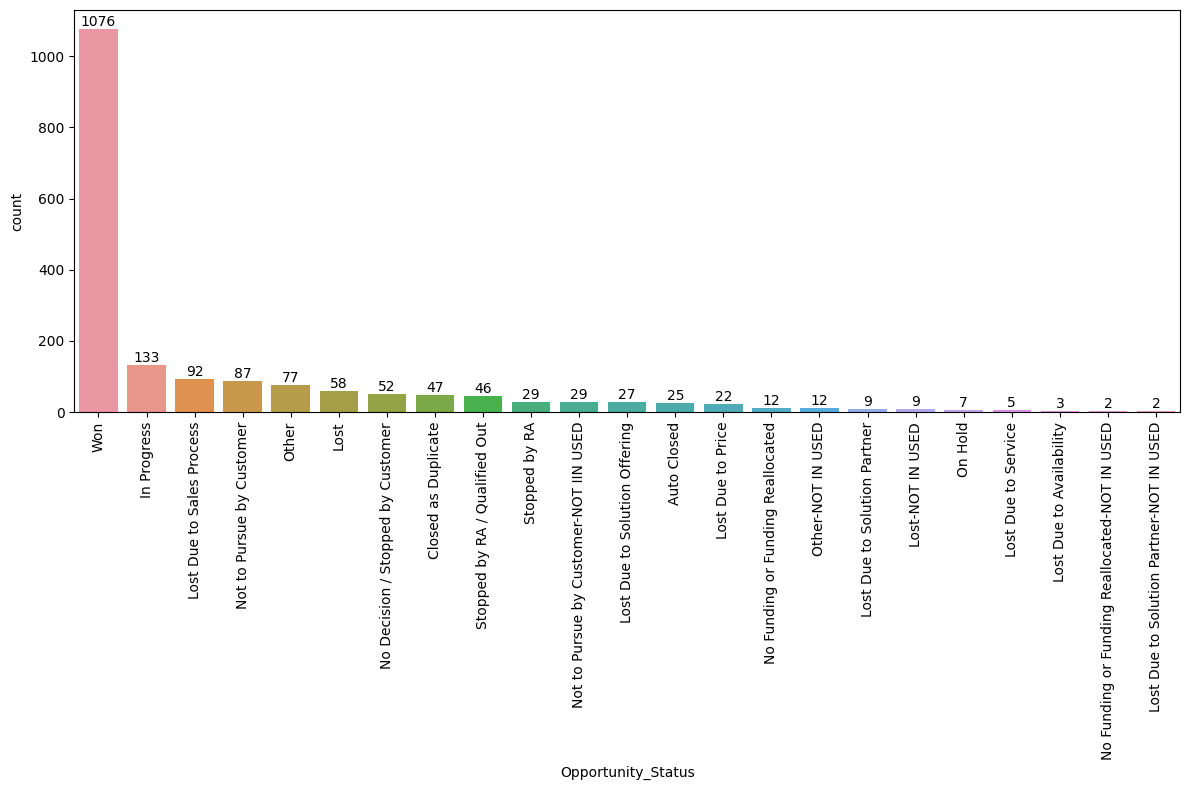

In [37]:
# Create countplot
plt.figure(figsize=(12,8))
ax = sns.countplot(data=df, x='Opportunity_Status', order=df['Opportunity_Status'].value_counts().index)

# Add labels to bars
for container in ax.containers:
    ax.bar_label(container)

# Rotate x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# Adjust layout to accommodate all elements i.e no part is cut in saved figure
plt.tight_layout()

plt.savefig('output_fig/Target_distribution_count.png')
plt.show()

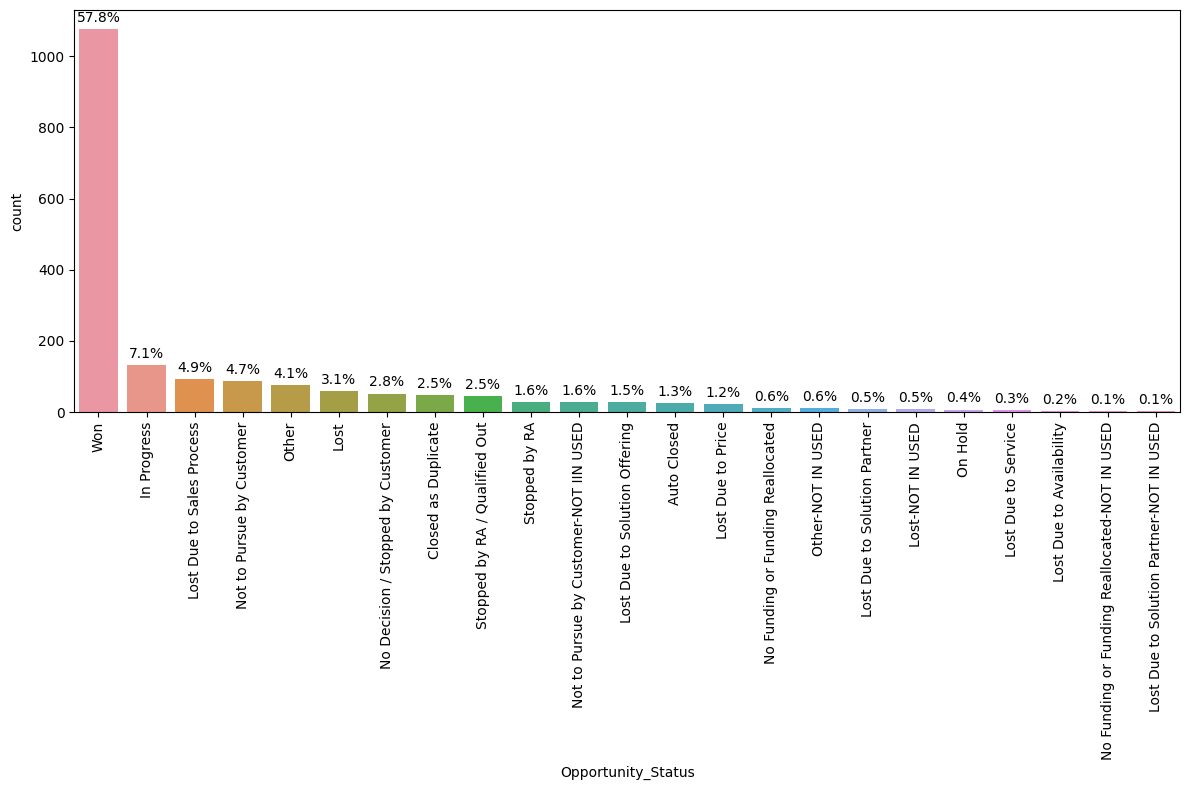

In [38]:
plt.figure(figsize=(12, 8))

# Create countplot
ax = sns.countplot(data=df2, x='Opportunity_Status', order=df2['Opportunity_Status'].value_counts().index)

# Calculate percentage values
total_count = len(df)
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        percentage = height / total_count * 100
        ax.annotate(f'{percentage:.1f}%', 
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.tight_layout()

plt.savefig('output_fig/Target_distribution_percentage.png')
plt.show()

In [39]:
df2

RA_Product_Cost  RA_Product_Quote  RA_Labor_Hours  RA_Labor_Cost  \
0             3049.59           5180.67          150.00        8336.21   
1            24080.00          36932.67         1616.30      104615.30   
2                0.00              0.00         1240.02      102720.09   
3                0.00              0.00           29.00        1526.20   
4              402.04           2295.88          528.00       38253.29   
...               ...               ...             ...            ...   
1856          1493.27          22937.71          261.00       16961.07   
1857             0.00              0.00         1017.00       61200.82   
1858          2026.73          53400.64          953.00       73636.10   
1859          7553.93          67939.44          953.00       73636.10   
1860          2955.90          11263.20           32.00        1904.26   

      RA_Labor_Quote  RA_Service_Hours  RA_Service_Cost  RA_Service_Quote  \
0           11492.93               0.0              0.0               0.0   
1          152723.07               0.0              0.0               0.0   
2          145702.25               0.0              0.0               0.0   
3            2152.38               0.0              0.0               0.0   
4           57164.80               0.0              0.0               0.0   
...              ...               ...              ...               ...   
1856        23101.42               0.0              0.0               0.0   
1857        90955.43               0.0              0.0               0.0   
1858        96433.35               0.0              0.0               0.0   
1859        96433.35               0.0              0.0               0.0   
1860         2551.17               0.0              0.0               0.0   

      Third_Party_Hours  Third_Party_Cost  ...  Recovered_Project_Quote  \
0                   1.0           9029.58  ...                     0.00   
1                   0.0           4605.44  ...                  2218.40   
2                   0.0              0.00  ...                     0.00   
3                   0.0           1426.92  ...                     0.00   
4                   0.0           5264.00  ...                     0.00   
...                 ...               ...  ...                      ...   
1856                0.0           1102.76  ...                     0.00   
1857                0.0              0.00  ...                     0.00   
1858                0.0            380.00  ...                 45332.49   
1859                0.0            380.00  ...                 45332.49   
1860                0.0              0.00  ...                     0.00   

      Absorbed_Project_Cost  Absorbed_Project_Quote  Total_Project_Hours  \
0                      0.00                    0.00               151.00   
1                   6759.20                    0.00              1616.30   
2                   2054.85                    0.00              1240.02   
3                      0.00                    0.00                29.00   
4                   3825.25                -2240.00               528.00   
...                     ...                     ...                  ...   
1856                3800.00               -16536.69               261.00   
1857                1900.00                -7429.38              1017.00   
1858               19000.00                -1615.04               953.00   
1859               11400.00               -24893.84               953.00   
1860                 456.00                -2551.17                32.00   

      Total_Project_Cost  Total_Project_Quote  \
0               20415.38             27296.85   
1              141945.57            197292.30   
2              104774.94            145702.25   
3                2953.12              3937.50   
4               47744.58             64599.51   
...                  ...                  ...   
1856            23357.10           

In [40]:
values_to_drop = ['In Progress', 'On Hold','Other','Closed as Duplicate']

# Use boolean indexing to select rows where the "status" feature is not in the values_to_drop list
df3 = df2[~df2['Opportunity_Status'].isin(values_to_drop)]

df3

RA_Product_Cost  RA_Product_Quote  RA_Labor_Hours  RA_Labor_Cost  \
0             3049.59           5180.67          150.00        8336.21   
1            24080.00          36932.67         1616.30      104615.30   
2                0.00              0.00         1240.02      102720.09   
3                0.00              0.00           29.00        1526.20   
4              402.04           2295.88          528.00       38253.29   
...               ...               ...             ...            ...   
1853         34760.29          75967.70         1408.50       94019.90   
1854             0.00              0.00          201.00       12231.83   
1855             0.00              0.00          201.00       12231.83   
1856          1493.27          22937.71          261.00       16961.07   
1860          2955.90          11263.20           32.00        1904.26   

      RA_Labor_Quote  RA_Service_Hours  RA_Service_Cost  RA_Service_Quote  \
0           11492.93               0.0              0.0               0.0   
1          152723.07               0.0              0.0               0.0   
2          145702.25               0.0              0.0               0.0   
3            2152.38               0.0              0.0               0.0   
4           57164.80               0.0              0.0               0.0   
...              ...               ...              ...               ...   
1853       127791.34               0.0              0.0               0.0   
1854        17001.34               0.0              0.0               0.0   
1855        17001.34               0.0              0.0               0.0   
1856        23101.42               0.0              0.0               0.0   
1860         2551.17               0.0              0.0               0.0   

      Third_Party_Hours  Third_Party_Cost  ...  Recovered_Project_Quote  \
0                   1.0           9029.58  ...                     0.00   
1                   0.0           4605.44  ...                  2218.40   
2                   0.0              0.00  ...                     0.00   
3                   0.0           1426.92  ...                     0.00   
4                   0.0           5264.00  ...                     0.00   
...                 ...               ...  ...                      ...   
1853                0.0              0.00  ...                  4021.56   
1854                0.0              0.00  ...                   408.56   
1855                0.0              0.00  ...                   408.56   
1856                0.0           1102.76  ...                     0.00   
1860                0.0              0.00  ...                     0.00   

      Absorbed_Project_Cost  Absorbed_Project_Quote  Total_Project_Hours  \
0                      0.00                    0.00               151.00   
1                   6759.20                    0.00              1616.30   
2                   2054.85                    0.00              1240.02   
3                      0.00                    0.00                29.00   
4                   3825.25                -2240.00               528.00   
...                     ...                     ...                  ...   
1853                   0.00                -6285.22              1408.50   
1854                1558.00                 1558.02               201.00   
1855                1558.00                 1558.02               201.00   
1856                3800.00               -16536.69               261.00   
1860                 456.00                -2551.17                32.00   

      Total_Project_Cost  Total_Project_Quote  \
0               20415.38             27296.85   
1              141945.57            197292.30   
2              104774.94            145702.25   
3                2953.12              3937.50   
4               47744.58             64599.51   
...                  ...                  ...   
1853           132371.19           

In [41]:
df3['Opportunity_Status'].nunique()   # dropped 4 vales

19

In [42]:
df3['Opportunity_Status'].value_counts().index   # for descending order 

Index(['Won', 'Lost Due to Sales Process', 'Not to Pursue by Customer', 'Lost',
       'No Decision / Stopped by Customer', 'Stopped by RA / Qualified Out',
       'Not to Pursue by Customer-NOT IIN USED', 'Stopped by RA',
       'Lost Due to Solution Offering', 'Auto Closed', 'Lost Due to Price',
       'Other-NOT IN USED', 'No Funding or Funding Reallocated',
       'Lost Due to Solution Partner', 'Lost-NOT IN USED',
       'Lost Due to Service', 'Lost Due to Availability',
       'No Funding or Funding Reallocated-NOT IN USED',
       'Lost Due to Solution Partner-NOT IN USED'],
      dtype='object', name='Opportunity_Status')

In [43]:
opp_status_count= pd.DataFrame(df3['Opportunity_Status'].value_counts())
opp_status_count

count
Opportunity_Status                                  
Won                                             1076
Lost Due to Sales Process                         92
Not to Pursue by Customer                         87
Lost                                              58
No Decision / Stopped by Customer                 52
Stopped by RA / Qualified Out                     46
Not to Pursue by Customer-NOT IIN USED            29
Stopped by RA                                     29
Lost Due to Solution Offering                     27
Auto Closed                                       25
Lost Due to Price                                 22
Other-NOT IN USED                                 12
No Funding or Funding Reallocated                 12
Lost Due to Solution Partner                       9
Lost-NOT IN USED                                   9
Lost Due to Service                                5
Lost Due to Availability                           3
No Funding or Funding Reallocated-NOT IN USED      2
Lost Due to Solution Partner-NOT IN USED           2

In [44]:
# Assuming df3 is your DataFrame

# Replace all unique values in the 'status' column except "Won" with "Loss"
df3['Opportunity_Status'].replace(to_replace=df3['Opportunity_Status'].unique()[1:], value='Lost', inplace=True)

In [45]:
df3

RA_Product_Cost  RA_Product_Quote  RA_Labor_Hours  RA_Labor_Cost  \
0             3049.59           5180.67          150.00        8336.21   
1            24080.00          36932.67         1616.30      104615.30   
2                0.00              0.00         1240.02      102720.09   
3                0.00              0.00           29.00        1526.20   
4              402.04           2295.88          528.00       38253.29   
...               ...               ...             ...            ...   
1853         34760.29          75967.70         1408.50       94019.90   
1854             0.00              0.00          201.00       12231.83   
1855             0.00              0.00          201.00       12231.83   
1856          1493.27          22937.71          261.00       16961.07   
1860          2955.90          11263.20           32.00        1904.26   

      RA_Labor_Quote  RA_Service_Hours  RA_Service_Cost  RA_Service_Quote  \
0           11492.93               0.0              0.0               0.0   
1          152723.07               0.0              0.0               0.0   
2          145702.25               0.0              0.0               0.0   
3            2152.38               0.0              0.0               0.0   
4           57164.80               0.0              0.0               0.0   
...              ...               ...              ...               ...   
1853       127791.34               0.0              0.0               0.0   
1854        17001.34               0.0              0.0               0.0   
1855        17001.34               0.0              0.0               0.0   
1856        23101.42               0.0              0.0               0.0   
1860         2551.17               0.0              0.0               0.0   

      Third_Party_Hours  Third_Party_Cost  ...  Recovered_Project_Quote  \
0                   1.0           9029.58  ...                     0.00   
1                   0.0           4605.44  ...                  2218.40   
2                   0.0              0.00  ...                     0.00   
3                   0.0           1426.92  ...                     0.00   
4                   0.0           5264.00  ...                     0.00   
...                 ...               ...  ...                      ...   
1853                0.0              0.00  ...                  4021.56   
1854                0.0              0.00  ...                   408.56   
1855                0.0              0.00  ...                   408.56   
1856                0.0           1102.76  ...                     0.00   
1860                0.0              0.00  ...                     0.00   

      Absorbed_Project_Cost  Absorbed_Project_Quote  Total_Project_Hours  \
0                      0.00                    0.00               151.00   
1                   6759.20                    0.00              1616.30   
2                   2054.85                    0.00              1240.02   
3                      0.00                    0.00                29.00   
4                   3825.25                -2240.00               528.00   
...                     ...                     ...                  ...   
1853                   0.00                -6285.22              1408.50   
1854                1558.00                 1558.02               201.00   
1855                1558.00                 1558.02               201.00   
1856                3800.00               -16536.69               261.00   
1860                 456.00                -2551.17                32.00   

      Total_Project_Cost  Total_Project_Quote  Opportunity_Status  \
0               20415.38             27296.85                 Won   
1              141945.57            197292.30                Lost   
2              104774.94            145702.25                Lost   
3                2953.12              3937.50                 Won   
4               47744.58         

In [46]:
df3['Opportunity_Status'].nunique()

2

In [49]:
opp_status_newdf= pd.DataFrame(df3['Opportunity_Status'].value_counts())
opp_status_newdf

count
Opportunity_Status       
Won                  1076
Lost                  521

In [50]:
opp_status_newdf.shape

(2, 1)

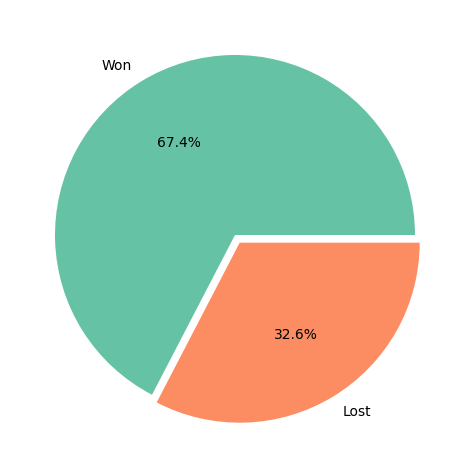

In [51]:
plt.pie(opp_status_newdf['count'], labels = ['Won','Lost'],autopct='%.1f%%', colors=sns.color_palette('Set2'),explode=[0,0.05])
plt.tight_layout()
plt.savefig('output_fig/target_feature_classification.png')

**This is the case of Binary Classification**

In [52]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1597 entries, 0 to 1860
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   RA_Product_Cost          1596 non-null   float64
 1   RA_Product_Quote         1596 non-null   float64
 2   RA_Labor_Hours           1595 non-null   float64
 3   RA_Labor_Cost            1595 non-null   float64
 4   RA_Labor_Quote           1595 non-null   float64
 5   RA_Service_Hours         1597 non-null   float64
 6   RA_Service_Cost          1596 non-null   float64
 7   RA_Service_Quote         1596 non-null   float64
 8   Third_Party_Hours        1597 non-null   float64
 9   Third_Party_Cost         1595 non-null   float64
 10  Third_Party_Quote        1595 non-null   float64
 11  Recovered_Project_Cost   1596 non-null   float64
 12  Recovered_Project_Quote  1596 non-null   float64
 13  Absorbed_Project_Cost    1595 non-null   float64
 14  Absorbed_Project_Quote   1595

In [53]:
df3.columns

Index(['RA_Product_Cost', 'RA_Product_Quote', 'RA_Labor_Hours',
       'RA_Labor_Cost', 'RA_Labor_Quote', 'RA_Service_Hours',
       'RA_Service_Cost', 'RA_Service_Quote', 'Third_Party_Hours',
       'Third_Party_Cost', 'Third_Party_Quote', 'Recovered_Project_Cost',
       'Recovered_Project_Quote', 'Absorbed_Project_Cost',
       'Absorbed_Project_Quote', 'Total_Project_Hours', 'Total_Project_Cost',
       'Total_Project_Quote', 'Opportunity_Status', 'Reporting_Price_US',
       'KPI_BlendLaborRate', 'KPI_BlendLaborCost'],
      dtype='object')

In [54]:
df3

RA_Product_Cost  RA_Product_Quote  RA_Labor_Hours  RA_Labor_Cost  \
0             3049.59           5180.67          150.00        8336.21   
1            24080.00          36932.67         1616.30      104615.30   
2                0.00              0.00         1240.02      102720.09   
3                0.00              0.00           29.00        1526.20   
4              402.04           2295.88          528.00       38253.29   
...               ...               ...             ...            ...   
1853         34760.29          75967.70         1408.50       94019.90   
1854             0.00              0.00          201.00       12231.83   
1855             0.00              0.00          201.00       12231.83   
1856          1493.27          22937.71          261.00       16961.07   
1860          2955.90          11263.20           32.00        1904.26   

      RA_Labor_Quote  RA_Service_Hours  RA_Service_Cost  RA_Service_Quote  \
0           11492.93               0.0              0.0               0.0   
1          152723.07               0.0              0.0               0.0   
2          145702.25               0.0              0.0               0.0   
3            2152.38               0.0              0.0               0.0   
4           57164.80               0.0              0.0               0.0   
...              ...               ...              ...               ...   
1853       127791.34               0.0              0.0               0.0   
1854        17001.34               0.0              0.0               0.0   
1855        17001.34               0.0              0.0               0.0   
1856        23101.42               0.0              0.0               0.0   
1860         2551.17               0.0              0.0               0.0   

      Third_Party_Hours  Third_Party_Cost  ...  Recovered_Project_Quote  \
0                   1.0           9029.58  ...                     0.00   
1                   0.0           4605.44  ...                  2218.40   
2                   0.0              0.00  ...                     0.00   
3                   0.0           1426.92  ...                     0.00   
4                   0.0           5264.00  ...                     0.00   
...                 ...               ...  ...                      ...   
1853                0.0              0.00  ...                  4021.56   
1854                0.0              0.00  ...                   408.56   
1855                0.0              0.00  ...                   408.56   
1856                0.0           1102.76  ...                     0.00   
1860                0.0              0.00  ...                     0.00   

      Absorbed_Project_Cost  Absorbed_Project_Quote  Total_Project_Hours  \
0                      0.00                    0.00               151.00   
1                   6759.20                    0.00              1616.30   
2                   2054.85                    0.00              1240.02   
3                      0.00                    0.00                29.00   
4                   3825.25                -2240.00               528.00   
...                     ...                     ...                  ...   
1853                   0.00                -6285.22              1408.50   
1854                1558.00                 1558.02               201.00   
1855                1558.00                 1558.02               201.00   
1856                3800.00               -16536.69               261.00   
1860                 456.00                -2551.17                32.00   

      Total_Project_Cost  Total_Project_Quote  Opportunity_Status  \
0               20415.38             27296.85                 Won   
1              141945.57            197292.30                Lost   
2              104774.94            145702.25                Lost   
3                2953.12              3937.50                 Won   
4               47744.58         

In [55]:
opp_stat_dummies = pd.get_dummies(df3['Opportunity_Status'], prefix= 'Opportunity_Status')
opp_stat_dummies = opp_stat_dummies.astype(int)
opp_stat_dummies.head()

Opportunity_Status_Lost  Opportunity_Status_Won
0                        0                       1
1                        1                       0
2                        1                       0
3                        0                       1
4                        0                       1

In [56]:
df4 = pd.concat([df3, opp_stat_dummies] , axis = 1)
df4.head()

RA_Product_Cost  RA_Product_Quote  RA_Labor_Hours  RA_Labor_Cost  \
0          3049.59           5180.67          150.00        8336.21   
1         24080.00          36932.67         1616.30      104615.30   
2             0.00              0.00         1240.02      102720.09   
3             0.00              0.00           29.00        1526.20   
4           402.04           2295.88          528.00       38253.29   

   RA_Labor_Quote  RA_Service_Hours  RA_Service_Cost  RA_Service_Quote  \
0        11492.93               0.0              0.0               0.0   
1       152723.07               0.0              0.0               0.0   
2       145702.25               0.0              0.0               0.0   
3         2152.38               0.0              0.0               0.0   
4        57164.80               0.0              0.0               0.0   

   Third_Party_Hours  Third_Party_Cost  ...  Absorbed_Project_Quote  \
0                1.0           9029.58  ...                     0.0   
1                0.0           4605.44  ...                     0.0   
2                0.0              0.00  ...                     0.0   
3                0.0           1426.92  ...                     0.0   
4                0.0           5264.00  ...                 -2240.0   

   Total_Project_Hours  Total_Project_Cost  Total_Project_Quote  \
0               151.00            20415.38             27296.85   
1              1616.30           141945.57            197292.30   
2              1240.02           104774.94            145702.25   
3                29.00             2953.12              3937.50   
4               528.00            47744.58             64599.51   

   Opportunity_Status  Reporting_Price_US  KPI_BlendLaborRate  \
0                 Won             27296.8           76.619533   
1                Lost            184962.0           94.489309   
2                Lost            145702.0          117.499919   
3                 Won              3937.5           74.220000   
4                 Won             60561.9          108.266667   

   KPI_BlendLaborCost Opportunity_Status_Lost  Opportunity_Status_Won  
0           55.574733                       0                       1  
1           64.725175                       1                       0  
2           82.837446                       1                       0  
3           52.627586                       0                       1  
4           72.449413                       0                       1  

[5 rows x 24 columns]

#### As we focus on why the proposal is lost, Hence elabel encoding is done through get dummies & 'Opportunity_Status' , 'Opportunity_Status_Won' are dropped

In [57]:
df4 = df4.drop(['Opportunity_Status' , 'Opportunity_Status_Won'] , axis = 1)
df4.head()

RA_Product_Cost  RA_Product_Quote  RA_Labor_Hours  RA_Labor_Cost  \
0          3049.59           5180.67          150.00        8336.21   
1         24080.00          36932.67         1616.30      104615.30   
2             0.00              0.00         1240.02      102720.09   
3             0.00              0.00           29.00        1526.20   
4           402.04           2295.88          528.00       38253.29   

   RA_Labor_Quote  RA_Service_Hours  RA_Service_Cost  RA_Service_Quote  \
0        11492.93               0.0              0.0               0.0   
1       152723.07               0.0              0.0               0.0   
2       145702.25               0.0              0.0               0.0   
3         2152.38               0.0              0.0               0.0   
4        57164.80               0.0              0.0               0.0   

   Third_Party_Hours  Third_Party_Cost  ...  Recovered_Project_Quote  \
0                1.0           9029.58  ...                      0.0   
1                0.0           4605.44  ...                   2218.4   
2                0.0              0.00  ...                      0.0   
3                0.0           1426.92  ...                      0.0   
4                0.0           5264.00  ...                      0.0   

   Absorbed_Project_Cost  Absorbed_Project_Quote  Total_Project_Hours  \
0                   0.00                     0.0               151.00   
1                6759.20                     0.0              1616.30   
2                2054.85                     0.0              1240.02   
3                   0.00                     0.0                29.00   
4                3825.25                 -2240.0               528.00   

   Total_Project_Cost  Total_Project_Quote  Reporting_Price_US  \
0            20415.38             27296.85             27296.8   
1           141945.57            197292.30            184962.0   
2           104774.94            145702.25            145702.0   
3             2953.12              3937.50              3937.5   
4            47744.58             64599.51             60561.9   

   KPI_BlendLaborRate  KPI_BlendLaborCost  Opportunity_Status_Lost  
0           76.619533           55.574733                        0  
1           94.489309           64.725175                        1  
2          117.499919           82.837446                        1  
3           74.220000           52.627586                        0  
4          108.266667           72.449413                        0  

[5 rows x 22 columns]

In [58]:
df5=df4.copy()

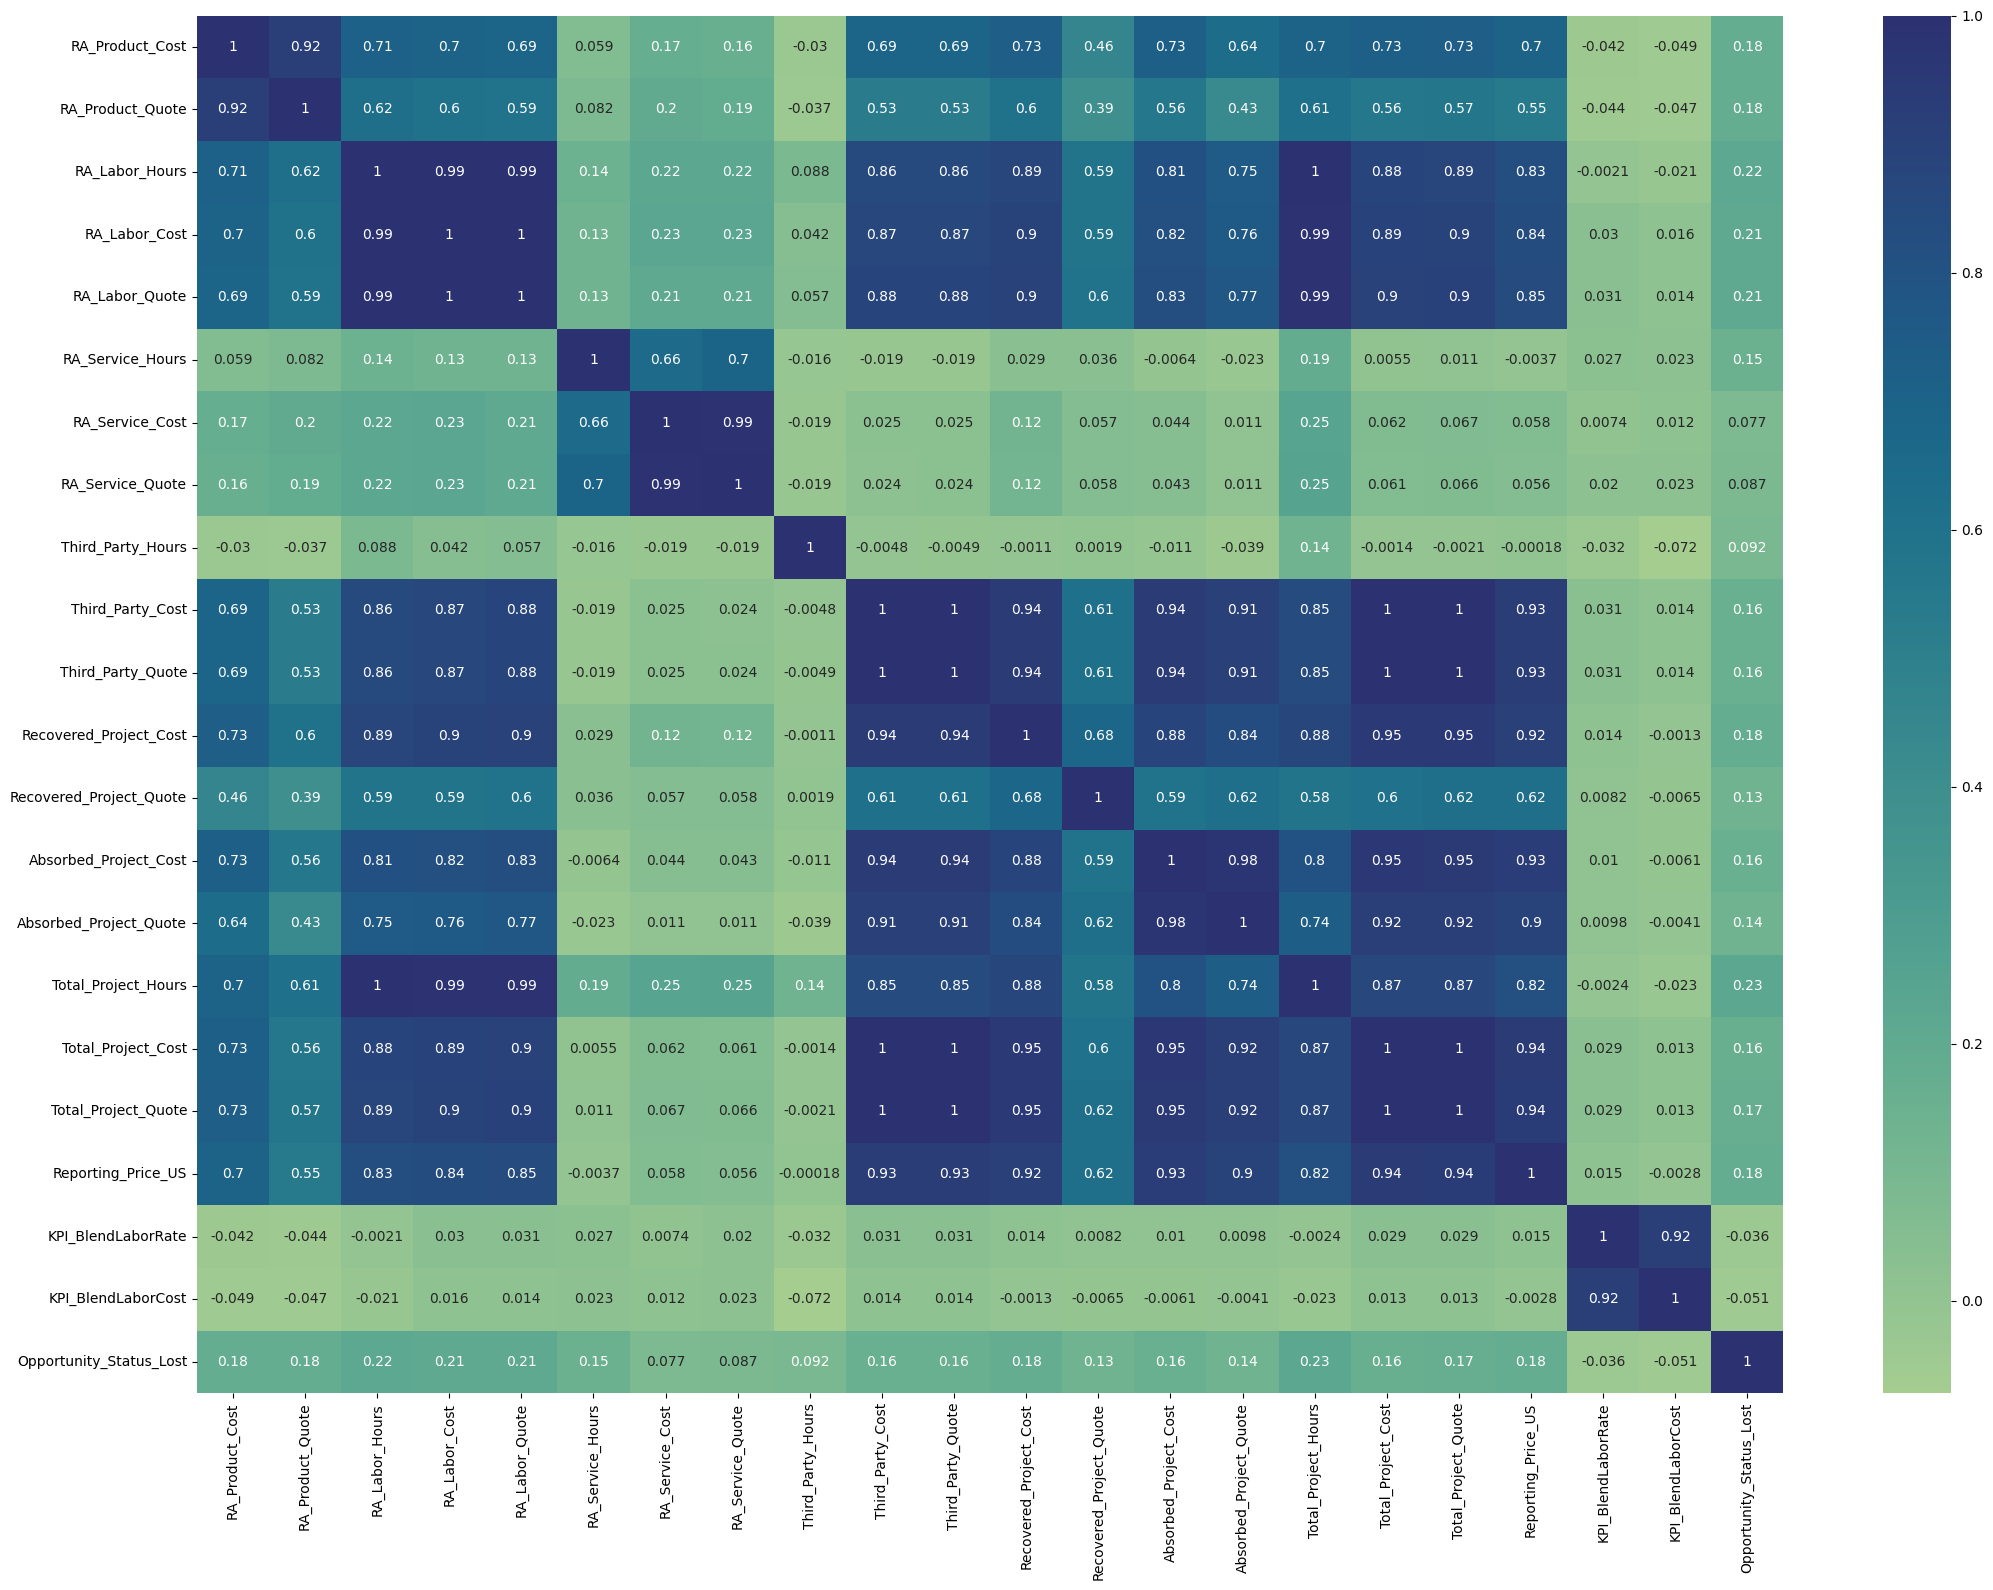

In [59]:
temp_value = 'TemporaryValue'
df3.replace({'Won': temp_value}, inplace=True)

# Convert categorical variables to numerical codes
for col in df4.select_dtypes(include='object').columns:
    df4[col] = df4[col].astype('category').cat.codes

# Replace the temporary value back to 'Won'
df4.replace({temp_value: 'Won'}, inplace=True)

# Calculate correlation matrix
corr_matrix = df4.corr()

# Plot heatmap
plt.figure(figsize=(22, 16))
sns.heatmap(corr_matrix, annot=True, cmap='crest')
plt.tight_layout()
plt.savefig("output_fig/corr_matrix_obj_new.png")
plt.show()


### Univariate Analysis of All the Features

##### There is no categorial Independent feature beacuse categories are more than 10

### 1. Violin plot

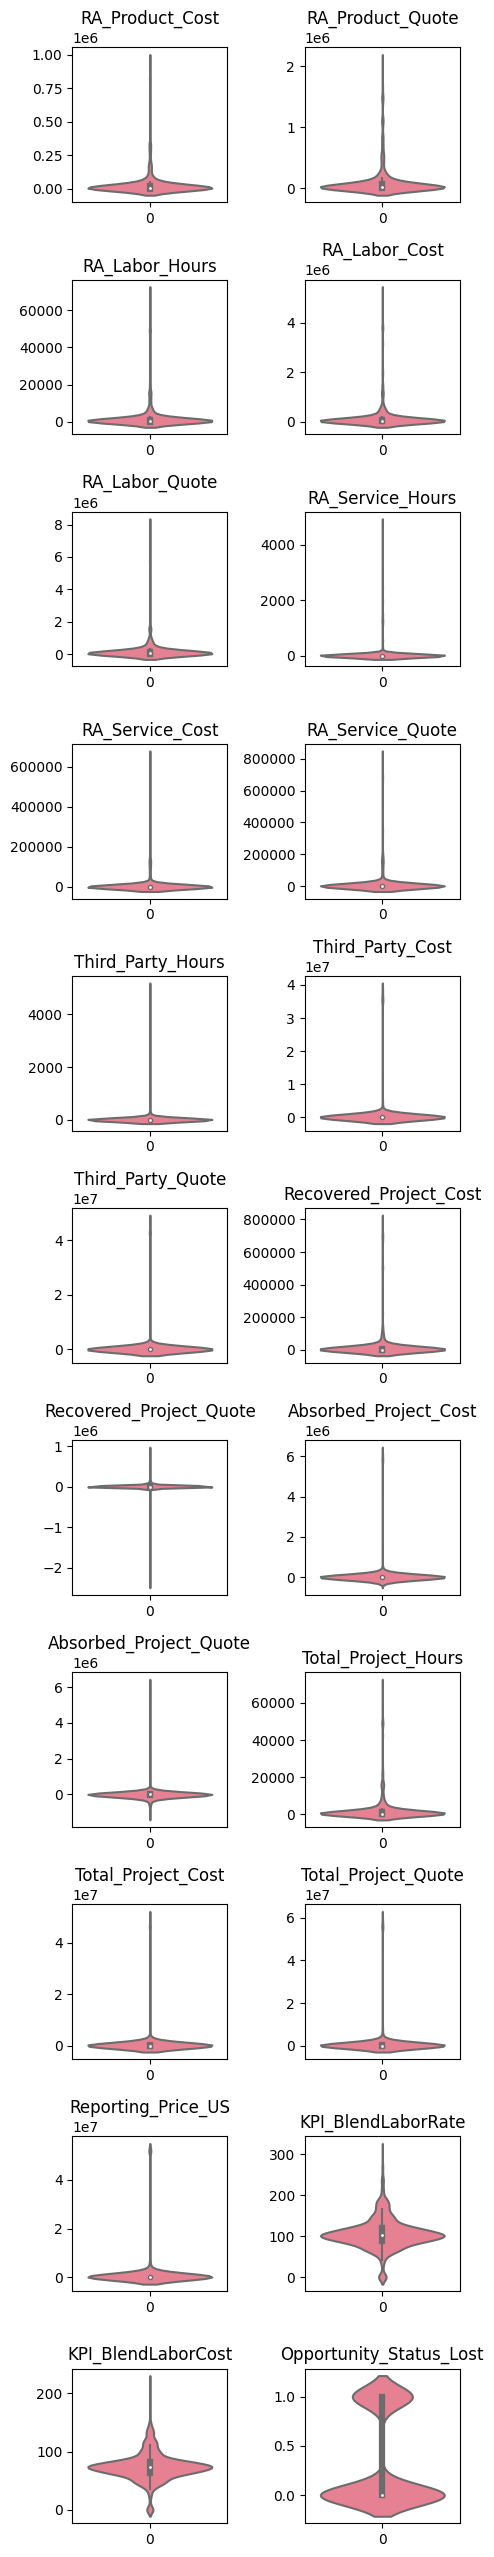

In [60]:
plt.figure(figsize=(5,30))
x = 1
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.5, wspace=0.5)
for i in df4:
    plt.subplot(13,2,x)
    x = x + 1
    plt.title(i)
    sns.violinplot(df4[i],split=True,palette='husl')

plt.show()

### 2. Distplot

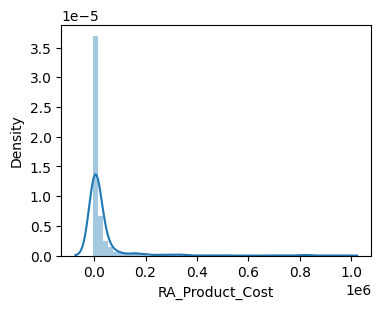

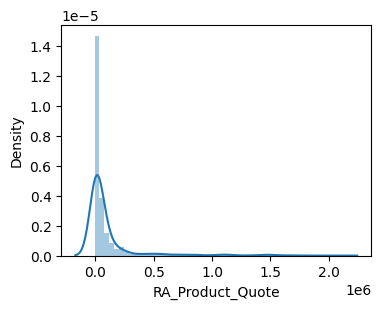

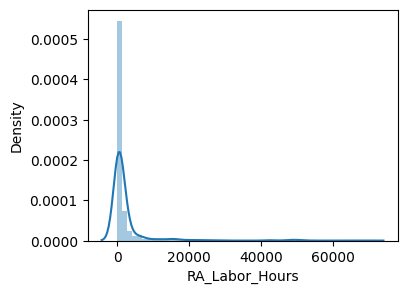

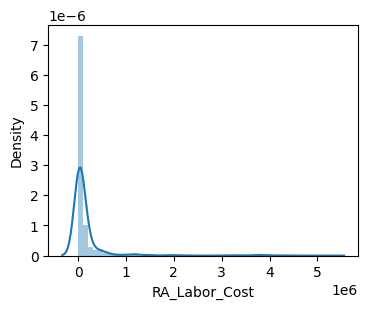

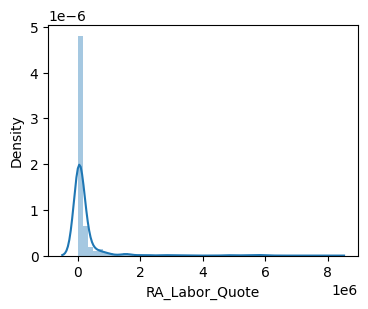

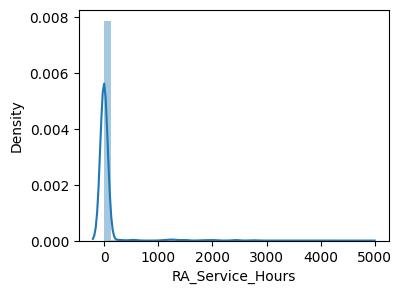

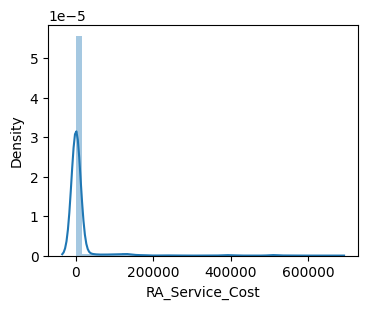

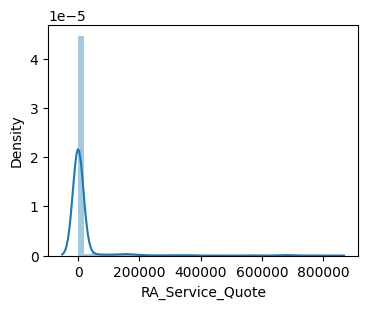

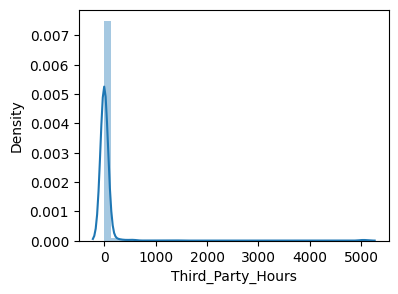

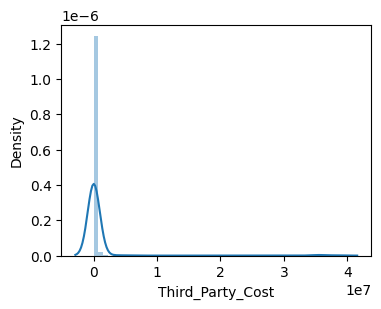

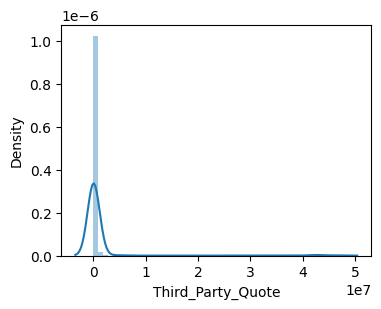

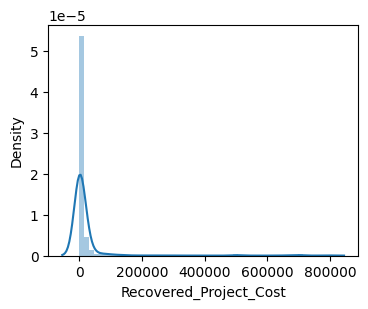

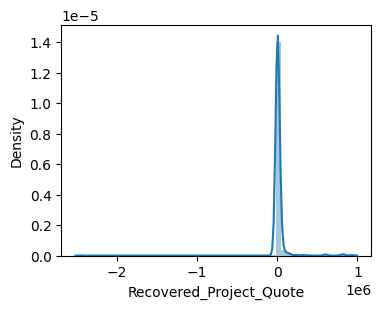

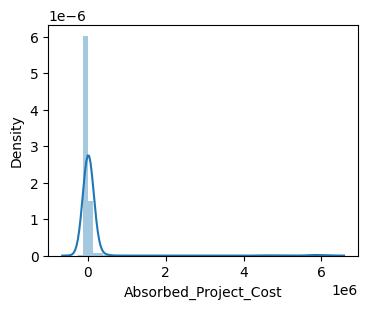

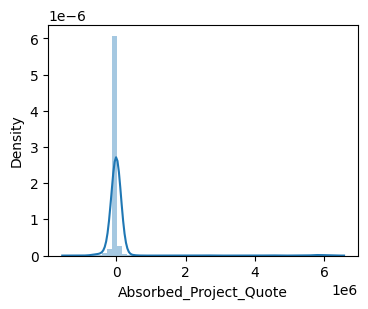

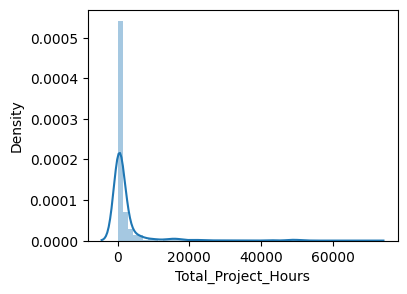

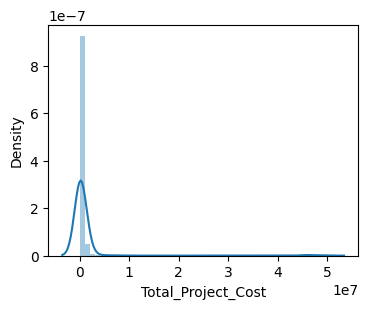

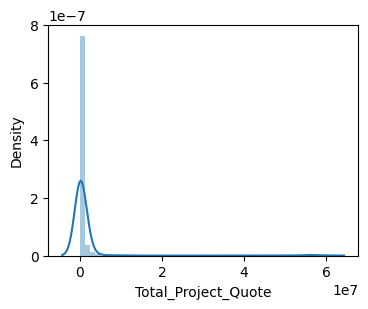

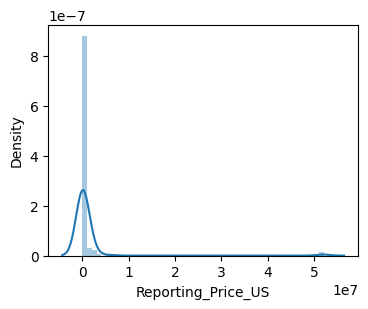

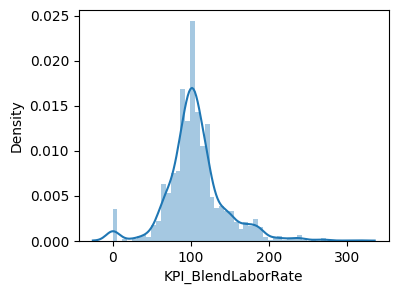

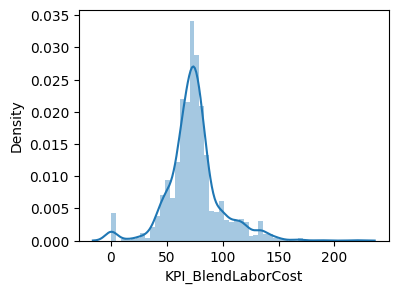

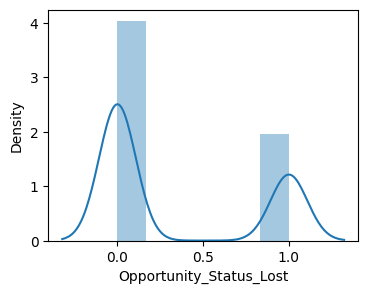

In [61]:
for i in df4 :
    plt.figure(figsize=(4,3))
    sns.distplot(df4[i])

### 3. Kdeplot

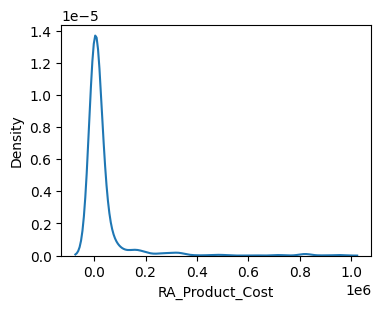

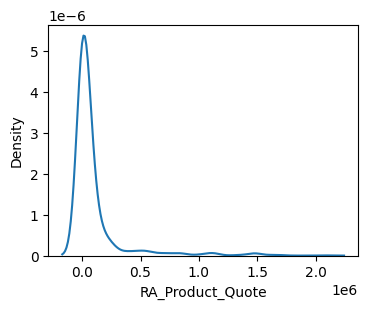

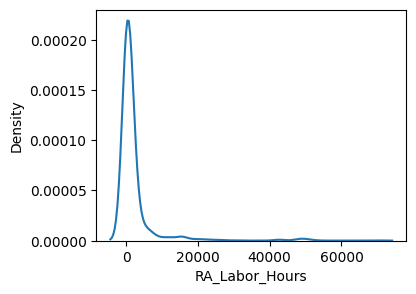

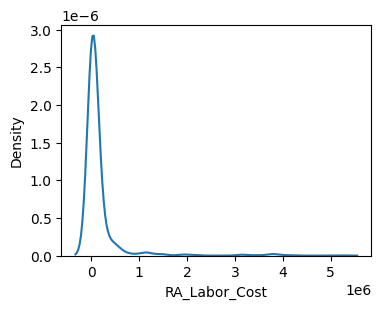

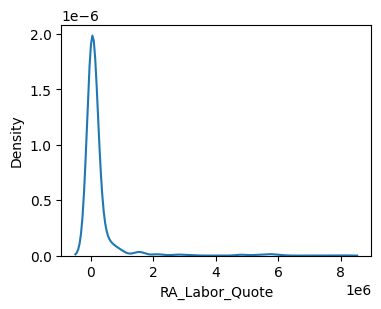

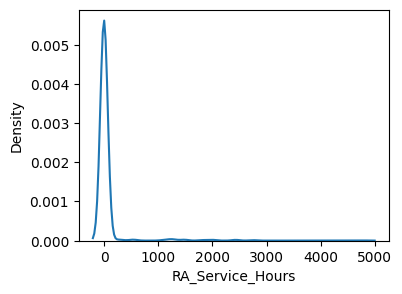

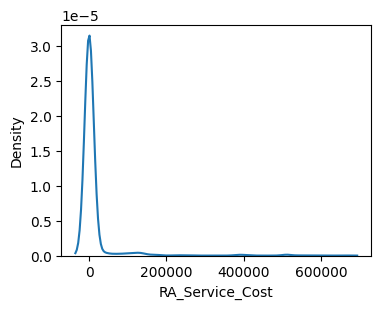

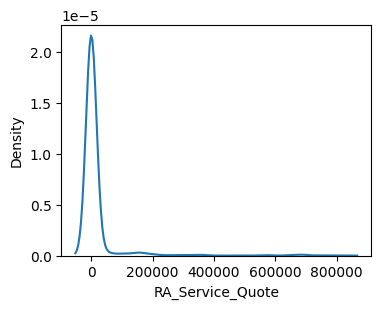

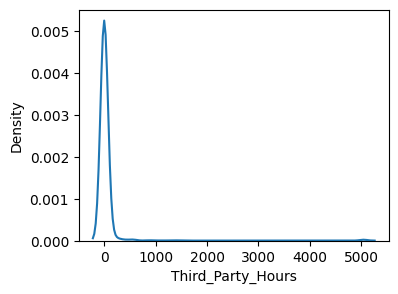

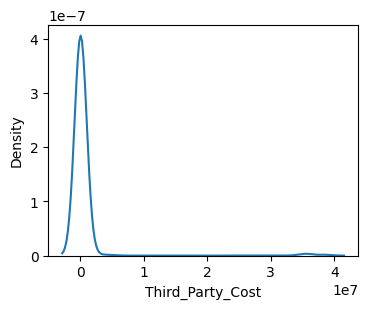

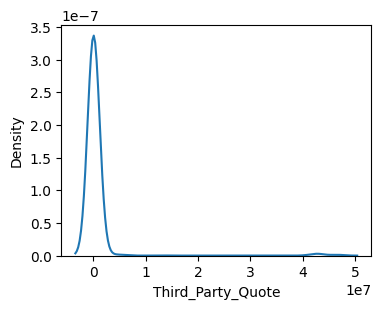

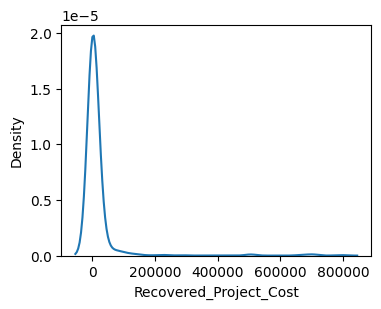

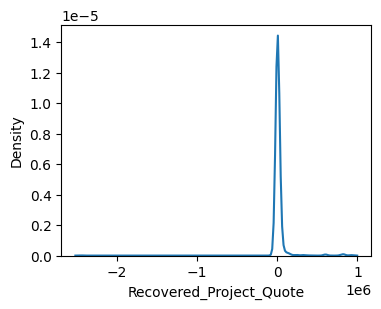

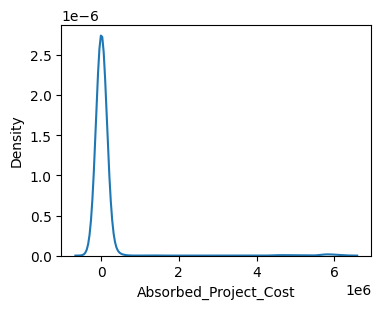

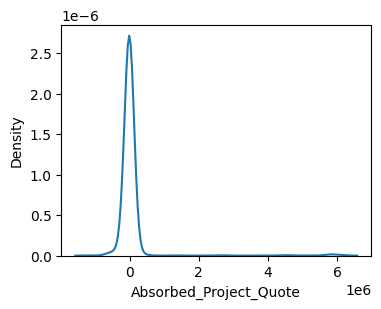

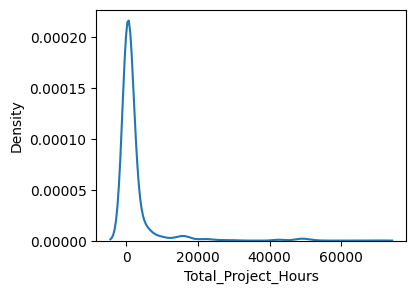

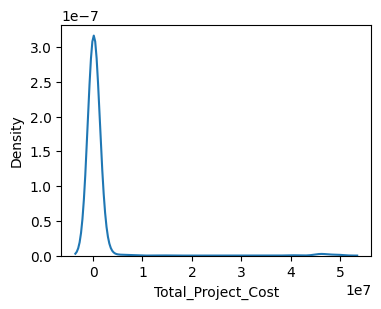

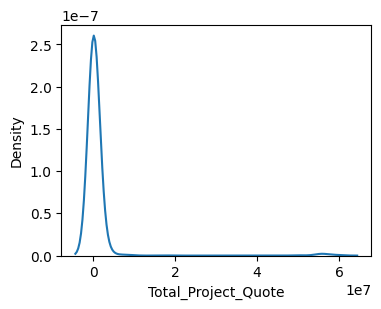

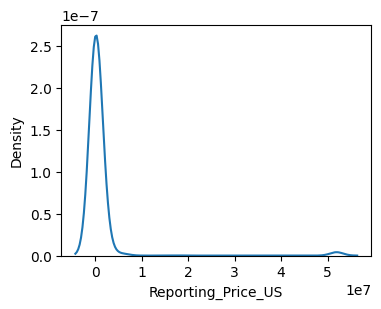

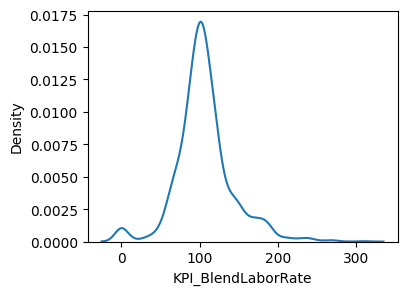

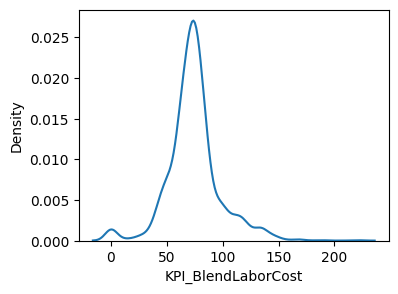

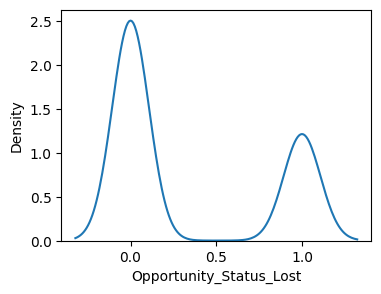

In [62]:
for i in df4 :
    plt.figure(figsize=(4,3))
    sns.kdeplot(df4[i])

### Bivariate Analysis of All (continuous) Feature

##### scatter plot / pairplot / heatmap

In [63]:
df4['Opportunity_Status_Lost'].nunique()

2

In [64]:
df4['Opportunity_Status_Lost'].dtype

dtype('int32')

In [65]:
# For pairplot/scatter plot, hue feature should be categorical. Here we can see  'Opportunity_Status_Lost' is integer rather tahn categorical variable.
# Hence below code will do the conversion

In [66]:
df4['Opportunity_Status_Lost'] = df4['Opportunity_Status_Lost'].astype('category')

In [67]:
df4['Opportunity_Status_Lost'].dtype

CategoricalDtype(categories=[0, 1], ordered=False, categories_dtype=int32)

In [65]:
# sns.pairplot(df4,hue ='Opportunity_Status_Lost')
# plt.savefig('output_fig/pairplot.png')

Knowhow:

### Step 4. Feature Engineering

#### 4.1 Outliers

##### Outliers are present in only continuous features. There is no concept of Outliers in categorical features

##### Outliers can be detected using:
        1. Boxplot
        2. IQR method
        3. zscore

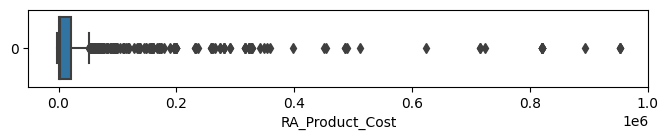

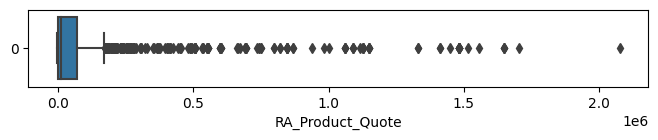

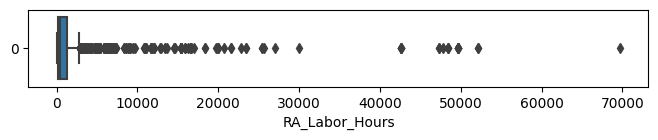

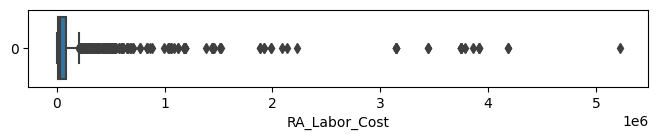

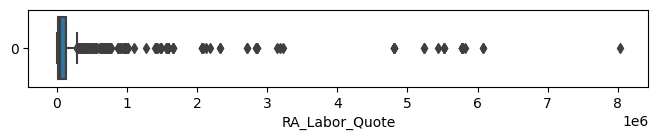

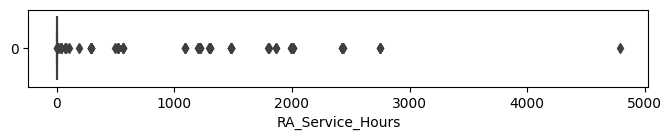

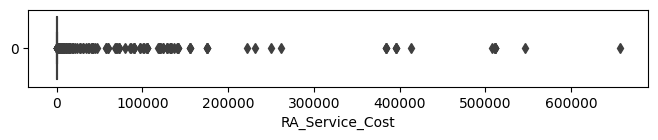

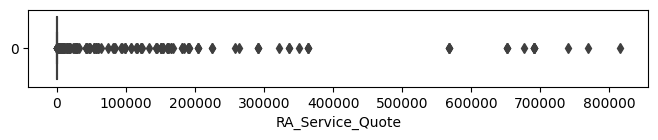

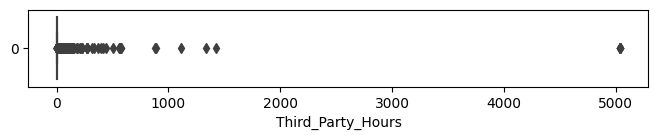

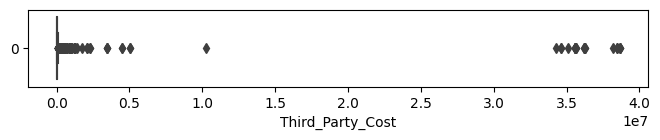

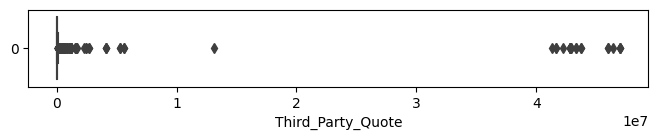

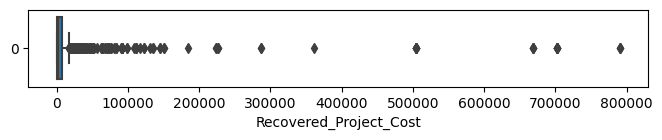

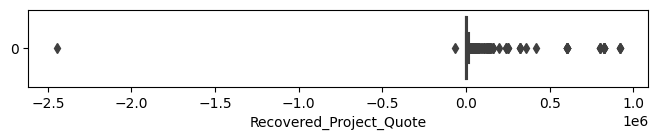

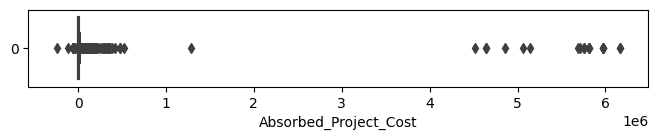

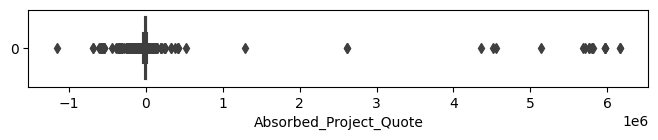

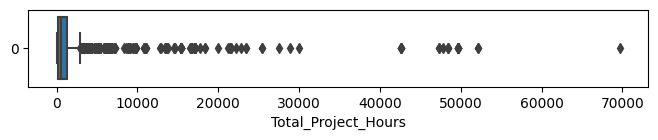

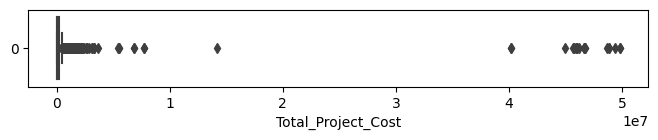

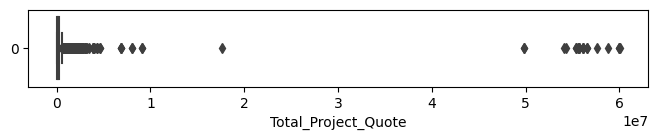

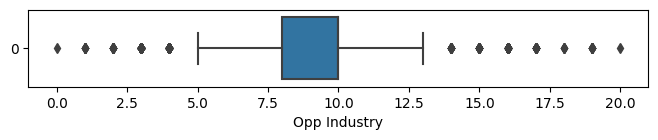

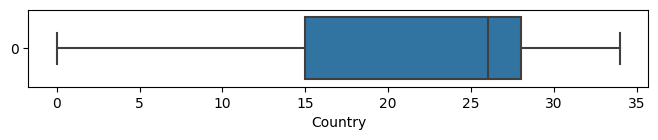

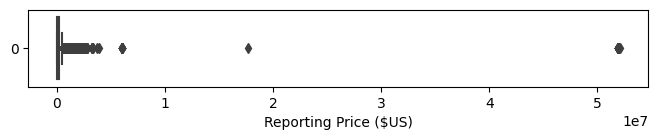

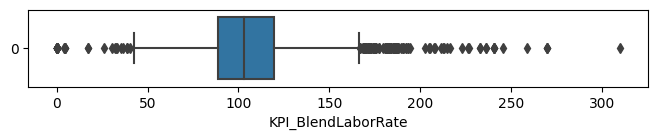

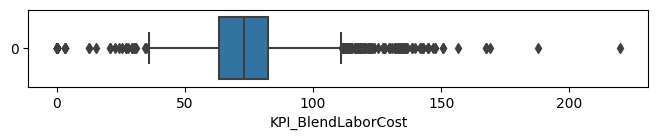

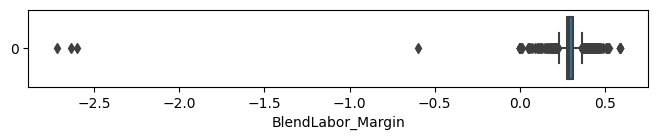

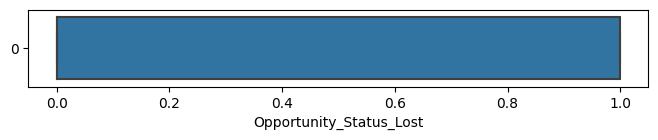

In [65]:
 # for i in df4:
 #    plt.figure(figsize=(8,1))
 #    plt.xlabel(xlabel=i)
 #    sns.boxplot(df4[i],orient='h')

### Step 5. Feature Selection

### 5.1 Mutual Information (Information Gain)

In [68]:
# Which plotting IF graph, Null values are not allowed. Hence replacing Null values with most repeating value from each feature (Mode)
mode_values = df4.mode().iloc[0]

# Replace NaN or null values with mode for each feature
df4= df4.fillna(mode_values)
df4

RA_Product_Cost  RA_Product_Quote  RA_Labor_Hours  RA_Labor_Cost  \
0             3049.59           5180.67          150.00        8336.21   
1            24080.00          36932.67         1616.30      104615.30   
2                0.00              0.00         1240.02      102720.09   
3                0.00              0.00           29.00        1526.20   
4              402.04           2295.88          528.00       38253.29   
...               ...               ...             ...            ...   
1853         34760.29          75967.70         1408.50       94019.90   
1854             0.00              0.00          201.00       12231.83   
1855             0.00              0.00          201.00       12231.83   
1856          1493.27          22937.71          261.00       16961.07   
1860          2955.90          11263.20           32.00        1904.26   

      RA_Labor_Quote  RA_Service_Hours  RA_Service_Cost  RA_Service_Quote  \
0           11492.93               0.0              0.0               0.0   
1          152723.07               0.0              0.0               0.0   
2          145702.25               0.0              0.0               0.0   
3            2152.38               0.0              0.0               0.0   
4           57164.80               0.0              0.0               0.0   
...              ...               ...              ...               ...   
1853       127791.34               0.0              0.0               0.0   
1854        17001.34               0.0              0.0               0.0   
1855        17001.34               0.0              0.0               0.0   
1856        23101.42               0.0              0.0               0.0   
1860         2551.17               0.0              0.0               0.0   

      Third_Party_Hours  Third_Party_Cost  ...  Recovered_Project_Quote  \
0                   1.0           9029.58  ...                     0.00   
1                   0.0           4605.44  ...                  2218.40   
2                   0.0              0.00  ...                     0.00   
3                   0.0           1426.92  ...                     0.00   
4                   0.0           5264.00  ...                     0.00   
...                 ...               ...  ...                      ...   
1853                0.0              0.00  ...                  4021.56   
1854                0.0              0.00  ...                   408.56   
1855                0.0              0.00  ...                   408.56   
1856                0.0           1102.76  ...                     0.00   
1860                0.0              0.00  ...                     0.00   

      Absorbed_Project_Cost  Absorbed_Project_Quote  Total_Project_Hours  \
0                      0.00                    0.00               151.00   
1                   6759.20                    0.00              1616.30   
2                   2054.85                    0.00              1240.02   
3                      0.00                    0.00                29.00   
4                   3825.25                -2240.00               528.00   
...                     ...                     ...                  ...   
1853                   0.00                -6285.22              1408.50   
1854                1558.00                 1558.02               201.00   
1855                1558.00                 1558.02               201.00   
1856                3800.00               -16536.69               261.00   
1860                 456.00                -2551.17                32.00   

      Total_Project_Cost  Total_Project_Quote  Reporting_Price_US  \
0               20415.38             27296.85             27296.8   
1              141945.57            197292.30            184962.0   
2              104774.94            145702.25            145702.0   
3                2953.12              3937.50              3937.5   
4               47744.58         

In [69]:
df4.isnull().sum()

RA_Product_Cost            0
RA_Product_Quote           0
RA_Labor_Hours             0
RA_Labor_Cost              0
RA_Labor_Quote             0
RA_Service_Hours           0
RA_Service_Cost            0
RA_Service_Quote           0
Third_Party_Hours          0
Third_Party_Cost           0
Third_Party_Quote          0
Recovered_Project_Cost     0
Recovered_Project_Quote    0
Absorbed_Project_Cost      0
Absorbed_Project_Quote     0
Total_Project_Hours        0
Total_Project_Cost         0
Total_Project_Quote        0
Reporting_Price_US         0
KPI_BlendLaborRate         0
KPI_BlendLaborCost         0
Opportunity_Status_Lost    0
dtype: int64

In [70]:
# This feature was turn to categoy type for pairplot. Changing it to original type
df4['Opportunity_Status_Lost'] = df4['Opportunity_Status_Lost'].astype('int32')

In [71]:
x=df4.drop(['Opportunity_Status_Lost'],axis=1)
y=df4['Opportunity_Status_Lost']

In [72]:
x.columns,len(x.columns)

(Index(['RA_Product_Cost', 'RA_Product_Quote', 'RA_Labor_Hours',
        'RA_Labor_Cost', 'RA_Labor_Quote', 'RA_Service_Hours',
        'RA_Service_Cost', 'RA_Service_Quote', 'Third_Party_Hours',
        'Third_Party_Cost', 'Third_Party_Quote', 'Recovered_Project_Cost',
        'Recovered_Project_Quote', 'Absorbed_Project_Cost',
        'Absorbed_Project_Quote', 'Total_Project_Hours', 'Total_Project_Cost',
        'Total_Project_Quote', 'Reporting_Price_US', 'KPI_BlendLaborRate',
        'KPI_BlendLaborCost'],
       dtype='object'),
 21)

In [73]:
y

0       0
1       1
2       1
3       0
4       0
       ..
1853    0
1854    0
1855    0
1856    1
1860    1
Name: Opportunity_Status_Lost, Length: 1597, dtype: int32

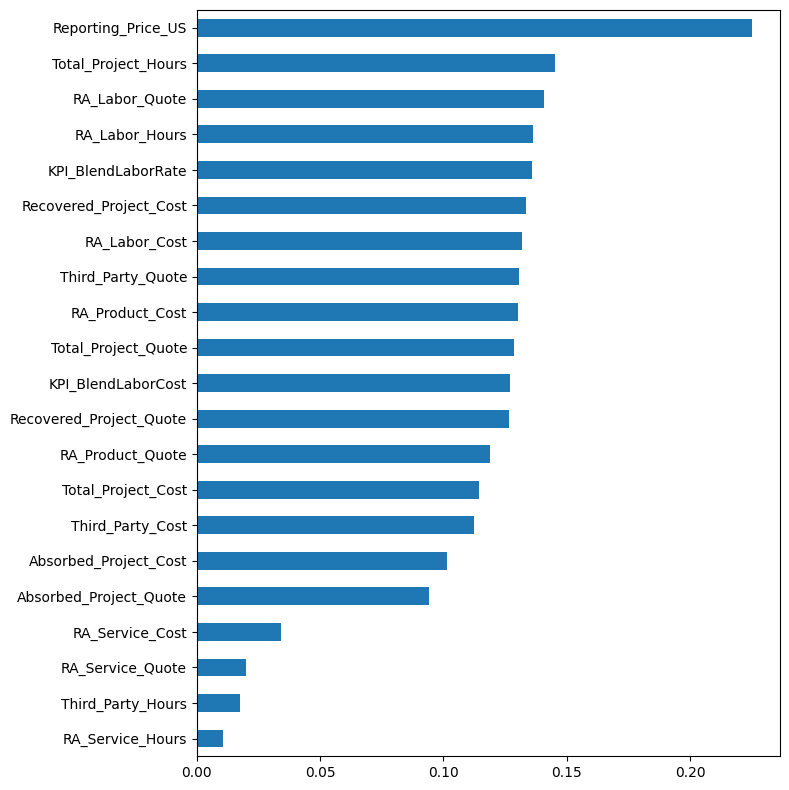

In [74]:
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression

plt.figure(figsize=(8,8))
array1 = mutual_info_classif(x,y)
s0 = pd.Series(array1, index = x.columns)
s0.sort_values().plot(kind = 'barh')
plt.tight_layout()
plt.savefig('output_fig/Feature_Sel_Mutual_Info.png')

## 5.2 Variance Inflation Factor

VIF will be used only on Independent Variables
VIF >> Multicolinearity
VIF >> 1 to inf
VIF > 10  == Multicolinearity is Present

In [75]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

<Axes: >

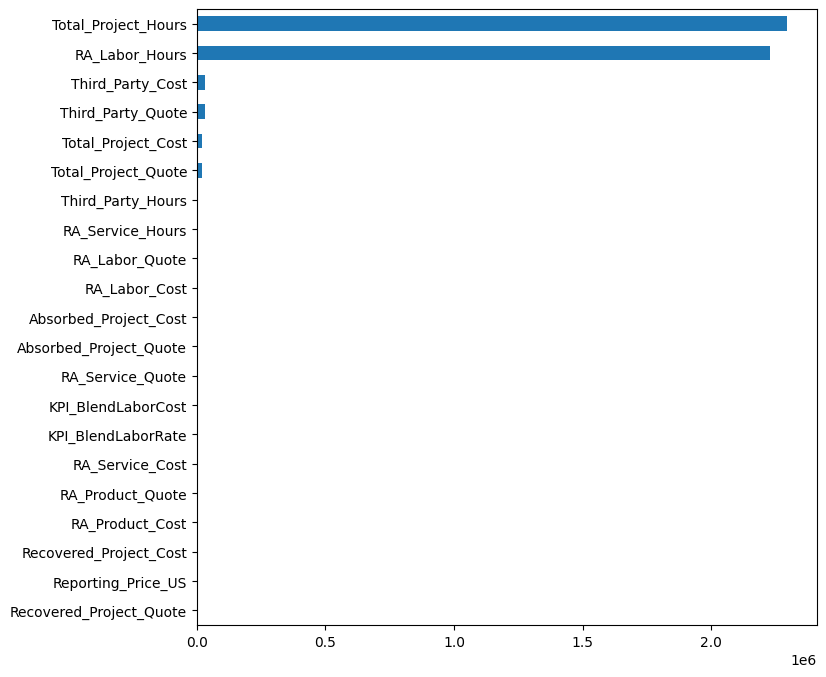

In [76]:
plt.figure(figsize=(8,8))
vif_list = []
for i in range(x.shape[1]):
    vif = variance_inflation_factor(x.values, i)
    vif_list.append(vif)
s3 = pd.Series(vif_list, index=x.columns)
s3.sort_values().plot(kind='barh')

### 5.3 Chi-Square Test (Not of use as its for cat data)

In [77]:
from sklearn.feature_selection import chi2, SelectKBest

In [78]:
# Compute the mode for each column
mode_values = x.mean()

# Replace negative values with the mode value in each column
x_non_negative = x.mask(x < 0, mode_values,axis=1)

# Check the updated DataFrame
print(x_non_negative)

      RA_Product_Cost  RA_Product_Quote  RA_Labor_Hours  RA_Labor_Cost  \
0             3049.59           5180.67          150.00        8336.21   
1            24080.00          36932.67         1616.30      104615.30   
2                0.00              0.00         1240.02      102720.09   
3                0.00              0.00           29.00        1526.20   
4              402.04           2295.88          528.00       38253.29   
...               ...               ...             ...            ...   
1853         34760.29          75967.70         1408.50       94019.90   
1854             0.00              0.00          201.00       12231.83   
1855             0.00              0.00          201.00       12231.83   
1856          1493.27          22937.71          261.00       16961.07   
1860          2955.90          11263.20           32.00        1904.26   

      RA_Labor_Quote  RA_Service_Hours  RA_Service_Cost  RA_Service_Quote  \
0           11492.93              

In [79]:
x_non_negative.min()

RA_Product_Cost             0.00
RA_Product_Quote            0.00
RA_Labor_Hours              0.00
RA_Labor_Cost               0.00
RA_Labor_Quote              0.00
RA_Service_Hours            0.00
RA_Service_Cost             0.00
RA_Service_Quote            0.00
Third_Party_Hours           0.00
Third_Party_Cost            0.00
Third_Party_Quote           0.00
Recovered_Project_Cost      0.00
Recovered_Project_Quote     0.00
Absorbed_Project_Cost       0.00
Absorbed_Project_Quote      0.00
Total_Project_Hours         0.00
Total_Project_Cost         85.72
Total_Project_Quote         0.00
Reporting_Price_US          0.00
KPI_BlendLaborRate          0.00
KPI_BlendLaborCost          0.00
dtype: float64

In [80]:
np.isnan(x_non_negative).any()

RA_Product_Cost            False
RA_Product_Quote           False
RA_Labor_Hours             False
RA_Labor_Cost              False
RA_Labor_Quote             False
RA_Service_Hours           False
RA_Service_Cost            False
RA_Service_Quote           False
Third_Party_Hours          False
Third_Party_Cost           False
Third_Party_Quote          False
Recovered_Project_Cost     False
Recovered_Project_Quote    False
Absorbed_Project_Cost      False
Absorbed_Project_Quote     False
Total_Project_Hours        False
Total_Project_Cost         False
Total_Project_Quote        False
Reporting_Price_US         False
KPI_BlendLaborRate         False
KPI_BlendLaborCost         False
dtype: bool

In [81]:
chi2_value, p_val = chi2(x_non_negative,y)
chi2_df = pd.DataFrame({'Chi-sqr': chi2_value, 'P-Val': np.around(p_val,3)}, index=x.columns)
chi2_df.sort_values('P-Val')

Chi-sqr  P-Val
RA_Product_Cost          1.668632e+07    0.0
Reporting_Price_US       1.944104e+09    0.0
Total_Project_Quote      1.670813e+09    0.0
Total_Project_Cost       1.410149e+09    0.0
Total_Project_Hours      1.495797e+06    0.0
Absorbed_Project_Quote   1.446552e+08    0.0
Absorbed_Project_Cost    1.836112e+08    0.0
Recovered_Project_Quote  2.285877e+07    0.0
Recovered_Project_Cost   1.829237e+07    0.0
KPI_BlendLaborRate       2.531533e+01    0.0
Third_Party_Quote        1.527165e+09    0.0
Third_Party_Hours        4.211468e+04    0.0
RA_Service_Quote         4.756796e+06    0.0
RA_Service_Cost          2.593099e+06    0.0
RA_Service_Hours         7.032463e+04    0.0
RA_Labor_Quote           1.498541e+08    0.0
RA_Labor_Cost            9.771307e+07    0.0
RA_Labor_Hours           1.394787e+06    0.0
RA_Product_Quote         3.167695e+07    0.0
Third_Party_Cost         1.262897e+09    0.0
KPI_BlendLaborCost       3.075158e+01    0.0

In [82]:
chi2_df[chi2_df['P-Val']<0.05]

Chi-sqr  P-Val
RA_Product_Cost          1.668632e+07    0.0
RA_Product_Quote         3.167695e+07    0.0
RA_Labor_Hours           1.394787e+06    0.0
RA_Labor_Cost            9.771307e+07    0.0
RA_Labor_Quote           1.498541e+08    0.0
RA_Service_Hours         7.032463e+04    0.0
RA_Service_Cost          2.593099e+06    0.0
RA_Service_Quote         4.756796e+06    0.0
Third_Party_Hours        4.211468e+04    0.0
Third_Party_Cost         1.262897e+09    0.0
Third_Party_Quote        1.527165e+09    0.0
Recovered_Project_Cost   1.829237e+07    0.0
Recovered_Project_Quote  2.285877e+07    0.0
Absorbed_Project_Cost    1.836112e+08    0.0
Absorbed_Project_Quote   1.446552e+08    0.0
Total_Project_Hours      1.495797e+06    0.0
Total_Project_Cost       1.410149e+09    0.0
Total_Project_Quote      1.670813e+09    0.0
Reporting_Price_US       1.944104e+09    0.0
KPI_BlendLaborRate       2.531533e+01    0.0
KPI_BlendLaborCost       3.075158e+01    0.0

In [83]:
best_feat = SelectKBest(chi2, k=3)
best_feat.fit(x_non_negative,y)
best_feat.scores_
best_feat.pvalues_

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.86823480e-07,
       2.93265041e-08])

In [84]:
chi2_df = pd.DataFrame({'Chi-sqr':best_feat.scores_ , 'P-Val': np.around(best_feat.pvalues_,3)}, index=x.columns)
chi2_df

Chi-sqr  P-Val
RA_Product_Cost          1.668632e+07    0.0
RA_Product_Quote         3.167695e+07    0.0
RA_Labor_Hours           1.394787e+06    0.0
RA_Labor_Cost            9.771307e+07    0.0
RA_Labor_Quote           1.498541e+08    0.0
RA_Service_Hours         7.032463e+04    0.0
RA_Service_Cost          2.593099e+06    0.0
RA_Service_Quote         4.756796e+06    0.0
Third_Party_Hours        4.211468e+04    0.0
Third_Party_Cost         1.262897e+09    0.0
Third_Party_Quote        1.527165e+09    0.0
Recovered_Project_Cost   1.829237e+07    0.0
Recovered_Project_Quote  2.285877e+07    0.0
Absorbed_Project_Cost    1.836112e+08    0.0
Absorbed_Project_Quote   1.446552e+08    0.0
Total_Project_Hours      1.495797e+06    0.0
Total_Project_Cost       1.410149e+09    0.0
Total_Project_Quote      1.670813e+09    0.0
Reporting_Price_US       1.944104e+09    0.0
KPI_BlendLaborRate       2.531533e+01    0.0
KPI_BlendLaborCost       3.075158e+01    0.0

### 5.4 ANOVA Test

In [85]:
from sklearn.feature_selection import f_classif

In [86]:
f_val, p_val = f_classif(x, y)
df_anova = pd.DataFrame({'F-Val':f_val , 'P-Val': p_val}, index=x.columns)
df_anova

F-Val         P-Val
RA_Product_Cost          54.902356  2.044347e-13
RA_Product_Quote         54.483760  2.511825e-13
RA_Labor_Hours           78.009526  2.645071e-18
RA_Labor_Cost            69.770084  1.428725e-16
RA_Labor_Quote           70.432583  1.035701e-16
RA_Service_Hours         38.086487  8.564640e-10
RA_Service_Cost           9.418256  2.184561e-03
RA_Service_Quote         12.183200  4.953459e-04
Third_Party_Hours        13.513761  2.446644e-04
Third_Party_Cost         41.510023  1.548811e-10
Third_Party_Quote        41.830831  1.319933e-10
Recovered_Project_Cost   54.599342  2.372965e-13
Recovered_Project_Quote  27.663639  1.639075e-07
Absorbed_Project_Cost    43.082625  7.076369e-11
Absorbed_Project_Quote   29.998267  5.016614e-08
Total_Project_Hours      84.790907  1.010594e-19
Total_Project_Cost       44.588614  3.346430e-11
Total_Project_Quote      45.512209  2.115356e-11
Reporting_Price_US       55.177219  1.785862e-13
KPI_BlendLaborRate        2.012743  1.561784e-01
KPI_BlendLaborCost        4.126578  4.238015e-02

In [87]:
f_val, p_val = f_classif(x, y)
df_anova = pd.DataFrame({'F-Val':f_val , 'P-Val': np.around(p_val,4)}, index=x.columns)
df_anova

F-Val   P-Val
RA_Product_Cost          54.902356  0.0000
RA_Product_Quote         54.483760  0.0000
RA_Labor_Hours           78.009526  0.0000
RA_Labor_Cost            69.770084  0.0000
RA_Labor_Quote           70.432583  0.0000
RA_Service_Hours         38.086487  0.0000
RA_Service_Cost           9.418256  0.0022
RA_Service_Quote         12.183200  0.0005
Third_Party_Hours        13.513761  0.0002
Third_Party_Cost         41.510023  0.0000
Third_Party_Quote        41.830831  0.0000
Recovered_Project_Cost   54.599342  0.0000
Recovered_Project_Quote  27.663639  0.0000
Absorbed_Project_Cost    43.082625  0.0000
Absorbed_Project_Quote   29.998267  0.0000
Total_Project_Hours      84.790907  0.0000
Total_Project_Cost       44.588614  0.0000
Total_Project_Quote      45.512209  0.0000
Reporting_Price_US       55.177219  0.0000
KPI_BlendLaborRate        2.012743  0.1562
KPI_BlendLaborCost        4.126578  0.0424

In [88]:
df_anova[p_val<0.05]         # These are important features

F-Val   P-Val
RA_Product_Cost          54.902356  0.0000
RA_Product_Quote         54.483760  0.0000
RA_Labor_Hours           78.009526  0.0000
RA_Labor_Cost            69.770084  0.0000
RA_Labor_Quote           70.432583  0.0000
RA_Service_Hours         38.086487  0.0000
RA_Service_Cost           9.418256  0.0022
RA_Service_Quote         12.183200  0.0005
Third_Party_Hours        13.513761  0.0002
Third_Party_Cost         41.510023  0.0000
Third_Party_Quote        41.830831  0.0000
Recovered_Project_Cost   54.599342  0.0000
Recovered_Project_Quote  27.663639  0.0000
Absorbed_Project_Cost    43.082625  0.0000
Absorbed_Project_Quote   29.998267  0.0000
Total_Project_Hours      84.790907  0.0000
Total_Project_Cost       44.588614  0.0000
Total_Project_Quote      45.512209  0.0000
Reporting_Price_US       55.177219  0.0000
KPI_BlendLaborCost        4.126578  0.0424

In [89]:
df_anova[p_val<0.05].index, len(df_anova[p_val<0.05].index)

(Index(['RA_Product_Cost', 'RA_Product_Quote', 'RA_Labor_Hours',
        'RA_Labor_Cost', 'RA_Labor_Quote', 'RA_Service_Hours',
        'RA_Service_Cost', 'RA_Service_Quote', 'Third_Party_Hours',
        'Third_Party_Cost', 'Third_Party_Quote', 'Recovered_Project_Cost',
        'Recovered_Project_Quote', 'Absorbed_Project_Cost',
        'Absorbed_Project_Quote', 'Total_Project_Hours', 'Total_Project_Cost',
        'Total_Project_Quote', 'Reporting_Price_US', 'KPI_BlendLaborCost'],
       dtype='object'),
 20)

In [90]:
chi2_df[chi2_df['P-Val']<0.05].index, len(chi2_df[chi2_df['P-Val']<0.05].index,)

(Index(['RA_Product_Cost', 'RA_Product_Quote', 'RA_Labor_Hours',
        'RA_Labor_Cost', 'RA_Labor_Quote', 'RA_Service_Hours',
        'RA_Service_Cost', 'RA_Service_Quote', 'Third_Party_Hours',
        'Third_Party_Cost', 'Third_Party_Quote', 'Recovered_Project_Cost',
        'Recovered_Project_Quote', 'Absorbed_Project_Cost',
        'Absorbed_Project_Quote', 'Total_Project_Hours', 'Total_Project_Cost',
        'Total_Project_Quote', 'Reporting_Price_US', 'KPI_BlendLaborRate',
        'KPI_BlendLaborCost'],
       dtype='object'),
 21)

In [91]:
x.columns,len(x.columns)

(Index(['RA_Product_Cost', 'RA_Product_Quote', 'RA_Labor_Hours',
        'RA_Labor_Cost', 'RA_Labor_Quote', 'RA_Service_Hours',
        'RA_Service_Cost', 'RA_Service_Quote', 'Third_Party_Hours',
        'Third_Party_Cost', 'Third_Party_Quote', 'Recovered_Project_Cost',
        'Recovered_Project_Quote', 'Absorbed_Project_Cost',
        'Absorbed_Project_Quote', 'Total_Project_Hours', 'Total_Project_Cost',
        'Total_Project_Quote', 'Reporting_Price_US', 'KPI_BlendLaborRate',
        'KPI_BlendLaborCost'],
       dtype='object'),
 21)

In [92]:
df6=df4.drop('Opportunity_Status_Lost', axis=1)

In [93]:
# All Independent Featurs only
df6.head()

RA_Product_Cost  RA_Product_Quote  RA_Labor_Hours  RA_Labor_Cost  \
0          3049.59           5180.67          150.00        8336.21   
1         24080.00          36932.67         1616.30      104615.30   
2             0.00              0.00         1240.02      102720.09   
3             0.00              0.00           29.00        1526.20   
4           402.04           2295.88          528.00       38253.29   

   RA_Labor_Quote  RA_Service_Hours  RA_Service_Cost  RA_Service_Quote  \
0        11492.93               0.0              0.0               0.0   
1       152723.07               0.0              0.0               0.0   
2       145702.25               0.0              0.0               0.0   
3         2152.38               0.0              0.0               0.0   
4        57164.80               0.0              0.0               0.0   

   Third_Party_Hours  Third_Party_Cost  ...  Recovered_Project_Cost  \
0                1.0           9029.58  ...                    0.00   
1                0.0           4605.44  ...                 1885.63   
2                0.0              0.00  ...                    0.00   
3                0.0           1426.92  ...                    0.00   
4                0.0           5264.00  ...                    0.00   

   Recovered_Project_Quote  Absorbed_Project_Cost  Absorbed_Project_Quote  \
0                      0.0                   0.00                     0.0   
1                   2218.4                6759.20                     0.0   
2                      0.0                2054.85                     0.0   
3                      0.0                   0.00                     0.0   
4                      0.0                3825.25                 -2240.0   

   Total_Project_Hours  Total_Project_Cost  Total_Project_Quote  \
0               151.00            20415.38             27296.85   
1              1616.30           141945.57            197292.30   
2              1240.02           104774.94            145702.25   
3                29.00             2953.12              3937.50   
4               528.00            47744.58             64599.51   

   Reporting_Price_US  KPI_BlendLaborRate  KPI_BlendLaborCost  
0             27296.8           76.619533           55.574733  
1            184962.0           94.489309           64.725175  
2            145702.0          117.499919           82.837446  
3              3937.5           74.220000           52.627586  
4             60561.9          108.266667           72.449413  

[5 rows x 21 columns]

In [94]:
df6.columns

Index(['RA_Product_Cost', 'RA_Product_Quote', 'RA_Labor_Hours',
       'RA_Labor_Cost', 'RA_Labor_Quote', 'RA_Service_Hours',
       'RA_Service_Cost', 'RA_Service_Quote', 'Third_Party_Hours',
       'Third_Party_Cost', 'Third_Party_Quote', 'Recovered_Project_Cost',
       'Recovered_Project_Quote', 'Absorbed_Project_Cost',
       'Absorbed_Project_Quote', 'Total_Project_Hours', 'Total_Project_Cost',
       'Total_Project_Quote', 'Reporting_Price_US', 'KPI_BlendLaborRate',
       'KPI_BlendLaborCost'],
      dtype='object')

In [95]:
df4.corr().tail(1)

RA_Product_Cost  RA_Product_Quote  RA_Labor_Hours  \
Opportunity_Status_Lost         0.182417          0.181744        0.215936   

                         RA_Labor_Cost  RA_Labor_Quote  RA_Service_Hours  \
Opportunity_Status_Lost       0.204719        0.205647          0.152715   

                         RA_Service_Cost  RA_Service_Quote  Third_Party_Hours  \
Opportunity_Status_Lost         0.076617          0.087066           0.091659   

                         Third_Party_Cost  ...  Recovered_Project_Quote  \
Opportunity_Status_Lost          0.159264  ...                 0.130569   

                         Absorbed_Project_Cost  Absorbed_Project_Quote  \
Opportunity_Status_Lost               0.162175                0.135869   

                         Total_Project_Hours  Total_Project_Cost  \
Opportunity_Status_Lost             0.224671            0.164909   

                         Total_Project_Quote  Reporting_Price_US  \
Opportunity_Status_Lost             0.166561            0.182858   

                         KPI_BlendLaborRate  KPI_BlendLaborCost  \
Opportunity_Status_Lost           -0.035501           -0.050799   

                         Opportunity_Status_Lost  
Opportunity_Status_Lost                      1.0  

[1 rows x 22 columns]

In [96]:
df4['Opportunity_Status_Lost'].value_counts(normalize=True)

Opportunity_Status_Lost
0    0.673763
1    0.326237
Name: proportion, dtype: float64

### Step 6. Model Training

In [97]:
# We are going ahead with all the Independent features

#### 6.1 Train Test Split

In [98]:
x = df4.drop('Opportunity_Status_Lost', axis = 1)
x

RA_Product_Cost  RA_Product_Quote  RA_Labor_Hours  RA_Labor_Cost  \
0             3049.59           5180.67          150.00        8336.21   
1            24080.00          36932.67         1616.30      104615.30   
2                0.00              0.00         1240.02      102720.09   
3                0.00              0.00           29.00        1526.20   
4              402.04           2295.88          528.00       38253.29   
...               ...               ...             ...            ...   
1853         34760.29          75967.70         1408.50       94019.90   
1854             0.00              0.00          201.00       12231.83   
1855             0.00              0.00          201.00       12231.83   
1856          1493.27          22937.71          261.00       16961.07   
1860          2955.90          11263.20           32.00        1904.26   

      RA_Labor_Quote  RA_Service_Hours  RA_Service_Cost  RA_Service_Quote  \
0           11492.93               0.0              0.0               0.0   
1          152723.07               0.0              0.0               0.0   
2          145702.25               0.0              0.0               0.0   
3            2152.38               0.0              0.0               0.0   
4           57164.80               0.0              0.0               0.0   
...              ...               ...              ...               ...   
1853       127791.34               0.0              0.0               0.0   
1854        17001.34               0.0              0.0               0.0   
1855        17001.34               0.0              0.0               0.0   
1856        23101.42               0.0              0.0               0.0   
1860         2551.17               0.0              0.0               0.0   

      Third_Party_Hours  Third_Party_Cost  ...  Recovered_Project_Cost  \
0                   1.0           9029.58  ...                    0.00   
1                   0.0           4605.44  ...                 1885.63   
2                   0.0              0.00  ...                    0.00   
3                   0.0           1426.92  ...                    0.00   
4                   0.0           5264.00  ...                    0.00   
...                 ...               ...  ...                     ...   
1853                0.0              0.00  ...                 3591.00   
1854                0.0              0.00  ...                  364.80   
1855                0.0              0.00  ...                  364.80   
1856                0.0           1102.76  ...                    0.00   
1860                0.0              0.00  ...                  443.38   

      Recovered_Project_Quote  Absorbed_Project_Cost  Absorbed_Project_Quote  \
0                        0.00                   0.00                    0.00   
1                     2218.40                6759.20                    0.00   
2                        0.00                2054.85                    0.00   
3                        0.00                   0.00                    0.00   
4                        0.00                3825.25                -2240.00   
...                       ...                    ...                     ...   
1853                  4021.56                   0.00                -6285.22   
1854                   408.56                1558.00                 1558.02   
1855                   408.56                1558.00                 1558.02   
1856                     0.00                3800.00               -16536.69   
1860                     0.00                 456.00                -2551.17   

      Total_Project_Hours  Total_Project_Cost  Total_Project_Quote  \
0                  151.00            20415.38             27296.85   
1                 1616.30           141945.57            197292.30   
2                 1240.02           104774.94            145702.25   
3                   29.00             2953.12              393

In [99]:
x.columns

Index(['RA_Product_Cost', 'RA_Product_Quote', 'RA_Labor_Hours',
       'RA_Labor_Cost', 'RA_Labor_Quote', 'RA_Service_Hours',
       'RA_Service_Cost', 'RA_Service_Quote', 'Third_Party_Hours',
       'Third_Party_Cost', 'Third_Party_Quote', 'Recovered_Project_Cost',
       'Recovered_Project_Quote', 'Absorbed_Project_Cost',
       'Absorbed_Project_Quote', 'Total_Project_Hours', 'Total_Project_Cost',
       'Total_Project_Quote', 'Reporting_Price_US', 'KPI_BlendLaborRate',
       'KPI_BlendLaborCost'],
      dtype='object')

In [100]:
y = df4['Opportunity_Status_Lost']

In [101]:
y

0       0
1       1
2       1
3       0
4       0
       ..
1853    0
1854    0
1855    0
1856    1
1860    1
Name: Opportunity_Status_Lost, Length: 1597, dtype: int32

In [102]:
y.value_counts(normalize=True)   

Opportunity_Status_Lost
0    0.673763
1    0.326237
Name: proportion, dtype: float64

In [103]:
y.value_counts(normalize=False)      #  values

Opportunity_Status_Lost
0    1076
1     521
Name: count, dtype: int64

In [104]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=2, stratify=y)

In [105]:
# Training 80% , testing 20%

In [106]:
x_train.shape

(1277, 21)

In [107]:
x_test.shape

(320, 21)

In [108]:
y_train.shape

(1277,)

In [109]:
y_test.shape

(320,)

In [110]:
print("print of x train is >>",len(x_train))
print("print of y train is >>",len(y_train))
print("print of x test is >>", len(x_test))
print("print of y test is >>", len(y_test))

print of x train is >> 1277
print of y train is >> 1277
print of x test is >> 320
print of y test is >> 320


In [111]:
y_train.value_counts(normalize=True)    # Ratio of this shpuld be same as "y.value_counts(normalize=True) "

Opportunity_Status_Lost
0    0.673453
1    0.326547
Name: proportion, dtype: float64

In [112]:
y_test.value_counts(normalize=True)    # Ratio of this shpuld be same as "y.value_counts(normalize=True) "

Opportunity_Status_Lost
0    0.675
1    0.325
Name: proportion, dtype: float64

#### 6.2 Model Instantiation

### LOGISTIC REGRESSION

In [113]:
log_clf = LogisticRegression()
log_clf.fit(x_train, y_train)

LogisticRegression()

#### 6.3 Evaluation

In [114]:
def evaluate_model(string,model, ind_var, act):
    print(string.center(50, '*'))
    
    pred = model.predict(ind_var)
    
    cnf_matrix=confusion_matrix(act,pred)
    print('confusion matrix \n',cnf_matrix)
    
    tn, fp, fn, tp=confusion_matrix(act,pred).ravel()
    print(f'tn={tn}, fp={fp}, fn={fn}, tp={tp}')
    
    accuracy=accuracy_score(act,pred)
    print('Accuracy:',accuracy)
    
    clf_report=classification_report(act,pred)
    print('Classification report:\n',clf_report)
    
    return pred

In [115]:
y_pred_train = evaluate_model('Training Data Evaluation',log_clf,x_train,y_train)
y_pred = evaluate_model('Testing Data Evaluation',log_clf, x_test, y_test)

*************Training Data Evaluation*************
confusion matrix 
 [[556 304]
 [270 147]]
tn=556, fp=304, fn=270, tp=147
Accuracy: 0.5505090054815975
Classification report:
               precision    recall  f1-score   support

           0       0.67      0.65      0.66       860
           1       0.33      0.35      0.34       417

    accuracy                           0.55      1277
   macro avg       0.50      0.50      0.50      1277
weighted avg       0.56      0.55      0.55      1277

*************Testing Data Evaluation**************
confusion matrix 
 [[143  73]
 [ 56  48]]
tn=143, fp=73, fn=56, tp=48
Accuracy: 0.596875
Classification report:
               precision    recall  f1-score   support

           0       0.72      0.66      0.69       216
           1       0.40      0.46      0.43       104

    accuracy                           0.60       320
   macro avg       0.56      0.56      0.56       320
weighted avg       0.61      0.60      0.60       320



In [116]:
y_test.value_counts(normalize=False) 

Opportunity_Status_Lost
0    216
1    104
Name: count, dtype: int64

### AUC-ROC Curve

In [117]:
# for AUC=ROc curve , we need probabilities."y_pred_proba" is probability of y_pred 
y_pred_proba = log_clf.predict_proba(x_test)    
y_pred_proba   # We have 2 classes, hence we will get 2*2 matrix

array([[5.24018330e-01, 4.75981670e-01],
       [4.59500920e-01, 5.40499080e-01],
       [5.25103883e-01, 4.74896117e-01],
       [5.21407501e-01, 4.78592499e-01],
       [5.25768495e-01, 4.74231505e-01],
       [5.01465851e-01, 4.98534149e-01],
       [5.13163221e-01, 4.86836779e-01],
       [4.89440140e-01, 5.10559860e-01],
       [5.27110852e-01, 4.72889148e-01],
       [5.00090284e-01, 4.99909716e-01],
       [4.49298359e-01, 5.50701641e-01],
       [5.36980273e-01, 4.63019727e-01],
       [5.10637686e-01, 4.89362314e-01],
       [5.24248018e-01, 4.75751982e-01],
       [5.04568590e-01, 4.95431410e-01],
       [5.23751369e-01, 4.76248631e-01],
       [5.09207377e-01, 4.90792623e-01],
       [5.02165178e-01, 4.97834822e-01],
       [5.73552137e-01, 4.26447863e-01],
       [5.02968273e-01, 4.97031727e-01],
       [5.00703373e-01, 4.99296627e-01],
       [3.12423980e-05, 9.99968758e-01],
       [5.18469602e-01, 4.81530398e-01],
       [4.98997840e-01, 5.01002160e-01],
       [4.983388

In [118]:
y_pred[:10]

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 0])

In [119]:
y_pred_proba[:,1]      # [:,1] means, here we have 2D so y_pred_proba[rows, columns], so we want all rows and only column 1
# We are inetrested in class 1, hence we are choosing column 1

array([0.47598167, 0.54049908, 0.47489612, 0.4785925 , 0.4742315 ,
       0.49853415, 0.48683678, 0.51055986, 0.47288915, 0.49990972,
       0.55070164, 0.46301973, 0.48936231, 0.47575198, 0.49543141,
       0.47624863, 0.49079262, 0.49783482, 0.42644786, 0.49703173,
       0.49929663, 0.99996876, 0.4815304 , 0.50100216, 0.50166114,
       0.49654423, 0.51001078, 0.52059103, 0.49280379, 0.49148113,
       0.47294196, 0.48665758, 0.49983984, 0.52172317, 0.54675526,
       0.49284198, 0.47704548, 0.49960201, 0.50726198, 0.49820851,
       0.50120894, 0.50630469, 0.94427212, 0.49944217, 0.55429756,
       0.48628262, 0.41246719, 0.4942328 , 0.49570406, 0.50143357,
       0.61421309, 0.42644786, 0.49703428, 0.50795807, 0.44092959,
       0.49440767, 0.49940297, 0.49923939, 0.50814112, 0.48716856,
       0.61706555, 0.49393032, 0.49771113, 0.49664155, 0.43378128,
       0.49901876, 0.49414626, 0.50203535, 0.47588425, 0.43542385,
       0.50321869, 0.50185348, 0.49943202, 0.50007774, 0.48040

In [120]:
fpr, tpr, thresh = roc_curve(y_test, y_pred_proba[:,1])
thresh

array([       inf, 0.99996876, 0.98367813, 0.98068156, 0.72634489,
       0.62360507, 0.60804324, 0.58082824, 0.56546917, 0.56381217,
       0.56018395, 0.55429756, 0.55070164, 0.54952   , 0.54675526,
       0.53848242, 0.53827102, 0.52819576, 0.52760003, 0.52550791,
       0.52172317, 0.51779712, 0.5175188 , 0.51577338, 0.51238468,
       0.51081906, 0.51055986, 0.51001078, 0.50910087, 0.50869362,
       0.50834455, 0.50820806, 0.50814112, 0.50799567, 0.50795807,
       0.50726198, 0.5069963 , 0.50575368, 0.50552268, 0.5054962 ,
       0.50543469, 0.5050584 , 0.50487382, 0.5033535 , 0.50322375,
       0.50223397, 0.50210169, 0.50191795, 0.50187815, 0.50143357,
       0.50139572, 0.50137295, 0.50093811, 0.50069155, 0.50059363,
       0.50038978, 0.50026706, 0.50008868, 0.50007774, 0.49990972,
       0.49983984, 0.499751  , 0.49966033, 0.49947931, 0.49944217,
       0.49943688, 0.49943202, 0.49940297, 0.49937165, 0.49929663,
       0.49923939, 0.4991339 , 0.49897636, 0.49877839, 0.49860

#### ROC Curve

Text(0, 0.5, 'True Positive Rate')

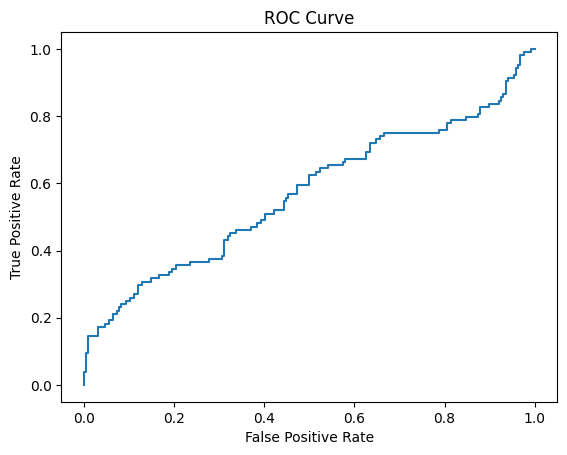

In [121]:
plt.title('ROC Curve')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [122]:
# This score implies the area under the curve
auc_score = roc_auc_score(y_test, y_pred_proba[:,1])
auc_score

0.5689547720797721

In [123]:
# Prob to belonging to 1
value_pred = []

for i in y_pred_proba[:,1]:
    if i >=0.6:
        value_pred.append(1)
        
    else:
        value_pred.append(0)

In [124]:
arr = np.array(value_pred)

confusion_matrix(y_test, value_pred)

array([[214,   2],
       [ 89,  15]], dtype=int64)

In [125]:
y_pred_proba[22:23]    # row 22 from y_pred_proba, can take any random row

array([[0.5184696, 0.4815304]])

In [126]:
result = y_pred_proba[22:23]
result[0,1]

0.48153039800945

In [127]:
def get_pred_class(threshold, result):
    prob = result[0,1]
    if prob >= threshold:
        return 'Class1'
    
    else:
        return 'Class0'
    
result = y_pred_proba[22:23]

threshold = 0.5
pred_class = get_pred_class(threshold, result)
print('Predicted Class is:', pred_class)

Predicted Class is: Class0


In [128]:
y_pred_proba[21:22]

array([[3.12423980e-05, 9.99968758e-01]])

In [129]:
result1 = y_pred_proba[21:22]
result1[0,1]

0.9999687576020436

In [130]:
def get_pred_class(threshold, result):
    prob = result1[0,1]
    if prob >= threshold:
        return 'Class1'
    
    else:
        return 'Class0'
    
result = y_pred_proba[21:22]

threshold = 0.5
pred_class = get_pred_class(threshold, result1)
print('Predicted Class is:', pred_class)

Predicted Class is: Class1


In [131]:
# To test class

In [130]:
#x.head(1)

In [131]:
# Glucose = 145.0
# BloodPressure = 55.0
# SkinThickness = 35.0
# Insulin = 0.0
# BMI = 30
# DiabetesPedigreeFunction= 0.7
# Age = 55

# test_array = np.array([Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age], ndmin= 2)
# test_array

# pred_class = log_clf.predict(test_array)[0]
# print('Predicted Class is:', pred_class)  # threshold = 0.5

In [133]:
# Glucose = 145.0
# BloodPressure = 55.0
# SkinThickness = 35.0
# Insulin = 0.0
# BMI = 30
# DiabetesPedigreeFunction= 0.7
# Age = 55

# test_array = np.array([Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age], ndmin= 2)
# test_array

# pred_proba = log_clf.predict_proba(test_array)
# pred_proba
# # print('Predicted Class is:', pred_class)  # threshold = 0.5

# def get_pred_class(threshold, result):
#     prob = result[0,1]
#     if prob >= threshold:
#         return 'Class1'
    
#     else:
#         return 'Class0'
    
# result = log_clf.predict_proba(test_array)
# print(result)

# threshold = 0.6
# pred_class = get_pred_class(threshold, result)
# print('Predicted Class is:', pred_class)

#### After applying SMOTE

In [134]:
#SMOTE - Synthetic Minority Oversampling Technique
# -> SMOTE creates synthetic instances for the minority class by interpolating between existing minority class instances.
# -> It selects a minority class instance and identifies its k-nearest neighbors. 
# -> Then, it generates synthetic instances along the line segments connecting the selected instance with its neighbors.
# ->SMOTE aims to introduce diversity into the minority class by creating synthetic instances that are not just duplicates of existing ones.

In [132]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [133]:
y.value_counts()

Opportunity_Status_Lost
0    1076
1     521
Name: count, dtype: int64

In [134]:
smote_os= SMOTE(sampling_strategy=0.85)
x_train_sm,y_train_sm=smote_os.fit_resample(x_train,y_train)

log_clf1=LogisticRegression()
log_clf1.fit(x_train_sm,y_train_sm)

evaluate_model("Training Data Evaluation", log_clf1, x_train_sm, y_train_sm)
evaluate_model("Testing Data Evaluation",log_clf1,x_test, y_test)

*************Training Data Evaluation*************
confusion matrix 
 [[241 619]
 [151 580]]
tn=241, fp=619, fn=151, tp=580
Accuracy: 0.5160276555625393
Classification report:
               precision    recall  f1-score   support

           0       0.61      0.28      0.38       860
           1       0.48      0.79      0.60       731

    accuracy                           0.52      1591
   macro avg       0.55      0.54      0.49      1591
weighted avg       0.55      0.52      0.48      1591

*************Testing Data Evaluation**************
confusion matrix 
 [[ 66 150]
 [ 22  82]]
tn=66, fp=150, fn=22, tp=82
Accuracy: 0.4625
Classification report:
               precision    recall  f1-score   support

           0       0.75      0.31      0.43       216
           1       0.35      0.79      0.49       104

    accuracy                           0.46       320
   macro avg       0.55      0.55      0.46       320
weighted avg       0.62      0.46      0.45       320



array([1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,

In [135]:
y_train_sm.value_counts()

Opportunity_Status_Lost
0    860
1    731
Name: count, dtype: int64

In [136]:
print("print of x train is >>",len(x_train))
print("print of y train is >>",len(y_train))
print("print of x test is >>", len(x_test))
print("print of y test is >>", len(y_test))

print of x train is >> 1277
print of y train is >> 1277
print of x test is >> 320
print of y test is >> 320


#### Oversampling Technique

In [137]:
rndm_os=RandomOverSampler(sampling_strategy=0.8)
x_train_ros, y_train_ros =rndm_os.fit_resample(x_train, y_train)
print("y_train value counts --> \n",y_train.value_counts())
print('\n')
print("y_train ROS value counts --> \n",y_train_ros.value_counts())

y_train value counts --> 
 Opportunity_Status_Lost
0    860
1    417
Name: count, dtype: int64


y_train ROS value counts --> 
 Opportunity_Status_Lost
0    860
1    688
Name: count, dtype: int64


In [138]:
# Below values might differ everytime as it ROS

In [139]:
log_clf2=LogisticRegression()
log_clf2.fit(x_train_ros, y_train_ros)

evaluate_model("Training Data Evaluation", log_clf2, x_train_ros, y_train_ros)
evaluate_model("Testing Data Evaluation",log_clf2,x_test, y_test)

*************Training Data Evaluation*************
confusion matrix 
 [[250 610]
 [171 517]]
tn=250, fp=610, fn=171, tp=517
Accuracy: 0.49547803617571057
Classification report:
               precision    recall  f1-score   support

           0       0.59      0.29      0.39       860
           1       0.46      0.75      0.57       688

    accuracy                           0.50      1548
   macro avg       0.53      0.52      0.48      1548
weighted avg       0.53      0.50      0.47      1548

*************Testing Data Evaluation**************
confusion matrix 
 [[ 60 156]
 [ 24  80]]
tn=60, fp=156, fn=24, tp=80
Accuracy: 0.4375
Classification report:
               precision    recall  f1-score   support

           0       0.71      0.28      0.40       216
           1       0.34      0.77      0.47       104

    accuracy                           0.44       320
   macro avg       0.53      0.52      0.44       320
weighted avg       0.59      0.44      0.42       320



array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,

In [140]:
print("print of x train is >>",len(x_train))
print("print of y train is >>",len(y_train))
print("print of x test is >>", len(x_test))
print("print of y test is >>", len(y_test))

print of x train is >> 1277
print of y train is >> 1277
print of x test is >> 320
print of y test is >> 320


#### --> None is giving good accuracy 

#### Hyperparameter Tuning

In [142]:
parameter = {'penalty':['l1','l2','elasticnet'],'C':[1,2,3,4,5,6,10,20,30,40,50,60],'max_iter':[100,200,300]}

In [143]:
log_clf3=LogisticRegression()
log_clf3=GridSearchCV(log_clf3,param_grid=parameter,scoring='accuracy',cv=5)

In [144]:
log_clf3.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 10, 20, 30, 40, 50, 60],
                         'max_iter': [100, 200, 300],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [145]:
print(log_clf3.best_params_)

{'C': 6, 'max_iter': 300, 'penalty': 'l2'}


In [146]:
log_clf3.best_estimator_

LogisticRegression(C=6, max_iter=300)

In [147]:
print(log_clf3.best_score_)

0.5653645833333334


In [148]:
log_clf4=log_clf3.best_estimator_
log_clf4.fit(x_train, y_train)

LogisticRegression(C=6, max_iter=300)

In [149]:
evaluate_model("Training Data Evaluation", log_clf4, x_train, y_train)
evaluate_model("Testing Data Evaluation",log_clf4,x_test, y_test)

*************Training Data Evaluation*************
confusion matrix 
 [[614 246]
 [283 134]]
tn=614, fp=246, fn=283, tp=134
Accuracy: 0.5857478465152701
Classification report:
               precision    recall  f1-score   support

           0       0.68      0.71      0.70       860
           1       0.35      0.32      0.34       417

    accuracy                           0.59      1277
   macro avg       0.52      0.52      0.52      1277
weighted avg       0.58      0.59      0.58      1277

*************Testing Data Evaluation**************
confusion matrix 
 [[153  63]
 [ 65  39]]
tn=153, fp=63, fn=65, tp=39
Accuracy: 0.6
Classification report:
               precision    recall  f1-score   support

           0       0.70      0.71      0.71       216
           1       0.38      0.38      0.38       104

    accuracy                           0.60       320
   macro avg       0.54      0.54      0.54       320
weighted avg       0.60      0.60      0.60       320



array([0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,

##### AUC-ROC Curve

In [150]:
y_pred_proba_lghyp = log_clf4.predict_proba(x_test)    
y_pred_proba_lghyp

array([[5.61223821e-01, 4.38776179e-01],
       [4.69029423e-01, 5.30970577e-01],
       [5.33809804e-01, 4.66190196e-01],
       [5.23643962e-01, 4.76356038e-01],
       [5.17876747e-01, 4.82123253e-01],
       [4.99971527e-01, 5.00028473e-01],
       [5.08049632e-01, 4.91950368e-01],
       [4.93392732e-01, 5.06607268e-01],
       [5.17645707e-01, 4.82354293e-01],
       [4.99893291e-01, 5.00106709e-01],
       [5.13281858e-01, 4.86718142e-01],
       [4.90341586e-01, 5.09658414e-01],
       [5.12372452e-01, 4.87627548e-01],
       [5.25352206e-01, 4.74647794e-01],
       [5.08358873e-01, 4.91641127e-01],
       [5.20195725e-01, 4.79804275e-01],
       [5.12138158e-01, 4.87861842e-01],
       [5.00915873e-01, 4.99084127e-01],
       [5.27176567e-01, 4.72823433e-01],
       [5.02627167e-01, 4.97372833e-01],
       [5.00884962e-01, 4.99115038e-01],
       [1.70673777e-05, 9.99982933e-01],
       [5.11719448e-01, 4.88280552e-01],
       [5.00510331e-01, 4.99489669e-01],
       [4.920833

In [151]:
fpr, tpr, thresh = roc_curve(y_test, y_pred_proba_lghyp[:,1])
thresh

array([           inf, 1.00000000e+00, 9.94484316e-01, 9.92064294e-01,
       7.70319242e-01, 7.02405531e-01, 6.39313105e-01, 6.20580947e-01,
       6.07637756e-01, 6.01033276e-01, 5.83725223e-01, 5.54981508e-01,
       5.35139854e-01, 5.23750465e-01, 5.13697745e-01, 5.10402038e-01,
       5.09938372e-01, 5.09791473e-01, 5.09658414e-01, 5.08338006e-01,
       5.08323578e-01, 5.07916675e-01, 5.06607268e-01, 5.05442984e-01,
       5.05369088e-01, 5.05241896e-01, 5.04871420e-01, 5.04493241e-01,
       5.04081418e-01, 5.03387210e-01, 5.03149752e-01, 5.03026048e-01,
       5.02928736e-01, 5.02715133e-01, 5.02453714e-01, 5.01254980e-01,
       5.01141571e-01, 5.00810403e-01, 5.00554330e-01, 5.00383682e-01,
       5.00106709e-01, 5.00065140e-01, 4.99839562e-01, 4.99677800e-01,
       4.99653839e-01, 4.99640145e-01, 4.99614302e-01, 4.99569874e-01,
       4.99374143e-01, 4.99335587e-01, 4.99314316e-01, 4.99285516e-01,
       4.99247094e-01, 4.99184684e-01, 4.99170775e-01, 4.99143739e-01,
      

Text(0, 0.5, 'True Positive Rate')

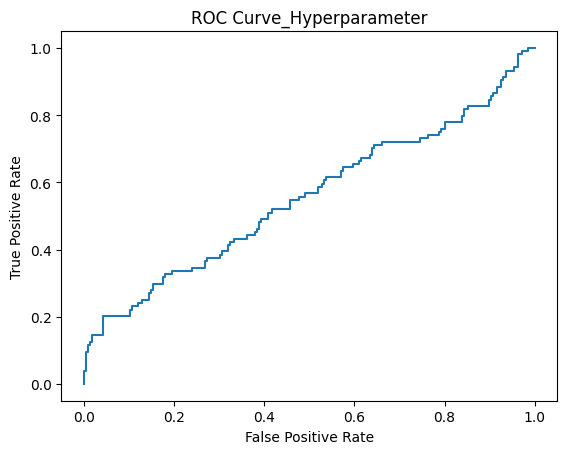

In [152]:
plt.title('ROC Curve_Hyperparameter')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [153]:
auc_score = roc_auc_score(y_test, y_pred_proba_lghyp[:,1])
auc_score

0.5543536324786325

In [154]:
print("print of x train is >>",len(x_train))
print("print of y train is >>",len(y_train))
print("print of x test is >>", len(x_test))
print("print of y test is >>", len(y_test))

print of x train is >> 1277
print of y train is >> 1277
print of x test is >> 320
print of y test is >> 320


## KNN MODEL 

In [155]:
knn_clf=KNeighborsClassifier(n_neighbors=7,p=1)
knn_clf.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=7, p=1)

In [156]:
evaluate_model('Training Data Evaluation',knn_clf,x_train,y_train)
evaluate_model('Testing Data Evaluation',knn_clf,x_test,y_test)

*************Training Data Evaluation*************
confusion matrix 
 [[800  60]
 [202 215]]
tn=800, fp=60, fn=202, tp=215
Accuracy: 0.7948316366483946
Classification report:
               precision    recall  f1-score   support

           0       0.80      0.93      0.86       860
           1       0.78      0.52      0.62       417

    accuracy                           0.79      1277
   macro avg       0.79      0.72      0.74      1277
weighted avg       0.79      0.79      0.78      1277

*************Testing Data Evaluation**************
confusion matrix 
 [[195  21]
 [ 60  44]]
tn=195, fp=21, fn=60, tp=44
Accuracy: 0.746875
Classification report:
               precision    recall  f1-score   support

           0       0.76      0.90      0.83       216
           1       0.68      0.42      0.52       104

    accuracy                           0.75       320
   macro avg       0.72      0.66      0.67       320
weighted avg       0.74      0.75      0.73       320



array([1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,

#### Hyperparameter Tuning to KNN

In [157]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [158]:
knn_clf1 = KNeighborsClassifier()

hyperparameters = { 'n_neighbors': np.arange(3,20),
                  'p' : [1,2]}

gscv_knn_clf = GridSearchCV(knn_clf1, hyperparameters, cv = 3)
gscv_knn_clf.fit(x_train,y_train)
gscv_knn_clf.best_estimator_

KNeighborsClassifier(n_neighbors=4, p=1)

In [159]:
gscv_knn_clf.best_params_

{'n_neighbors': 4, 'p': 1}

In [160]:
knn_clf1= gscv_knn_clf.best_estimator_
knn_clf1.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=4, p=1)

In [161]:
evaluate_model('Training Data Evaluation',knn_clf1,x_train,y_train)
evaluate_model('Testing Data Evaluation',knn_clf1,x_test,y_test)

*************Training Data Evaluation*************
confusion matrix 
 [[843  17]
 [194 223]]
tn=843, fp=17, fn=194, tp=223
Accuracy: 0.8347689898198903
Classification report:
               precision    recall  f1-score   support

           0       0.81      0.98      0.89       860
           1       0.93      0.53      0.68       417

    accuracy                           0.83      1277
   macro avg       0.87      0.76      0.78      1277
weighted avg       0.85      0.83      0.82      1277

*************Testing Data Evaluation**************
confusion matrix 
 [[200  16]
 [ 63  41]]
tn=200, fp=16, fn=63, tp=41
Accuracy: 0.753125
Classification report:
               precision    recall  f1-score   support

           0       0.76      0.93      0.84       216
           1       0.72      0.39      0.51       104

    accuracy                           0.75       320
   macro avg       0.74      0.66      0.67       320
weighted avg       0.75      0.75      0.73       320



array([1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,

#### KNN with SMOTE

In [162]:
smote_os_k1 = SMOTE(sampling_strategy=0.95)
x_train_sm1, y_train_sm1 = smote_os_k1.fit_resample(x_train,y_train)
print('Before Sampling \n',y_train.value_counts())
print('\n')
print('After Smote Sampling \n',y_train_sm1.value_counts())

Before Sampling 
 Opportunity_Status_Lost
0    860
1    417
Name: count, dtype: int64


After Smote Sampling 
 Opportunity_Status_Lost
0    860
1    817
Name: count, dtype: int64


In [163]:
knn_clf2 = KNeighborsClassifier(n_neighbors=11, p=1)
knn_clf2.fit(x_train_sm1, y_train_sm1)  
evaluate_model('Training data Evaluation',knn_clf2,x_train_sm1,y_train_sm1)
evaluate_model('Testing data Evaluation',knn_clf2,x_test,y_test)

*************Training data Evaluation*************
confusion matrix 
 [[675 185]
 [174 643]]
tn=675, fp=185, fn=174, tp=643
Accuracy: 0.7859272510435301
Classification report:
               precision    recall  f1-score   support

           0       0.80      0.78      0.79       860
           1       0.78      0.79      0.78       817

    accuracy                           0.79      1677
   macro avg       0.79      0.79      0.79      1677
weighted avg       0.79      0.79      0.79      1677

*************Testing data Evaluation**************
confusion matrix 
 [[162  54]
 [ 41  63]]
tn=162, fp=54, fn=41, tp=63
Accuracy: 0.703125
Classification report:
               precision    recall  f1-score   support

           0       0.80      0.75      0.77       216
           1       0.54      0.61      0.57       104

    accuracy                           0.70       320
   macro avg       0.67      0.68      0.67       320
weighted avg       0.71      0.70      0.71       320



array([1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,

##### AUC-ROC Curve

In [164]:
y_pred_proba_knn = knn_clf.predict_proba(x_test)    
y_pred_proba_knn

array([[0.        , 1.        ],
       [0.85714286, 0.14285714],
       [0.71428571, 0.28571429],
       [0.14285714, 0.85714286],
       [0.42857143, 0.57142857],
       [0.85714286, 0.14285714],
       [0.57142857, 0.42857143],
       [0.71428571, 0.28571429],
       [0.57142857, 0.42857143],
       [0.85714286, 0.14285714],
       [0.        , 1.        ],
       [0.71428571, 0.28571429],
       [0.71428571, 0.28571429],
       [1.        , 0.        ],
       [0.71428571, 0.28571429],
       [0.71428571, 0.28571429],
       [1.        , 0.        ],
       [0.71428571, 0.28571429],
       [0.        , 1.        ],
       [0.85714286, 0.14285714],
       [0.85714286, 0.14285714],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.71428571, 0.28571429],
       [0.85714286, 0.14285714],
       [0.85714286, 0.14285714],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.42857143, 0.57142857],
       [0.

In [165]:
fpr, tpr, thresh = roc_curve(y_test, y_pred_proba_knn[:,1])
thresh

array([       inf, 1.        , 0.85714286, 0.71428571, 0.57142857,
       0.42857143, 0.28571429, 0.14285714, 0.        ])

Text(0, 0.5, 'True Positive Rate')

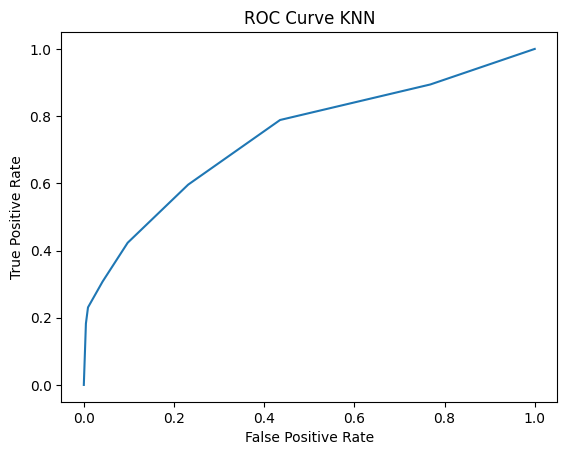

In [166]:
plt.title('ROC Curve KNN')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [167]:
auc_score = roc_auc_score(y_test, y_pred_proba_knn[:,1])
auc_score

0.7395388176638177

In [168]:
# Hyperparameter model
y_pred_proba_knn_hyp = knn_clf1.predict_proba(x_test)    
y_pred_proba_knn_hyp

array([[0.  , 1.  ],
       [0.75, 0.25],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.25, 0.75],
       [1.  , 0.  ],
       [0.75, 0.25],
       [0.5 , 0.5 ],
       [0.75, 0.25],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.75, 0.25],
       [0.5 , 0.5 ],
       [1.  , 0.  ],
       [0.5 , 0.5 ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.5 , 0.5 ],
       [0.  , 1.  ],
       [0.75, 0.25],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [1.  , 0.  ],
       [0.75, 0.25],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.5 , 0.5 ],
       [1.  , 0.  ],
       [0.75, 0.25],
       [0.5 , 0.5 ],
       [0.25, 0.75],
       [0.25, 0.75],
       [0.75, 0.25],
       [0.5 , 0.5 ],
       [0.75, 0.25],
       [1.  , 0.  ],
       [0.75, 0.25],
       [0.75, 0.25],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  ,

In [169]:
fpr, tpr, thresh = roc_curve(y_test, y_pred_proba_knn_hyp[:,1])
thresh

array([ inf, 1.  , 0.75, 0.5 , 0.25, 0.  ])

Text(0, 0.5, 'True Positive Rate')

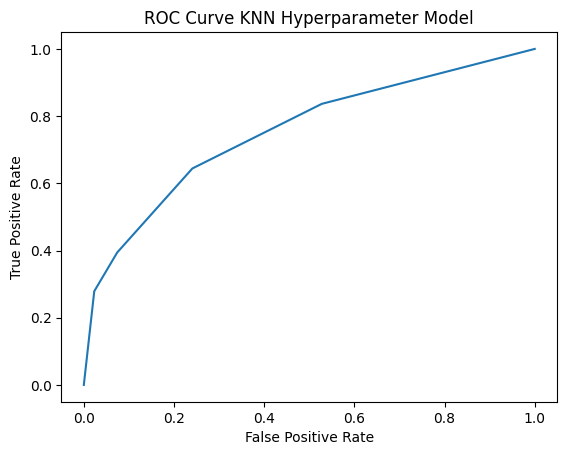

In [170]:
plt.title('ROC Curve KNN Hyperparameter Model')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [171]:
auc_score = roc_auc_score(y_test, y_pred_proba_knn_hyp[:,1])
auc_score

0.7530493233618234

In [172]:
print("print of x train is >>",len(x_train))
print("print of y train is >>",len(y_train))
print("print of x test is >>", len(x_test))
print("print of y test is >>", len(y_test))

print of x train is >> 1277
print of y train is >> 1277
print of x test is >> 320
print of y test is >> 320


### DECISION TREE

In [173]:
from sklearn.tree import DecisionTreeClassifier,plot_tree

In [174]:
dt_clf=DecisionTreeClassifier(random_state=20)
dt_clf.fit(x_train,y_train)

DecisionTreeClassifier(random_state=20)

In [175]:
evaluate_model('Training Data Evaluation',dt_clf,x_train,y_train)
evaluate_model('Testing Data Evaluation',dt_clf,x_test,y_test)

*************Training Data Evaluation*************
confusion matrix 
 [[860   0]
 [  0 417]]
tn=860, fp=0, fn=0, tp=417
Accuracy: 1.0
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       860
           1       1.00      1.00      1.00       417

    accuracy                           1.00      1277
   macro avg       1.00      1.00      1.00      1277
weighted avg       1.00      1.00      1.00      1277

*************Testing Data Evaluation**************
confusion matrix 
 [[169  47]
 [ 31  73]]
tn=169, fp=47, fn=31, tp=73
Accuracy: 0.75625
Classification report:
               precision    recall  f1-score   support

           0       0.84      0.78      0.81       216
           1       0.61      0.70      0.65       104

    accuracy                           0.76       320
   macro avg       0.73      0.74      0.73       320
weighted avg       0.77      0.76      0.76       320



array([1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,

In [176]:
#Model is overfitted (check)

In [177]:
print("print of x train is >>",len(x_train))
print("print of y train is >>",len(y_train))
print("print of x test is >>", len(x_test))
print("print of y test is >>", len(y_test))

print of x train is >> 1277
print of y train is >> 1277
print of x test is >> 320
print of y test is >> 320


### Decision Tree by Hyperparameter Tuning

In [178]:
    criterion='gini',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    class_weight=None,
    ccp_alpha=0.0,

In [179]:
dt_clf1 = DecisionTreeClassifier(random_state=20)
hyperparamters = {'criterion':['gini','entropy'],
    'splitter':['best','random'],
    'max_depth':np.arange(3,10),
    'min_samples_split':np.arange(5,20) ,
    'min_samples_leaf':np.arange(3,20)}

gscv_dt_model = GridSearchCV(dt_clf1, hyperparamters, cv = 5)
gscv_dt_model.fit(x_train, y_train)
gscv_dt_model.best_estimator_

DecisionTreeClassifier(max_depth=8, min_samples_leaf=3, min_samples_split=8,
                       random_state=20)

In [180]:
gscv_dt_model.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'splitter': 'best'}

In [181]:
dt_clf2 = DecisionTreeClassifier(criterion='gini', max_depth=8, min_samples_leaf=3,
                       min_samples_split=8, random_state=20, splitter='best')
dt_clf2.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=8, min_samples_leaf=3, min_samples_split=8,
                       random_state=20)

In [182]:
evaluate_model('Training Data Evalation',dt_clf2,x_train,y_train)
evaluate_model('Testing Data Evaluation',dt_clf2,x_test,y_test)

*************Training Data Evalation**************
confusion matrix 
 [[845  15]
 [197 220]]
tn=845, fp=15, fn=197, tp=220
Accuracy: 0.8339859044635866
Classification report:
               precision    recall  f1-score   support

           0       0.81      0.98      0.89       860
           1       0.94      0.53      0.67       417

    accuracy                           0.83      1277
   macro avg       0.87      0.76      0.78      1277
weighted avg       0.85      0.83      0.82      1277

*************Testing Data Evaluation**************
confusion matrix 
 [[201  15]
 [ 55  49]]
tn=201, fp=15, fn=55, tp=49
Accuracy: 0.78125
Classification report:
               precision    recall  f1-score   support

           0       0.79      0.93      0.85       216
           1       0.77      0.47      0.58       104

    accuracy                           0.78       320
   macro avg       0.78      0.70      0.72       320
weighted avg       0.78      0.78      0.76       320



array([1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

#### Plotting Decision tree by Hyperparameter tuning

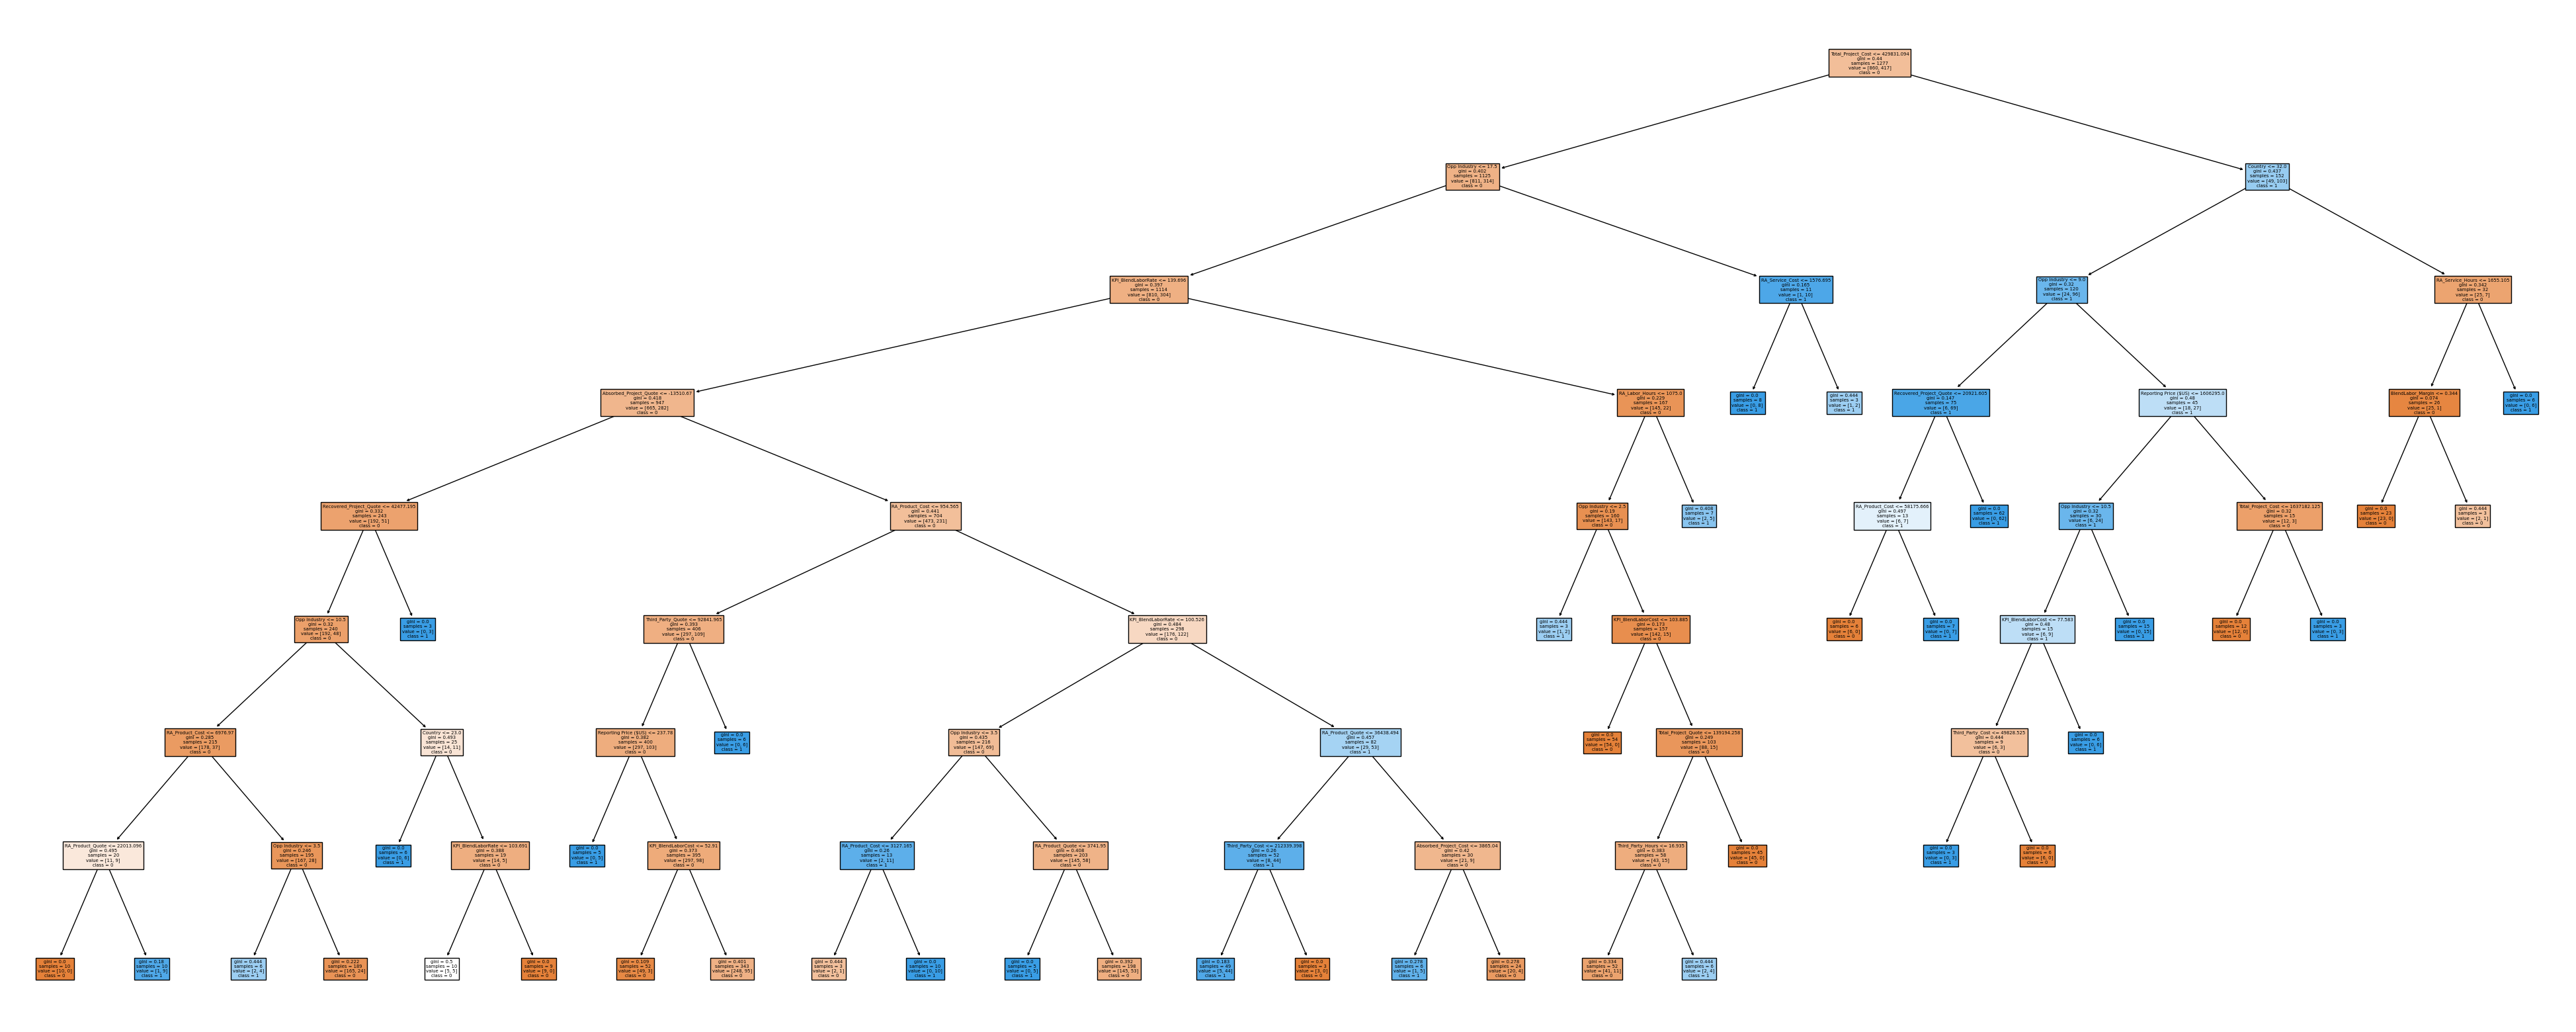

In [183]:
plt.figure(figsize=(50,20))
plot_tree(dt_clf2, feature_names=x.columns, filled=True, class_names=['0','1'])
plt.savefig('output_fig/Decision_tree_hyperparameters.png', dpi = 300)

##### AUC -ROC Curve

In [184]:
# Sample
# y_pred_proba_ = dt_clf.predict_proba(x_test)    
# y_pred_proba_knn
# fpr, tpr, thresh = roc_curve(y_test, y_pred_proba[:,1])
# thresh
# plt.title('ROC Curve KNN')
# plt.plot(fpr, tpr)
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# auc_score = roc_auc_score(y_test, y_pred_proba[:,1])
# auc_score

In [185]:
y_pred_proba_dt = dt_clf.predict_proba(x_test)    
y_pred_proba_dt

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.

In [186]:
fpr, tpr, thresh = roc_curve(y_test, y_pred_proba_dt[:,1])
thresh

array([inf,  1.,  0.])

Text(0, 0.5, 'True Positive Rate')

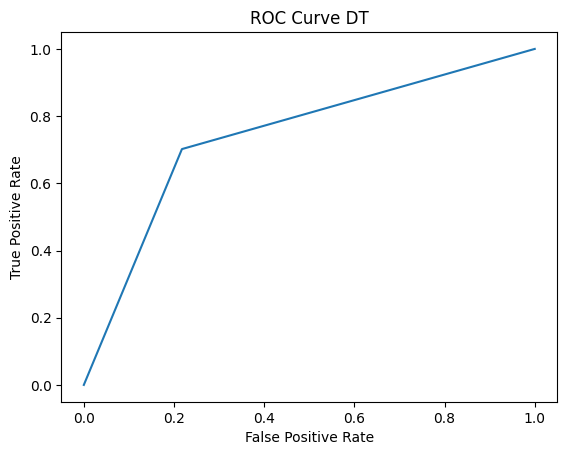

In [187]:
plt.title('ROC Curve DT')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [188]:
auc_score = roc_auc_score(y_test, y_pred_proba_dt[:,1])
auc_score

0.7421652421652423

In [189]:
print("print of x train is >>",len(x_train))
print("print of y train is >>",len(y_train))
print("print of x test is >>", len(x_test))
print("print of y test is >>", len(y_test))

print of x train is >> 1277
print of y train is >> 1277
print of x test is >> 320
print of y test is >> 320


#### AUC ROC Curve-DT Hyper

In [190]:
y_pred_proba_dthyp = dt_clf2.predict_proba(x_test)    
y_pred_proba_dthyp

array([[0.        , 1.        ],
       [0.72303207, 0.27696793],
       [0.73232323, 0.26767677],
       [0.72303207, 0.27696793],
       [0.72303207, 0.27696793],
       [0.87301587, 0.12698413],
       [1.        , 0.        ],
       [0.72303207, 0.27696793],
       [0.73232323, 0.26767677],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.10204082, 0.89795918],
       [0.5       , 0.5       ],
       [0.78846154, 0.21153846],
       [0.87301587, 0.12698413],
       [0.87301587, 0.12698413],
       [0.73232323, 0.26767677],
       [0.        , 1.        ],
       [0.66666667, 0.33333333],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.87301587, 0.12698413],
       [0.72303207, 0.27696793],
       [0.94230769, 0.05769231],
       [0.72303207, 0.27696793],
       [0.94230769, 0.05769231],
       [0.94230769, 0.05769231],
       [0.73232323, 0.26767677],
       [0.28571429, 0.71428571],
       [0.

In [191]:
fpr, tpr, thresh = roc_curve(y_test, y_pred_proba_dthyp[:,1])
thresh

array([       inf, 1.        , 0.9       , 0.89795918, 0.83333333,
       0.71428571, 0.66666667, 0.5       , 0.33333333, 0.27696793,
       0.26767677, 0.21153846, 0.16666667, 0.12698413, 0.05769231,
       0.        ])

Text(0, 0.5, 'True Positive Rate')

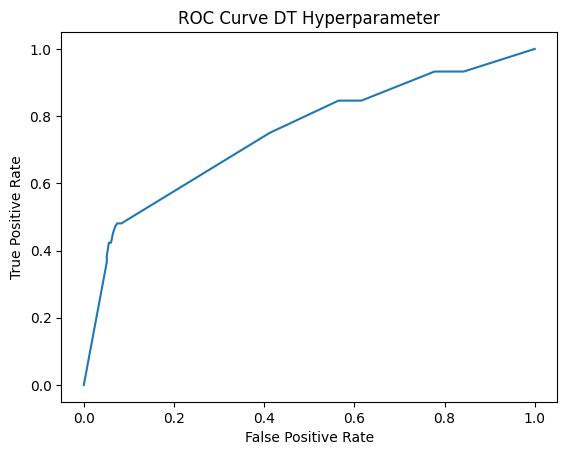

In [192]:
plt.title('ROC Curve DT Hyperparameter')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [193]:
auc_score = roc_auc_score(y_test, y_pred_proba_dthyp[:,1])
auc_score

0.7479300213675214

In [194]:
print("print of x train is >>",len(x_train))
print("print of y train is >>",len(y_train))
print("print of x test is >>", len(x_test))
print("print of y test is >>", len(y_test))

print of x train is >> 1277
print of y train is >> 1277
print of x test is >> 320
print of y test is >> 320


### Random Forest

In [195]:
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, VotingClassifier

In [196]:
rf_clf = RandomForestClassifier( random_state=42)
rf_clf.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [197]:
evaluate_model('Training Data Evaluation',rf_clf,x_train,y_train)
evaluate_model('Testing Data Evaluation',rf_clf,x_test,y_test)

*************Training Data Evaluation*************
confusion matrix 
 [[860   0]
 [  0 417]]
tn=860, fp=0, fn=0, tp=417
Accuracy: 1.0
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       860
           1       1.00      1.00      1.00       417

    accuracy                           1.00      1277
   macro avg       1.00      1.00      1.00      1277
weighted avg       1.00      1.00      1.00      1277

*************Testing Data Evaluation**************
confusion matrix 
 [[199  17]
 [ 35  69]]
tn=199, fp=17, fn=35, tp=69
Accuracy: 0.8375
Classification report:
               precision    recall  f1-score   support

           0       0.85      0.92      0.88       216
           1       0.80      0.66      0.73       104

    accuracy                           0.84       320
   macro avg       0.83      0.79      0.81       320
weighted avg       0.83      0.84      0.83       320



array([1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,

### Random Forest Hyperparameter Tuning

In [198]:
rf_clf1 = RandomForestClassifier(random_state=42)
hyperparamters = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20],       # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],   # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]      # Minimum number of samples required to be at a leaf node
}

gscv_rf_model = GridSearchCV(rf_clf1, param_grid=hyperparamters, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)
gscv_rf_model.fit(x_train, y_train)
gscv_rf_model.best_estimator_

Fitting 5 folds for each of 81 candidates, totalling 405 fits


RandomForestClassifier(random_state=42)

In [199]:
print(gscv_rf_model.best_estimator_)

RandomForestClassifier(random_state=42)


In [200]:
print(gscv_dt_model.best_params_)

{'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 3, 'min_samples_split': 8, 'splitter': 'best'}


In [201]:
rf_clf2 = RandomForestClassifier(criterion='gini',max_depth=8,min_samples_leaf=3,min_samples_split=8,random_state=42)
rf_clf2.fit(x_train, y_train)

RandomForestClassifier(max_depth=8, min_samples_leaf=3, min_samples_split=8,
                       random_state=42)

In [202]:
evaluate_model('Training Data Evalation',rf_clf2,x_train,y_train)
evaluate_model('Testing Data Evaluation',rf_clf2,x_test,y_test)

*************Training Data Evalation**************
confusion matrix 
 [[859   1]
 [219 198]]
tn=859, fp=1, fn=219, tp=198
Accuracy: 0.8277212216131559
Classification report:
               precision    recall  f1-score   support

           0       0.80      1.00      0.89       860
           1       0.99      0.47      0.64       417

    accuracy                           0.83      1277
   macro avg       0.90      0.74      0.76      1277
weighted avg       0.86      0.83      0.81      1277

*************Testing Data Evaluation**************
confusion matrix 
 [[212   4]
 [ 63  41]]
tn=212, fp=4, fn=63, tp=41
Accuracy: 0.790625
Classification report:
               precision    recall  f1-score   support

           0       0.77      0.98      0.86       216
           1       0.91      0.39      0.55       104

    accuracy                           0.79       320
   macro avg       0.84      0.69      0.71       320
weighted avg       0.82      0.79      0.76       320



array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [203]:
rf_clf2.feature_importances_

array([0.04216726, 0.04472936, 0.06001866, 0.03978728, 0.04741965,
       0.0084275 , 0.00829078, 0.00721727, 0.00985008, 0.04190196,
       0.04372541, 0.03517024, 0.03592132, 0.0459362 , 0.03758178,
       0.05956678, 0.06519957, 0.06444063, 0.05107906, 0.05438236,
       0.07035063, 0.04971532, 0.04300152, 0.03411936])

<Axes: >

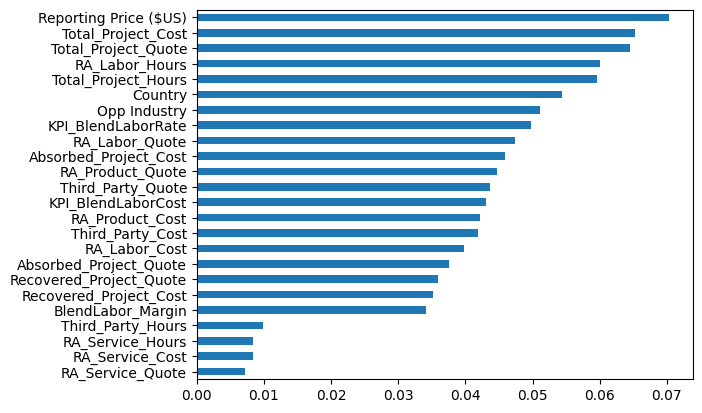

In [204]:
s1 = pd.Series(rf_clf2.feature_importances_, index = x.columns)
s1.sort_values().plot(kind='barh')

#### AUC ROC Curve -Random Forest

In [205]:
y_pred_proba_rf = rf_clf.predict_proba(x_test)    
y_pred_proba_rf

array([[0.21, 0.79],
       [0.9 , 0.1 ],
       [0.93, 0.07],
       [0.05, 0.95],
       [0.46, 0.54],
       [0.88, 0.12],
       [0.98, 0.02],
       [0.52, 0.48],
       [0.6 , 0.4 ],
       [0.97, 0.03],
       [0.04, 0.96],
       [0.22, 0.78],
       [0.61, 0.39],
       [0.9 , 0.1 ],
       [0.91, 0.09],
       [0.9 , 0.1 ],
       [0.81, 0.19],
       [0.64, 0.36],
       [0.02, 0.98],
       [0.78, 0.22],
       [0.67, 0.33],
       [0.  , 1.  ],
       [1.  , 0.  ],
       [0.5 , 0.5 ],
       [0.85, 0.15],
       [0.99, 0.01],
       [0.9 , 0.1 ],
       [0.7 , 0.3 ],
       [0.56, 0.44],
       [0.78, 0.22],
       [0.76, 0.24],
       [0.72, 0.28],
       [0.6 , 0.4 ],
       [0.35, 0.65],
       [0.1 , 0.9 ],
       [0.76, 0.24],
       [0.25, 0.75],
       [0.9 , 0.1 ],
       [0.86, 0.14],
       [0.65, 0.35],
       [0.57, 0.43],
       [0.86, 0.14],
       [0.  , 1.  ],
       [0.38, 0.62],
       [0.89, 0.11],
       [0.58, 0.42],
       [0.77, 0.23],
       [0.76,

In [206]:
fpr, tpr, thresh = roc_curve(y_test, y_pred_proba_rf[:,1])
thresh

array([ inf, 1.  , 0.99, 0.98, 0.96, 0.95, 0.94, 0.93, 0.91, 0.9 , 0.89,
       0.87, 0.86, 0.85, 0.83, 0.82, 0.79, 0.78, 0.77, 0.76, 0.74, 0.71,
       0.68, 0.66, 0.65, 0.64, 0.62, 0.61, 0.6 , 0.59, 0.58, 0.57, 0.56,
       0.55, 0.54, 0.5 , 0.48, 0.46, 0.44, 0.43, 0.42, 0.41, 0.4 , 0.39,
       0.38, 0.36, 0.35, 0.34, 0.33, 0.32, 0.31, 0.3 , 0.29, 0.28, 0.27,
       0.26, 0.25, 0.24, 0.23, 0.21, 0.2 , 0.19, 0.18, 0.17, 0.16, 0.15,
       0.14, 0.13, 0.12, 0.11, 0.1 , 0.09, 0.08, 0.07, 0.06, 0.05, 0.04,
       0.03, 0.02, 0.01, 0.  ])

Text(0, 0.5, 'True Positive Rate')

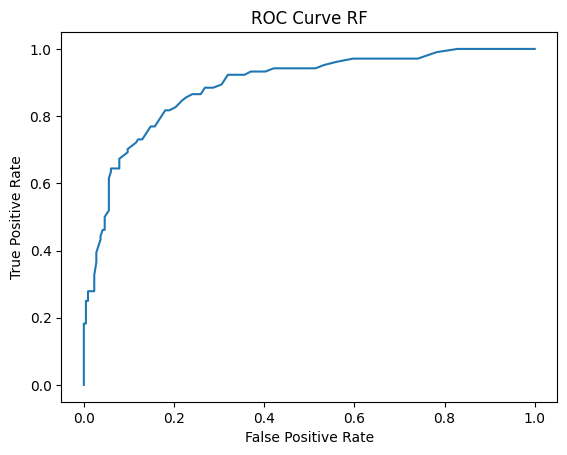

In [207]:
plt.title('ROC Curve RF')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [208]:
auc_score = roc_auc_score(y_test, y_pred_proba_rf[:,1])
auc_score

0.8898682336182335

##### AUC ROC Curve - RF Hyper

In [209]:
y_pred_proba_rfhyp = rf_clf2.predict_proba(x_test)    
y_pred_proba_rfhyp

array([[0.16826943, 0.83173057],
       [0.76819204, 0.23180796],
       [0.82470809, 0.17529191],
       [0.41875853, 0.58124147],
       [0.52822745, 0.47177255],
       [0.79862143, 0.20137857],
       [0.94754388, 0.05245612],
       [0.61390971, 0.38609029],
       [0.66092265, 0.33907735],
       [0.78610483, 0.21389517],
       [0.09677627, 0.90322373],
       [0.26932714, 0.73067286],
       [0.71552982, 0.28447018],
       [0.75714829, 0.24285171],
       [0.73974941, 0.26025059],
       [0.80967135, 0.19032865],
       [0.8045364 , 0.1954636 ],
       [0.69613103, 0.30386897],
       [0.07696689, 0.92303311],
       [0.63255147, 0.36744853],
       [0.6925767 , 0.3074233 ],
       [0.0025    , 0.9975    ],
       [0.93304037, 0.06695963],
       [0.64148982, 0.35851018],
       [0.80469575, 0.19530425],
       [0.78117914, 0.21882086],
       [0.76628877, 0.23371123],
       [0.74535836, 0.25464164],
       [0.58387823, 0.41612177],
       [0.75082784, 0.24917216],
       [0.

In [210]:
fpr, tpr, thresh = roc_curve(y_test, y_pred_proba_rfhyp[:,1])
thresh

array([       inf, 0.9975    , 0.99600855, 0.94579643, 0.92303311,
       0.89857701, 0.88962268, 0.83173057, 0.82626196, 0.79007096,
       0.75120466, 0.50489709, 0.50246715, 0.47414741, 0.47177255,
       0.46304841, 0.45231048, 0.45157874, 0.44807197, 0.44601725,
       0.41612177, 0.40962045, 0.39876283, 0.39866391, 0.39862416,
       0.38960556, 0.38723558, 0.38609029, 0.38113946, 0.37749187,
       0.36669574, 0.36428537, 0.36388517, 0.35851018, 0.35801723,
       0.35552986, 0.34762561, 0.3460776 , 0.3386586 , 0.33811104,
       0.33697068, 0.33483758, 0.33219689, 0.33218752, 0.33124276,
       0.32785698, 0.32747006, 0.32746769, 0.31943682, 0.31693465,
       0.31322645, 0.31284595, 0.31221632, 0.30975039, 0.3074233 ,
       0.30386897, 0.30297284, 0.30255746, 0.30136186, 0.30015697,
       0.29785238, 0.29433469, 0.29374342, 0.29135216, 0.29091513,
       0.28650169, 0.28567829, 0.28447018, 0.28171693, 0.28002851,
       0.27880402, 0.27785632, 0.27742714, 0.27668404, 0.27658

Text(0, 0.5, 'True Positive Rate')

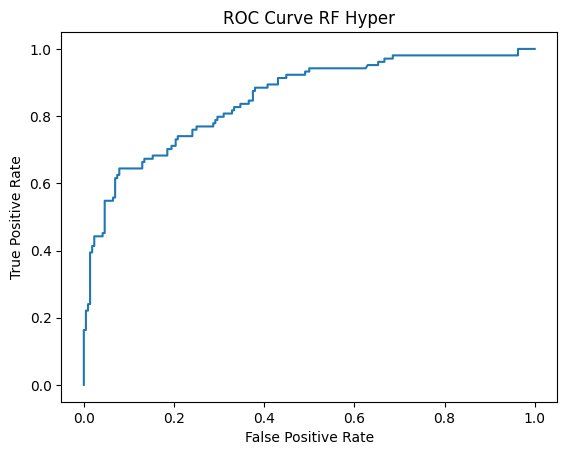

In [211]:
plt.title('ROC Curve RF Hyper')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [212]:
auc_score = roc_auc_score(y_test, y_pred_proba_rfhyp[:,1])
auc_score

0.852096688034188

In [213]:
print("print of x train is >>",len(x_train))
print("print of y train is >>",len(y_train))
print("print of x test is >>", len(x_test))
print("print of y test is >>", len(y_test))

print of x train is >> 1277
print of y train is >> 1277
print of x test is >> 320
print of y test is >> 320


### Bagging Classifier 

##### 1. Using SVM

In [214]:
# bag_clf_svm = BaggingClassifier(base_estimator= SVC(), n_estimators=50, random_state=12, bootstrap=True, oob_score=True)
# bag_clf_svm.fit(x_train, y_train)

In [215]:
print("print of x train is >>",len(x_train))
print("print of y train is >>",len(y_train))
print("print of x test is >>", len(x_test))
print("print of y test is >>", len(y_test))

print of x train is >> 1277
print of y train is >> 1277
print of x test is >> 320
print of y test is >> 320


In [216]:
# evaluate_model('Train Data Evaluation', bag_clf_svm, x_train, y_train)
# evaluate_model('Test Data Evaluation', bag_clf_svm, x_test, y_test)

##### 2. Using KNN

In [217]:
# bag_clf_knn = BaggingClassifier(base_estimator= KNeighborsClassifier(), n_estimators=50, random_state=12, bootstrap=True, oob_score=True)
# bag_clf_knn.fit(x_train, y_train)

In [218]:
# evaluate_model('Train Data Evaluation', bag_clf_knn, x_train, y_train)
# evaluate_model('Test Data Evaluation', bag_clf_knn, x_test, y_test)

## SVM

In [219]:
from sklearn.svm import SVC

In [220]:
svc_model = SVC()
svc_model.fit(x_train, y_train)
evaluate_model('Training Data Evalation',svc_model,x_train,y_train)
evaluate_model('Testing Data Evaluation',svc_model,x_test,y_test)

*************Training Data Evalation**************
confusion matrix 
 [[860   0]
 [399  18]]
tn=860, fp=0, fn=399, tp=18
Accuracy: 0.687548942834769
Classification report:
               precision    recall  f1-score   support

           0       0.68      1.00      0.81       860
           1       1.00      0.04      0.08       417

    accuracy                           0.69      1277
   macro avg       0.84      0.52      0.45      1277
weighted avg       0.79      0.69      0.57      1277

*************Testing Data Evaluation**************
confusion matrix 
 [[215   1]
 [ 98   6]]
tn=215, fp=1, fn=98, tp=6
Accuracy: 0.690625
Classification report:
               precision    recall  f1-score   support

           0       0.69      1.00      0.81       216
           1       0.86      0.06      0.11       104

    accuracy                           0.69       320
   macro avg       0.77      0.53      0.46       320
weighted avg       0.74      0.69      0.58       320



array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

#### SVM with SMOTE

In [221]:
svc_model1 = SVC()
svc_model1.fit(x_train_sm1, y_train_sm1)

SVC()

In [222]:
evaluate_model('Training Data Evalation',svc_model1,x_train_sm1,y_train_sm1)
evaluate_model('Testing Data Evaluation',svc_model1,x_test,y_test)

*************Training Data Evalation**************
confusion matrix 
 [[825  35]
 [666 151]]
tn=825, fp=35, fn=666, tp=151
Accuracy: 0.5819916517590936
Classification report:
               precision    recall  f1-score   support

           0       0.55      0.96      0.70       860
           1       0.81      0.18      0.30       817

    accuracy                           0.58      1677
   macro avg       0.68      0.57      0.50      1677
weighted avg       0.68      0.58      0.51      1677

*************Testing Data Evaluation**************
confusion matrix 
 [[207   9]
 [ 75  29]]
tn=207, fp=9, fn=75, tp=29
Accuracy: 0.7375
Classification report:
               precision    recall  f1-score   support

           0       0.73      0.96      0.83       216
           1       0.76      0.28      0.41       104

    accuracy                           0.74       320
   macro avg       0.75      0.62      0.62       320
weighted avg       0.74      0.74      0.69       320



array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

### SVM - Hyperparameter Tuning

In [223]:
# svm_clf =SVC()
# hyperparamters = {'C': np.arange(0,10,0.1),
#       'kernel':['linear','poly','rbf','sigmoid'],
#       'gamma': np.arange(0,10,0.1)}

In [224]:
# gscv_svm = RandomizedSearchCV(svm_clf, hyperparamters, cv=3)

In [ ]:
# gscv_svm.fit(x_train, y_train)

In [ ]:
# gscv_svm.best_params_

In [ ]:
# gscv_svm.best_estimator_

In [ ]:
# svm_model1 = gscv_svm.best_estimator_
# svm_model1.fit(x_train, y_train)

In [ ]:
# evaluate_model('Training Data Evalation',svm_model1,x_train,y_train)
# evaluate_model('Testing Data Evaluation',svm_model1,x_test,y_test)

## Naive Bayes Classifier

#### Gaussian NB

In [226]:
from sklearn.naive_bayes import GaussianNB

In [227]:
gnb_model = GaussianNB()
gnb_model.fit(x_train,y_train)

GaussianNB()

In [228]:
evaluate_model('Training Data Evalation',gnb_model,x_train,y_train)
evaluate_model('Testing Data Evaluation',gnb_model,x_test,y_test)

*************Training Data Evalation**************
confusion matrix 
 [[822  38]
 [348  69]]
tn=822, fp=38, fn=348, tp=69
Accuracy: 0.6977290524667189
Classification report:
               precision    recall  f1-score   support

           0       0.70      0.96      0.81       860
           1       0.64      0.17      0.26       417

    accuracy                           0.70      1277
   macro avg       0.67      0.56      0.54      1277
weighted avg       0.68      0.70      0.63      1277

*************Testing Data Evaluation**************
confusion matrix 
 [[206  10]
 [ 81  23]]
tn=206, fp=10, fn=81, tp=23
Accuracy: 0.715625
Classification report:
               precision    recall  f1-score   support

           0       0.72      0.95      0.82       216
           1       0.70      0.22      0.34       104

    accuracy                           0.72       320
   macro avg       0.71      0.59      0.58       320
weighted avg       0.71      0.72      0.66       320



array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

### Gaussian NB with Oversampling

In [229]:
gnb_model1 = GaussianNB()
gnb_model1.fit(x_train_ros,y_train_ros)
evaluate_model('Training Data Evalation',gnb_model1,x_train_ros,y_train_ros)
evaluate_model('Testing Data Evaluation',gnb_model1,x_test,y_test)

*************Training Data Evalation**************
confusion matrix 
 [[821  39]
 [576 112]]
tn=821, fp=39, fn=576, tp=112
Accuracy: 0.6027131782945736
Classification report:
               precision    recall  f1-score   support

           0       0.59      0.95      0.73       860
           1       0.74      0.16      0.27       688

    accuracy                           0.60      1548
   macro avg       0.66      0.56      0.50      1548
weighted avg       0.66      0.60      0.52      1548

*************Testing Data Evaluation**************
confusion matrix 
 [[205  11]
 [ 80  24]]
tn=205, fp=11, fn=80, tp=24
Accuracy: 0.715625
Classification report:
               precision    recall  f1-score   support

           0       0.72      0.95      0.82       216
           1       0.69      0.23      0.35       104

    accuracy                           0.72       320
   macro avg       0.70      0.59      0.58       320
weighted avg       0.71      0.72      0.66       320



array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [230]:
print("print of x train is >>",len(x_train))
print("print of y train is >>",len(y_train))
print("print of x test is >>", len(x_test))
print("print of y test is >>", len(y_test))

print of x train is >> 1277
print of y train is >> 1277
print of x test is >> 320
print of y test is >> 320


#### Gaussian NB with SMOTE

In [231]:
gnb_model2 = GaussianNB()
gnb_model2.fit(x_train_sm1,y_train_sm1)
evaluate_model('Training Data Evalation',gnb_model2,x_train_sm1,y_train_sm1)
evaluate_model('Testing Data Evaluation',gnb_model2,x_test,y_test)

*************Training Data Evalation**************
confusion matrix 
 [[821  39]
 [685 132]]
tn=821, fp=39, fn=685, tp=132
Accuracy: 0.5682766845557543
Classification report:
               precision    recall  f1-score   support

           0       0.55      0.95      0.69       860
           1       0.77      0.16      0.27       817

    accuracy                           0.57      1677
   macro avg       0.66      0.56      0.48      1677
weighted avg       0.66      0.57      0.49      1677

*************Testing Data Evaluation**************
confusion matrix 
 [[205  11]
 [ 80  24]]
tn=205, fp=11, fn=80, tp=24
Accuracy: 0.715625
Classification report:
               precision    recall  f1-score   support

           0       0.72      0.95      0.82       216
           1       0.69      0.23      0.35       104

    accuracy                           0.72       320
   macro avg       0.70      0.59      0.58       320
weighted avg       0.71      0.72      0.66       320



array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [232]:
print("print of x train is >>",len(x_train))
print("print of y train is >>",len(y_train))
print("print of x test is >>", len(x_test))
print("print of y test is >>", len(y_test))

print of x train is >> 1277
print of y train is >> 1277
print of x test is >> 320
print of y test is >> 320


### Hyperparameter Tuning

In [233]:
#hyperparameters = {'var_smoothing': [1e-11, 1e-10, 1e-9]}
hyperparameters = [{'var_smoothing': np.logspace(0,-9, num=100),
                'priors': [None, [0.1,0.9], [0.2,0.8], [0.3,0.7], [0.4,0.6], [0.5,0.5], [0.6,0.4], [0.7,0.3], [0.8,0.2], [0.9,0.1]]}]

In [234]:
gnb_model3 = GridSearchCV(estimator=GaussianNB(), param_grid=hyperparameters, cv=5,verbose=0)

In [235]:
gnb_model3.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid=[{'priors': [None, [0.1, 0.9], [0.2, 0.8], [0.3, 0.7],
                                     [0.4, 0.6], [0.5, 0.5], [0.6, 0.4],
                                     [0.7, 0.3], [0.8, 0.2], [0.9, 0.1]],
                          'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1....
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])}])

In [236]:
gnb_model3.best_estimator_

GaussianNB(var_smoothing=1.519911082952933e-09)

In [237]:
gnb_model3.best_score_

0.6969424019607844

In [238]:
gnb_model3.best_params_

{'priors': None, 'var_smoothing': 1.519911082952933e-09}

In [239]:
gnb_model4= gnb_model3.best_estimator_
gnb_model4.fit(x_train, y_train)

GaussianNB(var_smoothing=1.519911082952933e-09)

In [240]:
evaluate_model('Training Data Evaluation',gnb_model4,x_train,y_train)
evaluate_model('Testing Data Evaluation',gnb_model4,x_test,y_test)

*************Training Data Evaluation*************
confusion matrix 
 [[823  37]
 [349  68]]
tn=823, fp=37, fn=349, tp=68
Accuracy: 0.6977290524667189
Classification report:
               precision    recall  f1-score   support

           0       0.70      0.96      0.81       860
           1       0.65      0.16      0.26       417

    accuracy                           0.70      1277
   macro avg       0.67      0.56      0.54      1277
weighted avg       0.68      0.70      0.63      1277

*************Testing Data Evaluation**************
confusion matrix 
 [[206  10]
 [ 80  24]]
tn=206, fp=10, fn=80, tp=24
Accuracy: 0.71875
Classification report:
               precision    recall  f1-score   support

           0       0.72      0.95      0.82       216
           1       0.71      0.23      0.35       104

    accuracy                           0.72       320
   macro avg       0.71      0.59      0.58       320
weighted avg       0.72      0.72      0.67       320



array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

### AUC- ROC Curve

In [241]:
y_pred_proba_gnb = gnb_model.predict_proba(x_test)    
y_pred_proba_gnb

array([[9.99999483e-001, 5.16588471e-007],
       [1.00000000e+000, 3.46621856e-012],
       [1.00000000e+000, 5.67547412e-015],
       [1.00000000e+000, 5.37107549e-015],
       [1.00000000e+000, 4.72802219e-015],
       [1.00000000e+000, 2.89646435e-015],
       [1.00000000e+000, 2.93808263e-015],
       [1.00000000e+000, 3.33879561e-015],
       [1.00000000e+000, 3.19503044e-015],
       [1.00000000e+000, 4.71970479e-015],
       [1.54094351e-025, 1.00000000e+000],
       [9.81473611e-001, 1.85263889e-002],
       [1.00000000e+000, 3.45541353e-015],
       [1.00000000e+000, 3.02500533e-014],
       [1.00000000e+000, 3.68501524e-015],
       [1.00000000e+000, 3.80748858e-015],
       [1.00000000e+000, 3.03838812e-015],
       [1.00000000e+000, 4.22156758e-015],
       [3.55802403e-020, 1.00000000e+000],
       [1.00000000e+000, 4.19801327e-015],
       [1.00000000e+000, 4.61992965e-015],
       [0.00000000e+000, 1.00000000e+000],
       [1.00000000e+000, 3.06399749e-015],
       [1.0

In [242]:
fpr, tpr, thresh = roc_curve(y_test, y_pred_proba_gnb[:,1])
thresh

array([           inf, 1.00000000e+00, 9.99999761e-01, 4.82475958e-01,
       2.38203102e-01, 7.15166100e-04, 4.35468930e-06, 3.32364444e-09,
       7.29035054e-10, 1.96273940e-10, 1.89182547e-12, 9.29838671e-13,
       1.22007905e-13, 1.00894329e-13, 7.39239455e-14, 6.41939035e-14,
       5.40925924e-14, 5.09152032e-14, 2.71783671e-14, 2.35737430e-14,
       1.27922547e-14, 1.15795912e-14, 9.57911036e-15, 8.73224806e-15,
       8.10984835e-15, 7.30700541e-15, 7.12885253e-15, 6.53585895e-15,
       5.67547412e-15, 5.43369776e-15, 5.37107549e-15, 4.98662936e-15,
       4.76647113e-15, 4.76263169e-15, 4.74313815e-15, 4.68222279e-15,
       4.62862160e-15, 4.61992965e-15, 4.61131983e-15, 4.60959228e-15,
       4.58619219e-15, 4.58109155e-15, 4.50178612e-15, 4.49995043e-15,
       4.48085306e-15, 4.47851184e-15, 4.39351534e-15, 4.39262013e-15,
       4.37838525e-15, 4.36951332e-15, 4.31904939e-15, 4.31543670e-15,
       4.31071091e-15, 4.29939692e-15, 4.27872287e-15, 4.20506072e-15,
      

Text(0, 0.5, 'True Positive Rate')

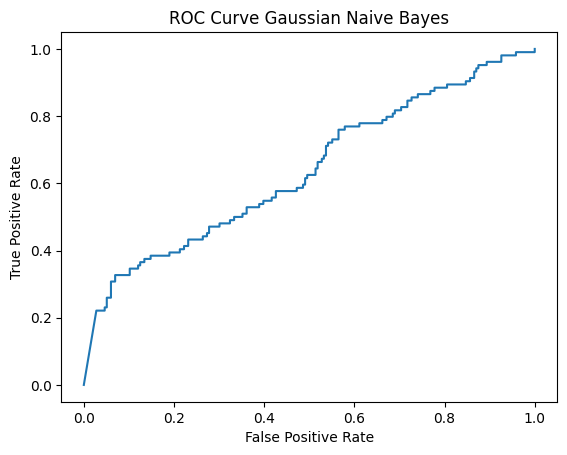

In [243]:
plt.title('ROC Curve Gaussian Naive Bayes')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')


In [244]:
auc_score = roc_auc_score(y_test, y_pred_proba_gnb[:,1])
auc_score

0.6379095441595442

##### AUC-Roc Hyperparameter

In [245]:
y_pred_proba_gnbhyp = gnb_model4.predict_proba(x_test)    
y_pred_proba_gnbhyp

array([[9.99999330e-001, 6.69529409e-007],
       [1.00000000e+000, 1.26454962e-012],
       [1.00000000e+000, 7.46806190e-015],
       [1.00000000e+000, 7.08405438e-015],
       [1.00000000e+000, 6.23142423e-015],
       [1.00000000e+000, 3.81650582e-015],
       [1.00000000e+000, 3.88682854e-015],
       [1.00000000e+000, 4.40095366e-015],
       [1.00000000e+000, 4.20821316e-015],
       [1.00000000e+000, 6.19367395e-015],
       [7.43035603e-022, 1.00000000e+000],
       [9.75900448e-001, 2.40995521e-002],
       [1.00000000e+000, 4.56062545e-015],
       [1.00000000e+000, 3.98016720e-014],
       [1.00000000e+000, 4.87994118e-015],
       [1.00000000e+000, 5.01802178e-015],
       [1.00000000e+000, 4.00067175e-015],
       [1.00000000e+000, 5.55490154e-015],
       [2.69993232e-020, 1.00000000e+000],
       [1.00000000e+000, 5.52612479e-015],
       [1.00000000e+000, 6.07258017e-015],
       [0.00000000e+000, 1.00000000e+000],
       [1.00000000e+000, 4.03594048e-015],
       [1.0

In [246]:
fpr, tpr, thresh = roc_curve(y_test, y_pred_proba_gnbhyp[:,1])
thresh

array([           inf, 1.00000000e+00, 9.99999954e-01, 9.99999933e-01,
       9.99999819e-01, 5.52155923e-01, 2.91700930e-01, 1.64637063e-06,
       1.07132022e-06, 1.62313201e-07, 1.44375443e-07, 4.33046469e-09,
       9.57201843e-10, 2.57898736e-10, 2.49301478e-12, 1.35680224e-12,
       1.26454962e-12, 1.21877679e-12, 1.39867542e-13, 1.32847454e-13,
       7.13208518e-14, 4.78444077e-14, 3.56666982e-14, 3.11043438e-14,
       1.68388320e-14, 1.52573906e-14, 1.31637298e-14, 1.15100283e-14,
       9.44265587e-15, 9.37616067e-15, 8.60777714e-15, 7.46806190e-15,
       7.43672540e-15, 7.14440289e-15, 7.08405438e-15, 6.56871645e-15,
       6.27770527e-15, 6.27264852e-15, 6.24328736e-15, 6.16122541e-15,
       6.09543049e-15, 6.07666613e-15, 6.07456813e-15, 6.07258017e-15,
       6.03962553e-15, 6.03126676e-15, 5.93577596e-15, 5.92767948e-15,
       5.92049426e-15, 5.91102777e-15, 5.91041099e-15, 5.90890218e-15,
       5.80546165e-15, 5.78527508e-15, 5.77596716e-15, 5.75929735e-15,
      

Text(0, 0.5, 'True Positive Rate')

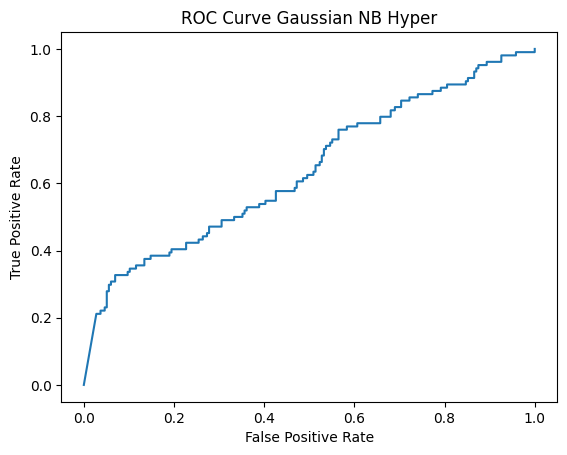

In [247]:
plt.title('ROC Curve Gaussian NB Hyper')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [248]:
auc_score = roc_auc_score(y_test, y_pred_proba_gnbhyp[:,1])
auc_score

0.6391114672364673

In [249]:
print("print of x train is >>",len(x_train))
print("print of y train is >>",len(y_train))
print("print of x test is >>", len(x_test))
print("print of y test is >>", len(y_test))

print of x train is >> 1277
print of y train is >> 1277
print of x test is >> 320
print of y test is >> 320


## ADABOOST

In [250]:
from sklearn.ensemble import AdaBoostClassifier

In [251]:
adb_clf = AdaBoostClassifier(learning_rate=0.5, random_state=20)
adb_clf.fit(x_train, y_train)

AdaBoostClassifier(learning_rate=0.5, random_state=20)

In [252]:
evaluate_model('Training Data Evalation',adb_clf,x_train,y_train)
evaluate_model('Testing Data Evaluation',adb_clf,x_test,y_test)

*************Training Data Evalation**************
confusion matrix 
 [[850  10]
 [285 132]]
tn=850, fp=10, fn=285, tp=132
Accuracy: 0.7689898198903681
Classification report:
               precision    recall  f1-score   support

           0       0.75      0.99      0.85       860
           1       0.93      0.32      0.47       417

    accuracy                           0.77      1277
   macro avg       0.84      0.65      0.66      1277
weighted avg       0.81      0.77      0.73      1277

*************Testing Data Evaluation**************
confusion matrix 
 [[211   5]
 [ 64  40]]
tn=211, fp=5, fn=64, tp=40
Accuracy: 0.784375
Classification report:
               precision    recall  f1-score   support

           0       0.77      0.98      0.86       216
           1       0.89      0.38      0.54       104

    accuracy                           0.78       320
   macro avg       0.83      0.68      0.70       320
weighted avg       0.81      0.78      0.75       320



array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

#### ADABOOST with Oversampling

In [253]:
adb_clf1 = AdaBoostClassifier(learning_rate=0.5, random_state=20)
adb_clf1.fit(x_train_ros, y_train_ros)
evaluate_model('Training Data Evalation',adb_clf1,x_train_ros,y_train_ros)
evaluate_model('Testing Data Evaluation',adb_clf1,x_test,y_test)

*************Training Data Evalation**************
confusion matrix 
 [[769  91]
 [299 389]]
tn=769, fp=91, fn=299, tp=389
Accuracy: 0.748062015503876
Classification report:
               precision    recall  f1-score   support

           0       0.72      0.89      0.80       860
           1       0.81      0.57      0.67       688

    accuracy                           0.75      1548
   macro avg       0.77      0.73      0.73      1548
weighted avg       0.76      0.75      0.74      1548

*************Testing Data Evaluation**************
confusion matrix 
 [[184  32]
 [ 41  63]]
tn=184, fp=32, fn=41, tp=63
Accuracy: 0.771875
Classification report:
               precision    recall  f1-score   support

           0       0.82      0.85      0.83       216
           1       0.66      0.61      0.63       104

    accuracy                           0.77       320
   macro avg       0.74      0.73      0.73       320
weighted avg       0.77      0.77      0.77       320



array([1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,

In [254]:
print("print of x train is >>",len(x_train))
print("print of y train is >>",len(y_train))
print("print of x test is >>", len(x_test))
print("print of y test is >>", len(y_test))

print of x train is >> 1277
print of y train is >> 1277
print of x test is >> 320
print of y test is >> 320


### AdaBoost with SMOTE

In [255]:
adb_clf2 = AdaBoostClassifier()
adb_clf2.fit(x_train_sm1,y_train_sm1)
evaluate_model('Training Data Evalation',adb_clf2,x_train_sm1,y_train_sm1)
evaluate_model('Testing Data Evaluation',adb_clf2,x_test,y_test)

*************Training Data Evalation**************
confusion matrix 
 [[702 158]
 [216 601]]
tn=702, fp=158, fn=216, tp=601
Accuracy: 0.7769827072152653
Classification report:
               precision    recall  f1-score   support

           0       0.76      0.82      0.79       860
           1       0.79      0.74      0.76       817

    accuracy                           0.78      1677
   macro avg       0.78      0.78      0.78      1677
weighted avg       0.78      0.78      0.78      1677

*************Testing Data Evaluation**************
confusion matrix 
 [[157  59]
 [ 37  67]]
tn=157, fp=59, fn=37, tp=67
Accuracy: 0.7
Classification report:
               precision    recall  f1-score   support

           0       0.81      0.73      0.77       216
           1       0.53      0.64      0.58       104

    accuracy                           0.70       320
   macro avg       0.67      0.69      0.67       320
weighted avg       0.72      0.70      0.71       320



array([1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,

In [256]:
print("print of x train is >>",len(x_train))
print("print of y train is >>",len(y_train))
print("print of x test is >>", len(x_test))
print("print of y test is >>", len(y_test))

print of x train is >> 1277
print of y train is >> 1277
print of x test is >> 320
print of y test is >> 320


#### Adaboost with Hyperparameter Tuning

In [257]:
adb_clf3 = AdaBoostClassifier(learning_rate=0.5, random_state=20)
hyp_grid = {'n_estimators': np.arange(10,50),
           'learning_rate':np.arange(0.01, 2, 0.01)}

rscv_adb_clf = RandomizedSearchCV(adb_clf3, hyp_grid, cv=7, random_state= 10)
rscv_adb_clf.fit(x_train,y_train)
rscv_adb_clf.best_estimator_

AdaBoostClassifier(learning_rate=1.21, n_estimators=39, random_state=20)

In [258]:
rscv_adb_clf.best_params_

{'n_estimators': 39, 'learning_rate': 1.21}

In [259]:
adb_clf_hyp = AdaBoostClassifier(learning_rate=1.21, n_estimators=39, random_state=20)
adb_clf_hyp.fit(x_train, y_train)
evaluate_model('Training Data Evalation',adb_clf_hyp,x_train,y_train)
evaluate_model('Testing Data Evaluation',adb_clf_hyp,x_test,y_test)

*************Training Data Evalation**************
confusion matrix 
 [[828  32]
 [229 188]]
tn=828, fp=32, fn=229, tp=188
Accuracy: 0.7956147220046985
Classification report:
               precision    recall  f1-score   support

           0       0.78      0.96      0.86       860
           1       0.85      0.45      0.59       417

    accuracy                           0.80      1277
   macro avg       0.82      0.71      0.73      1277
weighted avg       0.81      0.80      0.77      1277

*************Testing Data Evaluation**************
confusion matrix 
 [[194  22]
 [ 56  48]]
tn=194, fp=22, fn=56, tp=48
Accuracy: 0.75625
Classification report:
               precision    recall  f1-score   support

           0       0.78      0.90      0.83       216
           1       0.69      0.46      0.55       104

    accuracy                           0.76       320
   macro avg       0.73      0.68      0.69       320
weighted avg       0.75      0.76      0.74       320



array([1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

##### AUC ROC Curve

In [260]:
y_pred_proba_adb = adb_clf.predict_proba(x_test)    
y_pred_proba_adb

array([[0.49767417, 0.50232583],
       [0.507948  , 0.492052  ],
       [0.50645748, 0.49354252],
       [0.50553278, 0.49446722],
       [0.50026812, 0.49973188],
       [0.51615643, 0.48384357],
       [0.52086398, 0.47913602],
       [0.50219149, 0.49780851],
       [0.50088929, 0.49911071],
       [0.51616974, 0.48383026],
       [0.33858732, 0.66141268],
       [0.48777559, 0.51222441],
       [0.51316045, 0.48683955],
       [0.50397743, 0.49602257],
       [0.51577341, 0.48422659],
       [0.51479867, 0.48520133],
       [0.51494707, 0.48505293],
       [0.50031637, 0.49968363],
       [0.47788427, 0.52211573],
       [0.50208649, 0.49791351],
       [0.51249373, 0.48750627],
       [0.35762893, 0.64237107],
       [0.51615643, 0.48384357],
       [0.49009104, 0.50990896],
       [0.51409396, 0.48590604],
       [0.51103524, 0.48896476],
       [0.51115101, 0.48884899],
       [0.51463254, 0.48536746],
       [0.50534252, 0.49465748],
       [0.51191712, 0.48808288],
       [0.

In [261]:
fpr, tpr, thresh = roc_curve(y_test, y_pred_proba_adb[:,1])
thresh

array([       inf, 0.68263539, 0.67029798, 0.66905468, 0.66531568,
       0.52359747, 0.52211573, 0.51991806, 0.51484976, 0.50673145,
       0.50624896, 0.50442001, 0.50358613, 0.50232583, 0.50171426,
       0.5011924 , 0.49973188, 0.49947203, 0.49926918, 0.49911071,
       0.49905308, 0.49902297, 0.49877866, 0.49832024, 0.49808713,
       0.49791351, 0.49780851, 0.49753278, 0.49642615, 0.49613373,
       0.49608182, 0.49602257, 0.49582894, 0.49572236, 0.49568916,
       0.49566068, 0.49565259, 0.49557477, 0.49552363, 0.49519157,
       0.49516784, 0.49511594, 0.49487112, 0.49475144, 0.49465748,
       0.49453212, 0.49422811, 0.49398455, 0.4939732 , 0.49369991,
       0.49366919, 0.49311794, 0.49308348, 0.49304722, 0.49299751,
       0.49282273, 0.49277641, 0.49272059, 0.49254417, 0.49251964,
       0.49251705, 0.49244782, 0.49221754, 0.492052  , 0.4919853 ,
       0.49146573, 0.49144624, 0.49122106, 0.49114151, 0.49088742,
       0.49079496, 0.49069242, 0.49060883, 0.49057327, 0.49043

Text(0, 0.5, 'True Positive Rate')

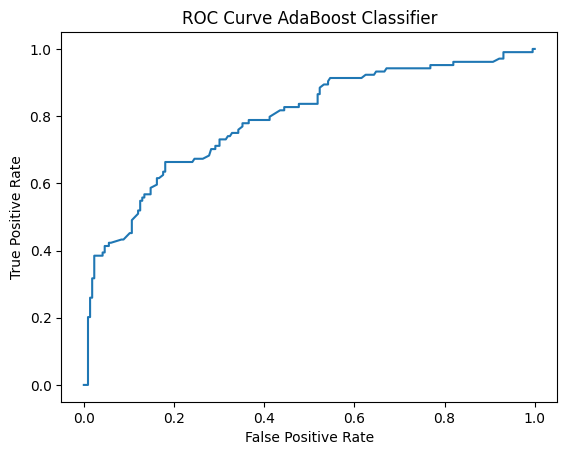

In [262]:
plt.title('ROC Curve AdaBoost Classifier')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [263]:
auc_score = roc_auc_score(y_test, y_pred_proba_adb[:,1])
auc_score

0.7905092592592593

##### AUC-ROC Curve -Hyper

In [264]:
y_pred_proba_adbhyp = adb_clf_hyp.predict_proba(x_test)    
y_pred_proba_adbhyp

array([[0.49539081, 0.50460919],
       [0.50521166, 0.49478834],
       [0.50220306, 0.49779694],
       [0.500978  , 0.499022  ],
       [0.50131516, 0.49868484],
       [0.51254288, 0.48745712],
       [0.51039245, 0.48960755],
       [0.50079812, 0.49920188],
       [0.49897996, 0.50102004],
       [0.50270436, 0.49729564],
       [0.28971893, 0.71028107],
       [0.49655394, 0.50344606],
       [0.51250191, 0.48749809],
       [0.49836132, 0.50163868],
       [0.51324034, 0.48675966],
       [0.50623976, 0.49376024],
       [0.50977206, 0.49022794],
       [0.49746705, 0.50253295],
       [0.48818046, 0.51181954],
       [0.49746705, 0.50253295],
       [0.51217068, 0.48782932],
       [0.29265771, 0.70734229],
       [0.51254288, 0.48745712],
       [0.4842913 , 0.5157087 ],
       [0.51395202, 0.48604798],
       [0.50713119, 0.49286881],
       [0.50389341, 0.49610659],
       [0.5141347 , 0.4858653 ],
       [0.50132387, 0.49867613],
       [0.50855056, 0.49144944],
       [0.

In [265]:
fpr, tpr, thresh = roc_curve(y_test, y_pred_proba_adbhyp[:,1])
thresh

array([       inf, 0.72273413, 0.72168822, 0.71417838, 0.71266948,
       0.70858969, 0.70734229, 0.51434599, 0.51181954, 0.51043338,
       0.5099183 , 0.5091203 , 0.5080729 , 0.50580478, 0.50523439,
       0.50460919, 0.50412061, 0.50304965, 0.50300512, 0.50281764,
       0.50274695, 0.50269313, 0.50253295, 0.50244307, 0.50229901,
       0.50163868, 0.50142085, 0.50125143, 0.50111397, 0.50102004,
       0.50038984, 0.50023294, 0.50017524, 0.49945165, 0.49944894,
       0.49927925, 0.49920188, 0.49918579, 0.499022  , 0.49884582,
       0.49877689, 0.49868484, 0.49867613, 0.49859876, 0.49850671,
       0.49846921, 0.49807889, 0.49800243, 0.49779694, 0.49766436,
       0.4971545 , 0.49711116, 0.4970451 , 0.49678804, 0.49669181,
       0.49663534, 0.49643143, 0.49624666, 0.49614887, 0.49614844,
       0.49610659, 0.49603225, 0.4959756 , 0.49578285, 0.49568209,
       0.49563361, 0.49554579, 0.49551241, 0.49545139, 0.49543744,
       0.49543504, 0.49523422, 0.49516684, 0.49509791, 0.49505

Text(0, 0.5, 'True Positive Rate')

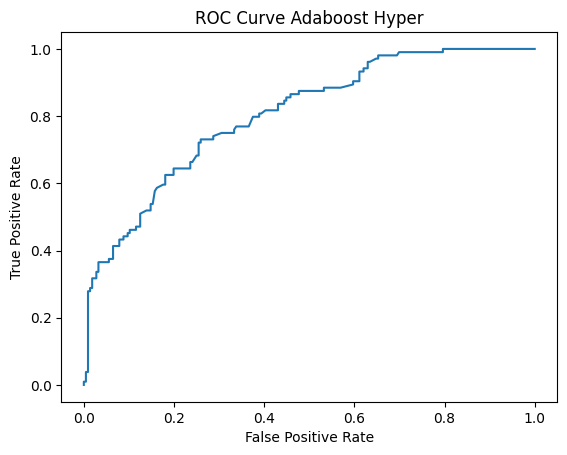

In [266]:
plt.title('ROC Curve Adaboost Hyper')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [267]:
auc_score = roc_auc_score(y_test, y_pred_proba_adbhyp[:,1])
auc_score

0.8033297720797721

In [268]:
print("print of x train is >>",len(x_train))
print("print of y train is >>",len(y_train))
print("print of x test is >>", len(x_test))
print("print of y test is >>", len(y_test))

print of x train is >> 1277
print of y train is >> 1277
print of x test is >> 320
print of y test is >> 320


## XGBoost

In [269]:
xgb_clf = XGBClassifier(learning_rate=0.1, n_estimators=100, random_state=20)

In [270]:
xgb_clf.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=20, ...)

In [271]:
evaluate_model('Training Data Evalation',xgb_clf,x_train,y_train)
evaluate_model('Testing Data Evaluation',xgb_clf,x_test,y_test)

*************Training Data Evalation**************
confusion matrix 
 [[859   1]
 [ 19 398]]
tn=859, fp=1, fn=19, tp=398
Accuracy: 0.9843382928739233
Classification report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       860
           1       1.00      0.95      0.98       417

    accuracy                           0.98      1277
   macro avg       0.99      0.98      0.98      1277
weighted avg       0.98      0.98      0.98      1277

*************Testing Data Evaluation**************
confusion matrix 
 [[197  19]
 [ 30  74]]
tn=197, fp=19, fn=30, tp=74
Accuracy: 0.846875
Classification report:
               precision    recall  f1-score   support

           0       0.87      0.91      0.89       216
           1       0.80      0.71      0.75       104

    accuracy                           0.85       320
   macro avg       0.83      0.81      0.82       320
weighted avg       0.84      0.85      0.84       320



array([1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,

In [272]:
print("print of x train is >>",len(x_train))
print("print of y train is >>",len(y_train))
print("print of x test is >>", len(x_test))
print("print of y test is >>", len(y_test))

print of x train is >> 1277
print of y train is >> 1277
print of x test is >> 320
print of y test is >> 320


#### XGBoost-Oversampling

In [273]:
xgb_clf1 = XGBClassifier(learning_rate=0.1, n_estimators=100, random_state=20)
xgb_clf1.fit(x_train_ros, y_train_ros)
evaluate_model('Training Data Evalation',xgb_clf1,x_train_ros,y_train_ros)
evaluate_model('Testing Data Evaluation',xgb_clf1,x_test,y_test)

*************Training Data Evalation**************
confusion matrix 
 [[857   3]
 [ 17 671]]
tn=857, fp=3, fn=17, tp=671
Accuracy: 0.9870801033591732
Classification report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       860
           1       1.00      0.98      0.99       688

    accuracy                           0.99      1548
   macro avg       0.99      0.99      0.99      1548
weighted avg       0.99      0.99      0.99      1548

*************Testing Data Evaluation**************
confusion matrix 
 [[194  22]
 [ 30  74]]
tn=194, fp=22, fn=30, tp=74
Accuracy: 0.8375
Classification report:
               precision    recall  f1-score   support

           0       0.87      0.90      0.88       216
           1       0.77      0.71      0.74       104

    accuracy                           0.84       320
   macro avg       0.82      0.80      0.81       320
weighted avg       0.84      0.84      0.84       320



array([1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,

In [274]:
print("print of x train is >>",len(x_train))
print("print of y train is >>",len(y_train))
print("print of x test is >>", len(x_test))
print("print of y test is >>", len(y_test))

print of x train is >> 1277
print of y train is >> 1277
print of x test is >> 320
print of y test is >> 320


### XGBoost SMOTE

In [275]:
xgb_clf_sm = XGBClassifier(random_state=20)
xgb_clf_sm.fit(x_train_sm1, y_train_sm1)
evaluate_model('Training Data Evalation',xgb_clf_sm,x_train_sm1,y_train_sm1)
evaluate_model('Testing Data Evaluation',xgb_clf_sm,x_test,y_test)

*************Training Data Evalation**************
confusion matrix 
 [[860   0]
 [  0 817]]
tn=860, fp=0, fn=0, tp=817
Accuracy: 1.0
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       860
           1       1.00      1.00      1.00       817

    accuracy                           1.00      1677
   macro avg       1.00      1.00      1.00      1677
weighted avg       1.00      1.00      1.00      1677

*************Testing Data Evaluation**************
confusion matrix 
 [[191  25]
 [ 25  79]]
tn=191, fp=25, fn=25, tp=79
Accuracy: 0.84375
Classification report:
               precision    recall  f1-score   support

           0       0.88      0.88      0.88       216
           1       0.76      0.76      0.76       104

    accuracy                           0.84       320
   macro avg       0.82      0.82      0.82       320
weighted avg       0.84      0.84      0.84       320



array([1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,

In [276]:
print("print of x train is >>",len(x_train))
print("print of y train is >>",len(y_train))
print("print of x test is >>", len(x_test))
print("print of y test is >>", len(y_test))

print of x train is >> 1277
print of y train is >> 1277
print of x test is >> 320
print of y test is >> 320


### XGBoost-Hyperparameters

In [277]:
hyperparameters = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

In [278]:
xgb_model = XGBClassifier(random_state=42)
grid_search = GridSearchCV(estimator=xgb_model, param_grid=hyperparameters, cv=5, n_jobs=-1)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 0.9, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5], 'n_estimators': [50, 100, 200],
                         'subsample': [0.8, 0.9, 1.0]})

In [279]:
grid_search.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [280]:
grid_search.best_score_

0.8402542892156862

In [281]:
grid_search.best_params_

{'colsample_bytree': 0.9,
 'learning_rate': 0.1,
 'max_depth': 5,
 'n_estimators': 200,
 'subsample': 0.8}

In [282]:
xgb_clf_hyp = XGBClassifier(colsample_bytree= 0.9,learning_rate=0.1,max_depth=5,n_estimators=200,subsample=0.8)
xgb_clf_hyp.fit(x_train, y_train)
evaluate_model('Training Data Evalation',xgb_clf_hyp,x_train,y_train)
evaluate_model('Testing Data Evaluation',xgb_clf_hyp,x_test,y_test)

*************Training Data Evalation**************
confusion matrix 
 [[860   0]
 [  5 412]]
tn=860, fp=0, fn=5, tp=412
Accuracy: 0.9960845732184808
Classification report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       860
           1       1.00      0.99      0.99       417

    accuracy                           1.00      1277
   macro avg       1.00      0.99      1.00      1277
weighted avg       1.00      1.00      1.00      1277

*************Testing Data Evaluation**************
confusion matrix 
 [[200  16]
 [ 31  73]]
tn=200, fp=16, fn=31, tp=73
Accuracy: 0.853125
Classification report:
               precision    recall  f1-score   support

           0       0.87      0.93      0.89       216
           1       0.82      0.70      0.76       104

    accuracy                           0.85       320
   macro avg       0.84      0.81      0.83       320
weighted avg       0.85      0.85      0.85       320



array([1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,

##### AUC-ROC Curve

In [283]:
y_pred_proba_xgb = xgb_clf.predict_proba(x_test)    
y_pred_proba_xgb

array([[0.22152615, 0.77847385],
       [0.929703  , 0.07029701],
       [0.9429922 , 0.05700778],
       [0.18927401, 0.810726  ],
       [0.49688566, 0.50311434],
       [0.920216  , 0.07978399],
       [0.9563821 , 0.04361791],
       [0.48973548, 0.5102645 ],
       [0.50120705, 0.49879295],
       [0.9530163 , 0.04698372],
       [0.03253549, 0.9674645 ],
       [0.14899933, 0.85100067],
       [0.9407444 , 0.05925557],
       [0.84907246, 0.15092754],
       [0.827145  , 0.172855  ],
       [0.9164885 , 0.08351147],
       [0.879728  , 0.120272  ],
       [0.8874066 , 0.11259342],
       [0.06904739, 0.9309526 ],
       [0.76827884, 0.23172113],
       [0.71802956, 0.28197044],
       [0.01274908, 0.9872509 ],
       [0.9780089 , 0.02199106],
       [0.27286673, 0.7271333 ],
       [0.97102433, 0.02897565],
       [0.9301585 , 0.06984152],
       [0.91036916, 0.08963086],
       [0.97110254, 0.02889744],
       [0.36422926, 0.63577074],
       [0.8989366 , 0.10106339],
       [0.

In [284]:
fpr, tpr, thresh = roc_curve(y_test, y_pred_proba_xgb[:,1])
thresh

array([       inf, 0.99091923, 0.9387994 , 0.9309526 , 0.92906535,
       0.921821  , 0.91303694, 0.91104686, 0.8722726 , 0.8685894 ,
       0.80901325, 0.8020553 , 0.77847385, 0.762488  , 0.74608403,
       0.74443847, 0.7410329 , 0.73327816, 0.7256216 , 0.7179647 ,
       0.7049448 , 0.6819687 , 0.6595779 , 0.6408822 , 0.6235769 ,
       0.6203073 , 0.5399035 , 0.52822006, 0.5102645 , 0.49879295,
       0.4749545 , 0.45518064, 0.44967785, 0.44322503, 0.4409728 ,
       0.4280564 , 0.41588175, 0.4104047 , 0.37948325, 0.3758803 ,
       0.36308387, 0.35624543, 0.28402475, 0.28197044, 0.27871633,
       0.27538708, 0.26270995, 0.25459307, 0.22800107, 0.22790171,
       0.21118465, 0.20461024, 0.19713339, 0.18575169, 0.17288822,
       0.172855  , 0.1719383 , 0.17080303, 0.17074898, 0.16659842,
       0.15858681, 0.15856546, 0.14941694, 0.14629757, 0.14013265,
       0.13428791, 0.13181725, 0.13053767, 0.12094949, 0.120272  ,
       0.11800504, 0.11712138, 0.11508242, 0.11443215, 0.10825

Text(0, 0.5, 'True Positive Rate')

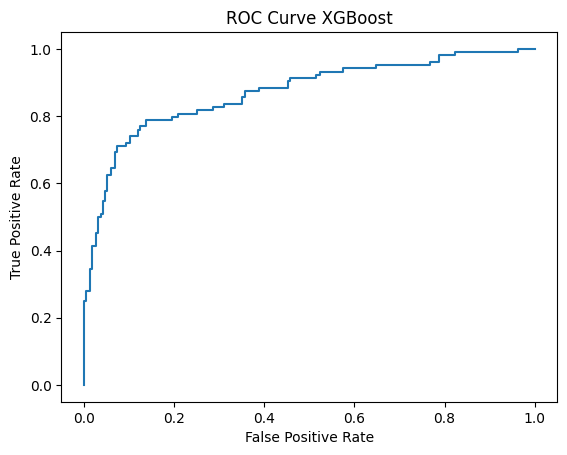

In [285]:
plt.title('ROC Curve XGBoost')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [286]:
auc_score = roc_auc_score(y_test, y_pred_proba_xgb[:,1])
auc_score

0.870414886039886

##### AUC-ROC Hyper

In [287]:
y_pred_proba_xgbhyp = xgb_clf_hyp.predict_proba(x_test)    
y_pred_proba_xgbhyp

array([[0.03810948, 0.9618905 ],
       [0.9292213 , 0.07077871],
       [0.9766064 , 0.02339359],
       [0.11381125, 0.88618875],
       [0.5827396 , 0.4172604 ],
       [0.96306616, 0.03693385],
       [0.9861098 , 0.01389022],
       [0.32922447, 0.67077553],
       [0.6788398 , 0.32116023],
       [0.957766  , 0.04223402],
       [0.0245108 , 0.9754892 ],
       [0.10886288, 0.8911371 ],
       [0.96431947, 0.0356805 ],
       [0.90171146, 0.09828851],
       [0.94766766, 0.05233232],
       [0.9494114 , 0.05058859],
       [0.95829844, 0.04170153],
       [0.7845283 , 0.2154717 ],
       [0.04245567, 0.9575443 ],
       [0.77640307, 0.2235969 ],
       [0.5226109 , 0.47738907],
       [0.0063355 , 0.9936645 ],
       [0.99140704, 0.00859297],
       [0.37288094, 0.62711906],
       [0.9905527 , 0.0094473 ],
       [0.9715025 , 0.02849753],
       [0.8568541 , 0.14314592],
       [0.9778762 , 0.02212384],
       [0.38632572, 0.6136743 ],
       [0.96307176, 0.03692823],
       [0.

In [288]:
fpr, tpr, thresh = roc_curve(y_test, y_pred_proba_xgbhyp[:,1])
thresh

array([       inf, 0.99642426, 0.97838163, 0.977815  , 0.9618905 ,
       0.9575443 , 0.9282444 , 0.92615736, 0.9246493 , 0.923412  ,
       0.9220734 , 0.8409206 , 0.83970755, 0.81618583, 0.81281793,
       0.77100235, 0.7409851 , 0.6060699 , 0.59491473, 0.58360153,
       0.5814564 , 0.50825   , 0.47738907, 0.46694592, 0.45870548,
       0.42219588, 0.38036162, 0.37193516, 0.36945328, 0.35924265,
       0.3515217 , 0.34467936, 0.3393142 , 0.33875528, 0.3310469 ,
       0.3293693 , 0.32116023, 0.31092122, 0.3056117 , 0.29630595,
       0.28348824, 0.2733692 , 0.22684474, 0.22520357, 0.2235969 ,
       0.2205813 , 0.2154717 , 0.20381658, 0.17149071, 0.16687159,
       0.15943404, 0.1587591 , 0.14248516, 0.14019829, 0.13932635,
       0.13566613, 0.12361005, 0.11979473, 0.0894518 , 0.08598028,
       0.08535573, 0.08466394, 0.07426199, 0.07222895, 0.06753768,
       0.06730015, 0.0524965 , 0.05233232, 0.05144416, 0.04606274,
       0.04606193, 0.04314522, 0.04272665, 0.04223402, 0.04170

Text(0, 0.5, 'True Positive Rate')

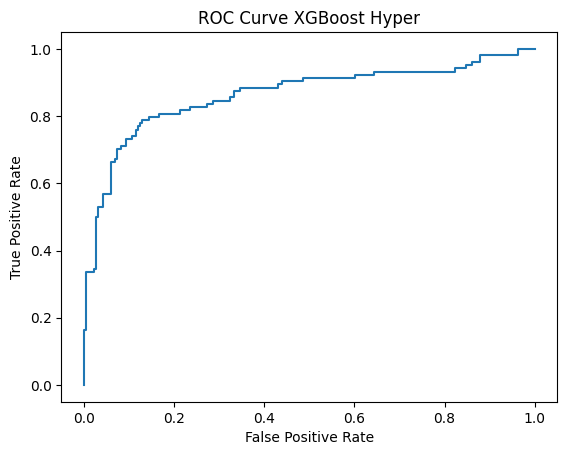

In [289]:
plt.title('ROC Curve XGBoost Hyper')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [290]:
auc_score = roc_auc_score(y_test, y_pred_proba_xgbhyp[:,1])
auc_score

0.8637820512820512

In [291]:
print("print of x train is >>",len(x_train))
print("print of y train is >>",len(y_train))
print("print of x test is >>", len(x_test))
print("print of y test is >>", len(y_test))

print of x train is >> 1277
print of y train is >> 1277
print of x test is >> 320
print of y test is >> 320


### Light GBM

In [292]:
lbgm_clf = LGBMClassifier(learning_rate=0.09, max_depth=-5, random_state=42,num_leaves=31)

In [293]:
lbgm_clf.fit(x_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 417, number of negative: 860
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000583 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4750
[LightGBM] [Info] Number of data points in the train set: 1277, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.326547 -> initscore=-0.723846
[LightGBM] [Info] Start training from score -0.723846


LGBMClassifier(learning_rate=0.09, max_depth=-5, random_state=42)

In [294]:
evaluate_model('Training Data Evalation',lbgm_clf,x_train,y_train)
evaluate_model('Testing Data Evaluation',lbgm_clf,x_test,y_test)

*************Training Data Evalation**************
confusion matrix 
 [[860   0]
 [  1 416]]
tn=860, fp=0, fn=1, tp=416
Accuracy: 0.9992169146436961
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       860
           1       1.00      1.00      1.00       417

    accuracy                           1.00      1277
   macro avg       1.00      1.00      1.00      1277
weighted avg       1.00      1.00      1.00      1277

*************Testing Data Evaluation**************
confusion matrix 
 [[196  20]
 [ 28  76]]
tn=196, fp=20, fn=28, tp=76
Accuracy: 0.85
Classification report:
               precision    recall  f1-score   support

           0       0.88      0.91      0.89       216
           1       0.79      0.73      0.76       104

    accuracy                           0.85       320
   macro avg       0.83      0.82      0.83       320
weighted avg       0.85      0.85      0.85       320



array([1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,

#### Oversampling

In [295]:
lbgm_clf1 = LGBMClassifier(learning_rate=0.09, random_state=42,num_leaves=31)
lbgm_clf1.fit(x_train_ros, y_train_ros)
evaluate_model('Training Data Evalation',lbgm_clf1,x_train_ros,y_train_ros)
evaluate_model('Testing Data Evaluation',lbgm_clf1,x_test,y_test)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 688, number of negative: 860
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000816 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4757
[LightGBM] [Info] Number of data points in the train set: 1548, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.444444 -> initscore=-0.223144
[LightGBM] [Info] Start training from score -0.223144
*************Training Data Evalation**************
confusion matrix 
 [[860   0]
 [  0 688]]
tn=860, fp=0, fn=0, tp=688
Accuracy: 1.0
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       860
           1       1.00      1.00      1.00       688

    accuracy                           1.00      1548
   macro avg       1.00      1.00      1.00      1548
w

array([1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,

#### SMOTE

In [296]:
lbgm_clf_sm = LGBMClassifier(random_state=42,num_leaves=31)
lbgm_clf_sm.fit(x_train_sm1, y_train_sm1)
evaluate_model('Training Data Evalation',lbgm_clf_sm,x_train_sm1,y_train_sm1)
evaluate_model('Testing Data Evaluation',lbgm_clf_sm,x_test,y_test)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 817, number of negative: 860
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000579 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4875
[LightGBM] [Info] Number of data points in the train set: 1677, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.487179 -> initscore=-0.051293
[LightGBM] [Info] Start training from score -0.051293
*************Training Data Evalation**************
confusion matrix 
 [[860   0]
 [  0 817]]
tn=860, fp=0, fn=0, tp=817
Accuracy: 1.0
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       860
           1       1.00      1.00      1.00       817

    accuracy                           1.00      1677
   macro avg       1.00      1.00      1.00      1677
w

array([1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,

### Hyperparameter Tuning

In [297]:
hyperparameters = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'num_leaves' : [10,20,30,31, 32,33, 34, 37,40,50]
}

In [298]:
lbgm_model = LGBMClassifier(random_state=42)
lbgm_gscv = GridSearchCV(estimator=lbgm_model, param_grid=hyperparameters, cv=5, n_jobs=-1)
lbgm_gscv.fit(x_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 417, number of negative: 860
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000746 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4750
[LightGBM] [Info] Number of data points in the train set: 1277, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.326547 -> initscore=-0.723846
[LightGBM] [Info] Start training from score -0.723846
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

GridSearchCV(cv=5, estimator=LGBMClassifier(random_state=42), n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 0.9, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5], 'n_estimators': [50, 100, 200],
                         'num_leaves': [10, 20, 30, 31, 32, 33, 34, 37, 40, 50],
                         'subsample': [0.8, 0.9, 1.0]})

In [299]:
lbgm_gscv.best_estimator_

LGBMClassifier(colsample_bytree=0.9, learning_rate=0.2, max_depth=5,
               n_estimators=200, num_leaves=20, random_state=42, subsample=0.8)

In [300]:
lbgm_gscv.best_params_

{'colsample_bytree': 0.9,
 'learning_rate': 0.2,
 'max_depth': 5,
 'n_estimators': 200,
 'num_leaves': 20,
 'subsample': 0.8}

In [301]:
lbgm_gscv.best_score_

0.8457414215686274

In [302]:
lbgm_clf_hyp = LGBMClassifier(colsample_bytree= 0.9,learning_rate=0.1,max_depth=5,n_estimators=200,subsample=0.8,num_leaves=20)
lbgm_clf_hyp.fit(x_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 417, number of negative: 860
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000786 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4750
[LightGBM] [Info] Number of data points in the train set: 1277, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.326547 -> initscore=-0.723846
[LightGBM] [Info] Start training from score -0.723846
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

LGBMClassifier(colsample_bytree=0.9, max_depth=5, n_estimators=200,
               num_leaves=20, subsample=0.8)

In [303]:
evaluate_model('Training Data Evalation',lbgm_clf_hyp,x_train,y_train)
evaluate_model('Testing Data Evaluation',lbgm_clf_hyp,x_test,y_test)

*************Training Data Evalation**************
confusion matrix 
 [[860   0]
 [  6 411]]
tn=860, fp=0, fn=6, tp=411
Accuracy: 0.995301487862177
Classification report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       860
           1       1.00      0.99      0.99       417

    accuracy                           1.00      1277
   macro avg       1.00      0.99      0.99      1277
weighted avg       1.00      1.00      1.00      1277

*************Testing Data Evaluation**************
confusion matrix 
 [[195  21]
 [ 30  74]]
tn=195, fp=21, fn=30, tp=74
Accuracy: 0.840625
Classification report:
               precision    recall  f1-score   support

           0       0.87      0.90      0.88       216
           1       0.78      0.71      0.74       104

    accuracy                           0.84       320
   macro avg       0.82      0.81      0.81       320
weighted avg       0.84      0.84      0.84       320



array([1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,

##### AUC-ROC Curve

In [304]:
y_pred_proba_lgbm = lbgm_clf.predict_proba(x_test)    
y_pred_proba_lgbm

array([[0.03291484, 0.96708516],
       [0.93152017, 0.06847983],
       [0.96543721, 0.03456279],
       [0.07060209, 0.92939791],
       [0.69204607, 0.30795393],
       [0.9682695 , 0.0317305 ],
       [0.97542375, 0.02457625],
       [0.3580128 , 0.6419872 ],
       [0.71681327, 0.28318673],
       [0.96884276, 0.03115724],
       [0.0174343 , 0.9825657 ],
       [0.06682037, 0.93317963],
       [0.98888176, 0.01111824],
       [0.87023975, 0.12976025],
       [0.93792646, 0.06207354],
       [0.96343923, 0.03656077],
       [0.96220998, 0.03779002],
       [0.78757693, 0.21242307],
       [0.02249301, 0.97750699],
       [0.91839786, 0.08160214],
       [0.84912769, 0.15087231],
       [0.00227647, 0.99772353],
       [0.99606481, 0.00393519],
       [0.32491019, 0.67508981],
       [0.99252683, 0.00747317],
       [0.98397593, 0.01602407],
       [0.89427236, 0.10572764],
       [0.98285965, 0.01714035],
       [0.22249506, 0.77750494],
       [0.98313225, 0.01686775],
       [0.

In [305]:
fpr, tpr, thresh = roc_curve(y_test, y_pred_proba_lgbm[:,1])
thresh

array([       inf, 0.99772353, 0.97780554, 0.97750699, 0.9748861 ,
       0.97293489, 0.97177367, 0.96794038, 0.92356138, 0.92271491,
       0.85615089, 0.84234005, 0.84132422, 0.8380479 , 0.80989026,
       0.80788844, 0.78458841, 0.78447939, 0.77750494, 0.75236886,
       0.72429285, 0.72321368, 0.69767711, 0.67985208, 0.66068821,
       0.64909418, 0.6419872 , 0.63213537, 0.63210919, 0.63000125,
       0.53870774, 0.5224722 , 0.52113933, 0.46011186, 0.4518456 ,
       0.44781072, 0.41471819, 0.39788474, 0.33119955, 0.31643353,
       0.30697973, 0.29577627, 0.27475746, 0.26145169, 0.24289671,
       0.24175943, 0.22596132, 0.22527765, 0.22153724, 0.20458081,
       0.20136394, 0.19035137, 0.17383202, 0.16425329, 0.1511049 ,
       0.15087231, 0.13555398, 0.13406183, 0.10175791, 0.09517137,
       0.07131668, 0.07084062, 0.07052347, 0.06962902, 0.06592792,
       0.06509611, 0.06429462, 0.06353725, 0.06225144, 0.06207354,
       0.06206452, 0.06181049, 0.06083886, 0.06049629, 0.05768

Text(0, 0.5, 'True Positive Rate')

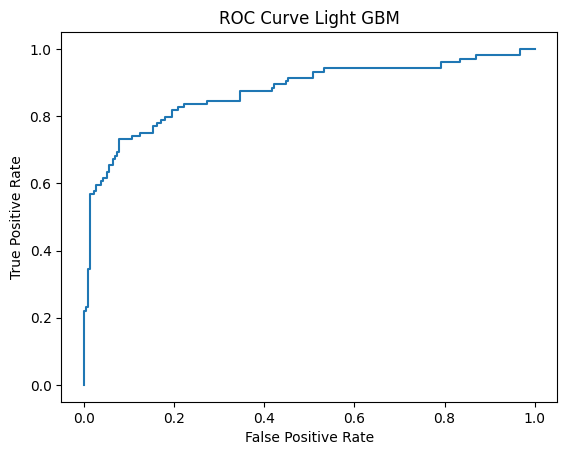

In [306]:
plt.title('ROC Curve Light GBM')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [307]:
auc_score = roc_auc_score(y_test, y_pred_proba_lgbm[:,1])
auc_score

0.8741096866096866

##### AUC-ROC Curve- Hyper

In [308]:
y_pred_proba_lgbmhyp = lbgm_clf_hyp.predict_proba(x_test)    
y_pred_proba_lgbmhyp

array([[0.05360288, 0.94639712],
       [0.8953342 , 0.1046658 ],
       [0.9796838 , 0.0203162 ],
       [0.10929066, 0.89070934],
       [0.47409456, 0.52590544],
       [0.95797209, 0.04202791],
       [0.99003226, 0.00996774],
       [0.47066152, 0.52933848],
       [0.59617228, 0.40382772],
       [0.97051274, 0.02948726],
       [0.01041238, 0.98958762],
       [0.04713953, 0.95286047],
       [0.9857028 , 0.0142972 ],
       [0.85022675, 0.14977325],
       [0.89106071, 0.10893929],
       [0.90499349, 0.09500651],
       [0.93100044, 0.06899956],
       [0.58040025, 0.41959975],
       [0.05137522, 0.94862478],
       [0.75802523, 0.24197477],
       [0.61429753, 0.38570247],
       [0.00250932, 0.99749068],
       [0.9922767 , 0.0077233 ],
       [0.11630894, 0.88369106],
       [0.98135649, 0.01864351],
       [0.97597679, 0.02402321],
       [0.81231859, 0.18768141],
       [0.99297618, 0.00702382],
       [0.25058227, 0.74941773],
       [0.98127149, 0.01872851],
       [0.

In [309]:
fpr, tpr, thresh = roc_curve(y_test, y_pred_proba_lgbmhyp[:,1])
thresh

array([       inf, 0.99849774, 0.95286047, 0.95044665, 0.94862478,
       0.9465978 , 0.93132061, 0.92501449, 0.88369106, 0.88047837,
       0.8700724 , 0.86422889, 0.84285106, 0.83600518, 0.77302312,
       0.75568991, 0.74941773, 0.74889075, 0.7473626 , 0.72781425,
       0.72534385, 0.66259016, 0.65744919, 0.65453483, 0.64758914,
       0.63508268, 0.61976738, 0.61556028, 0.57886121, 0.5553729 ,
       0.53215497, 0.52989603, 0.52933848, 0.52590544, 0.51090752,
       0.45000389, 0.44184821, 0.43511253, 0.43009175, 0.40382772,
       0.40038213, 0.38570247, 0.34314783, 0.34170885, 0.33161794,
       0.31261284, 0.30292883, 0.29450024, 0.29130263, 0.27996397,
       0.2742857 , 0.27210576, 0.24197477, 0.24076529, 0.23543782,
       0.21106582, 0.20149404, 0.18037836, 0.18021155, 0.17967119,
       0.17482711, 0.17425556, 0.15762827, 0.15721374, 0.13387055,
       0.13369791, 0.13264209, 0.1306393 , 0.1244767 , 0.12194337,
       0.121882  , 0.11967356, 0.11146833, 0.10893929, 0.09239

Text(0, 0.5, 'True Positive Rate')

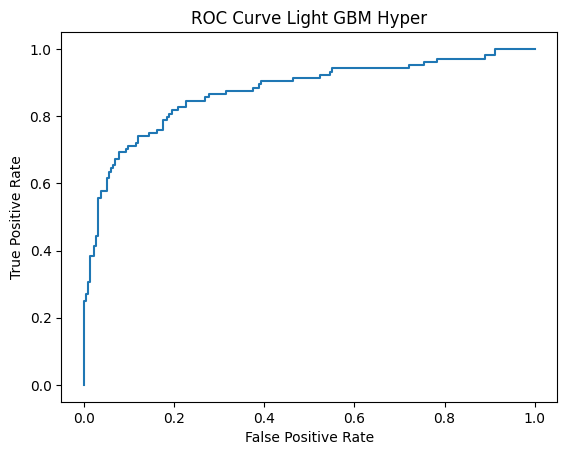

In [310]:
plt.title('ROC Curve Light GBM Hyper')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [311]:
auc_score = roc_auc_score(y_test, y_pred_proba_lgbmhyp[:,1])
auc_score

0.8731303418803419

In [312]:
print("print of x train is >>",len(x_train))
print("print of y train is >>",len(y_train))
print("print of x test is >>", len(x_test))
print("print of y test is >>", len(y_test))

print of x train is >> 1277
print of y train is >> 1277
print of x test is >> 320
print of y test is >> 320


### CatBoost

In [313]:
ctb_clf = CatBoostClassifier(iterations=100,learning_rate=0.1,depth=6,loss_function='Logloss',random_seed=42)

In [314]:
ctb_clf.fit(x_train,y_train)

0:	learn: 0.6695639	total: 154ms	remaining: 15.3s
1:	learn: 0.6446378	total: 158ms	remaining: 7.74s
2:	learn: 0.6272026	total: 162ms	remaining: 5.25s
3:	learn: 0.6112192	total: 166ms	remaining: 3.98s
4:	learn: 0.5952486	total: 170ms	remaining: 3.22s
5:	learn: 0.5864191	total: 173ms	remaining: 2.71s
6:	learn: 0.5726119	total: 177ms	remaining: 2.35s
7:	learn: 0.5629487	total: 181ms	remaining: 2.08s
8:	learn: 0.5537079	total: 184ms	remaining: 1.86s
9:	learn: 0.5464492	total: 188ms	remaining: 1.69s
10:	learn: 0.5401919	total: 192ms	remaining: 1.55s
11:	learn: 0.5321965	total: 195ms	remaining: 1.43s
12:	learn: 0.5217511	total: 199ms	remaining: 1.33s
13:	learn: 0.5133233	total: 203ms	remaining: 1.24s
14:	learn: 0.5095011	total: 206ms	remaining: 1.17s
15:	learn: 0.5048715	total: 210ms	remaining: 1.1s
16:	learn: 0.5019768	total: 214ms	remaining: 1.04s
17:	learn: 0.4967481	total: 218ms	remaining: 992ms
18:	learn: 0.4924510	total: 222ms	remaining: 944ms
19:	learn: 0.4858480	total: 225ms	remainin

In [315]:
evaluate_model('Training Data Evaluation',ctb_clf,x_train,y_train)
evaluate_model('Testing Data Evaluation',ctb_clf,x_test,y_test)

*************Training Data Evaluation*************
confusion matrix 
 [[858   2]
 [ 78 339]]
tn=858, fp=2, fn=78, tp=339
Accuracy: 0.9373531714956931
Classification report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96       860
           1       0.99      0.81      0.89       417

    accuracy                           0.94      1277
   macro avg       0.96      0.91      0.92      1277
weighted avg       0.94      0.94      0.94      1277

*************Testing Data Evaluation**************
confusion matrix 
 [[202  14]
 [ 43  61]]
tn=202, fp=14, fn=43, tp=61
Accuracy: 0.821875
Classification report:
               precision    recall  f1-score   support

           0       0.82      0.94      0.88       216
           1       0.81      0.59      0.68       104

    accuracy                           0.82       320
   macro avg       0.82      0.76      0.78       320
weighted avg       0.82      0.82      0.81       320



array([1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,

In [316]:
print("print of x train is >>",len(x_train))
print("print of y train is >>",len(y_train))
print("print of x test is >>", len(x_test))
print("print of y test is >>", len(y_test))

print of x train is >> 1277
print of y train is >> 1277
print of x test is >> 320
print of y test is >> 320


#### SMOTE

In [317]:
ctb_clf1= CatBoostClassifier()
ctb_clf1.fit(x_train_sm1, y_train_sm1)

Learning rate set to 0.012847
0:	learn: 0.6902937	total: 4.65ms	remaining: 4.65s
1:	learn: 0.6873523	total: 9ms	remaining: 4.49s
2:	learn: 0.6845804	total: 13.1ms	remaining: 4.34s
3:	learn: 0.6816408	total: 17.2ms	remaining: 4.28s
4:	learn: 0.6794562	total: 22ms	remaining: 4.38s
5:	learn: 0.6772309	total: 27.5ms	remaining: 4.56s
6:	learn: 0.6749148	total: 32.3ms	remaining: 4.58s
7:	learn: 0.6728672	total: 37.5ms	remaining: 4.65s
8:	learn: 0.6703229	total: 43ms	remaining: 4.74s
9:	learn: 0.6679452	total: 46.7ms	remaining: 4.63s
10:	learn: 0.6653995	total: 50.8ms	remaining: 4.56s
11:	learn: 0.6639335	total: 54.5ms	remaining: 4.49s
12:	learn: 0.6612496	total: 58.4ms	remaining: 4.43s
13:	learn: 0.6586776	total: 62.2ms	remaining: 4.38s
14:	learn: 0.6565184	total: 66ms	remaining: 4.34s
15:	learn: 0.6543193	total: 69.9ms	remaining: 4.3s
16:	learn: 0.6518131	total: 73.8ms	remaining: 4.27s
17:	learn: 0.6499245	total: 77.7ms	remaining: 4.24s
18:	learn: 0.6481107	total: 81.4ms	remaining: 4.2s
19:

In [318]:
evaluate_model('Training Data Evalation',ctb_clf1,x_train_sm1,y_train_sm1)
evaluate_model('Testing Data Evaluation',ctb_clf1,x_test,y_test)

*************Training Data Evalation**************
confusion matrix 
 [[854   6]
 [ 22 795]]
tn=854, fp=6, fn=22, tp=795
Accuracy: 0.9833035181872392
Classification report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       860
           1       0.99      0.97      0.98       817

    accuracy                           0.98      1677
   macro avg       0.98      0.98      0.98      1677
weighted avg       0.98      0.98      0.98      1677

*************Testing Data Evaluation**************
confusion matrix 
 [[190  26]
 [ 32  72]]
tn=190, fp=26, fn=32, tp=72
Accuracy: 0.81875
Classification report:
               precision    recall  f1-score   support

           0       0.86      0.88      0.87       216
           1       0.73      0.69      0.71       104

    accuracy                           0.82       320
   macro avg       0.80      0.79      0.79       320
weighted avg       0.82      0.82      0.82       320



array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,

In [319]:
print("print of x train is >>",len(x_train))
print("print of y train is >>",len(y_train))
print("print of x test is >>", len(x_test))
print("print of y test is >>", len(y_test))

print of x train is >> 1277
print of y train is >> 1277
print of x test is >> 320
print of y test is >> 320


#### ROS

In [320]:
ctb_clf2=CatBoostClassifier()
ctb_clf2.fit(x_train_ros, y_train_ros)

Learning rate set to 0.012416
0:	learn: 0.6904999	total: 4.63ms	remaining: 4.63s
1:	learn: 0.6877340	total: 8.76ms	remaining: 4.37s
2:	learn: 0.6856737	total: 12.7ms	remaining: 4.21s
3:	learn: 0.6830165	total: 16.8ms	remaining: 4.18s
4:	learn: 0.6802578	total: 21.4ms	remaining: 4.27s
5:	learn: 0.6773517	total: 25.5ms	remaining: 4.22s
6:	learn: 0.6754985	total: 30.1ms	remaining: 4.28s
7:	learn: 0.6726580	total: 35.6ms	remaining: 4.42s
8:	learn: 0.6704675	total: 40.3ms	remaining: 4.43s
9:	learn: 0.6684890	total: 45.2ms	remaining: 4.47s
10:	learn: 0.6664140	total: 49.3ms	remaining: 4.43s
11:	learn: 0.6646956	total: 53.3ms	remaining: 4.38s
12:	learn: 0.6620571	total: 57.1ms	remaining: 4.33s
13:	learn: 0.6602293	total: 60.8ms	remaining: 4.28s
14:	learn: 0.6574871	total: 64.7ms	remaining: 4.25s
15:	learn: 0.6555369	total: 68.5ms	remaining: 4.21s
16:	learn: 0.6530198	total: 72.3ms	remaining: 4.18s
17:	learn: 0.6510883	total: 76ms	remaining: 4.15s
18:	learn: 0.6492071	total: 79.8ms	remaining: 

In [321]:
evaluate_model("Training Data Evaluation", ctb_clf2, x_train_ros, y_train_ros)
evaluate_model("Testing Data Evaluation",ctb_clf2,x_test, y_test)

*************Training Data Evaluation*************
confusion matrix 
 [[857   3]
 [ 24 664]]
tn=857, fp=3, fn=24, tp=664
Accuracy: 0.9825581395348837
Classification report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       860
           1       1.00      0.97      0.98       688

    accuracy                           0.98      1548
   macro avg       0.98      0.98      0.98      1548
weighted avg       0.98      0.98      0.98      1548

*************Testing Data Evaluation**************
confusion matrix 
 [[201  15]
 [ 34  70]]
tn=201, fp=15, fn=34, tp=70
Accuracy: 0.846875
Classification report:
               precision    recall  f1-score   support

           0       0.86      0.93      0.89       216
           1       0.82      0.67      0.74       104

    accuracy                           0.85       320
   macro avg       0.84      0.80      0.82       320
weighted avg       0.84      0.85      0.84       320



array([1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,

##### AUC-ROC Curve

In [322]:
y_pred_proba_ctb = ctb_clf.predict_proba(x_test)    
y_pred_proba_ctb

array([[0.21235066, 0.78764934],
       [0.79372029, 0.20627971],
       [0.91239302, 0.08760698],
       [0.22839099, 0.77160901],
       [0.84973679, 0.15026321],
       [0.8318304 , 0.1681696 ],
       [0.95340972, 0.04659028],
       [0.47127617, 0.52872383],
       [0.54753069, 0.45246931],
       [0.92445058, 0.07554942],
       [0.03125081, 0.96874919],
       [0.34130709, 0.65869291],
       [0.94338595, 0.05661405],
       [0.72941179, 0.27058821],
       [0.92778228, 0.07221772],
       [0.91024446, 0.08975554],
       [0.84688232, 0.15311768],
       [0.44413319, 0.55586681],
       [0.08633099, 0.91366901],
       [0.39643154, 0.60356846],
       [0.7254826 , 0.2745174 ],
       [0.03577788, 0.96422212],
       [0.96354922, 0.03645078],
       [0.52998667, 0.47001333],
       [0.93215283, 0.06784717],
       [0.86886509, 0.13113491],
       [0.89221696, 0.10778304],
       [0.91044871, 0.08955129],
       [0.48196661, 0.51803339],
       [0.79434274, 0.20565726],
       [0.

In [323]:
fpr, tpr, thresh = roc_curve(y_test, y_pred_proba_ctb[:,1])
thresh

array([       inf, 0.97268463, 0.94909043, 0.94363266, 0.91420705,
       0.91366901, 0.894994  , 0.89008509, 0.74486206, 0.73036222,
       0.65636272, 0.65369795, 0.61332593, 0.60356846, 0.59662198,
       0.59424863, 0.59140338, 0.58649338, 0.56813266, 0.55586681,
       0.52872383, 0.52841231, 0.52353871, 0.51229135, 0.49617806,
       0.49464547, 0.47001333, 0.46834201, 0.46301378, 0.45246931,
       0.44126861, 0.43315302, 0.41346819, 0.41085842, 0.4064589 ,
       0.38786589, 0.38499792, 0.38136688, 0.37599321, 0.37344085,
       0.36757325, 0.36273732, 0.36024507, 0.36007586, 0.35999944,
       0.35905261, 0.35497262, 0.35191259, 0.35068606, 0.3318425 ,
       0.33068886, 0.32776289, 0.32480827, 0.32161699, 0.32142089,
       0.31898394, 0.31755522, 0.31612595, 0.31318825, 0.30295399,
       0.30072969, 0.27878087, 0.27679139, 0.27460128, 0.2745174 ,
       0.25520258, 0.25494426, 0.25138839, 0.22116189, 0.21999909,
       0.21892775, 0.21805514, 0.21425915, 0.21227948, 0.20516

Text(0, 0.5, 'True Positive Rate')

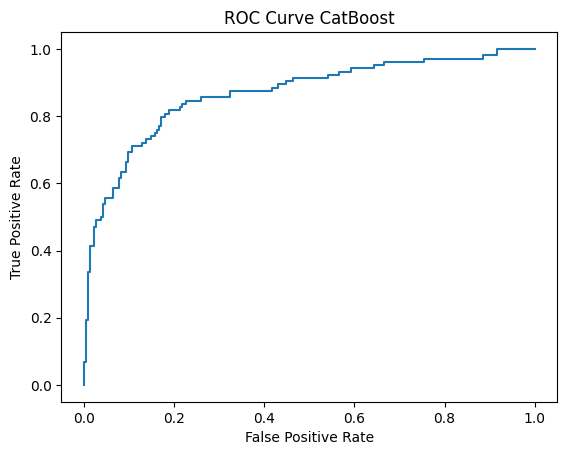

In [324]:
plt.title('ROC Curve CatBoost')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [325]:
auc_score = roc_auc_score(y_test, y_pred_proba_ctb[:,1])
auc_score

0.8675658831908831

In [326]:
print("print of x train is >>",len(x_train))
print("print of y train is >>",len(y_train))
print("print of x test is >>", len(x_test))
print("print of y test is >>", len(y_test))

print of x train is >> 1277
print of y train is >> 1277
print of x test is >> 320
print of y test is >> 320


### Gradient Boosting Machine GBM

In [141]:
gbm_clf = GradientBoostingClassifier(n_estimators=100,max_depth=3,learning_rate=0.1,random_state=42)

In [142]:
#gbm_clf.fit(x_train,y_train)
gbm_clf.fit(x_train.values,y_train)

GradientBoostingClassifier(random_state=42)

In [143]:
evaluate_model('Training Data Evaluation',gbm_clf,x_train,y_train)
evaluate_model('Testing Data Evaluation',gbm_clf,x_test,y_test)

*************Training Data Evaluation*************
confusion matrix 
 [[855   5]
 [160 257]]
tn=855, fp=5, fn=160, tp=257
Accuracy: 0.8707909162098669
Classification report:
               precision    recall  f1-score   support

           0       0.84      0.99      0.91       860
           1       0.98      0.62      0.76       417

    accuracy                           0.87      1277
   macro avg       0.91      0.81      0.83      1277
weighted avg       0.89      0.87      0.86      1277

*************Testing Data Evaluation**************
confusion matrix 
 [[205  11]
 [ 54  50]]
tn=205, fp=11, fn=54, tp=50
Accuracy: 0.796875
Classification report:
               precision    recall  f1-score   support

           0       0.79      0.95      0.86       216
           1       0.82      0.48      0.61       104

    accuracy                           0.80       320
   macro avg       0.81      0.71      0.73       320
weighted avg       0.80      0.80      0.78       320



array([1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,

#### ROS

In [144]:
gbm_clf1=GradientBoostingClassifier()
gbm_clf1.fit(x_train_ros, y_train_ros)

GradientBoostingClassifier()

In [145]:
evaluate_model("Training Data Evaluation", gbm_clf1, x_train_ros, y_train_ros)
evaluate_model("Testing Data Evaluation",gbm_clf1,x_test, y_test)

*************Training Data Evaluation*************
confusion matrix 
 [[833  27]
 [123 565]]
tn=833, fp=27, fn=123, tp=565
Accuracy: 0.9031007751937985
Classification report:
               precision    recall  f1-score   support

           0       0.87      0.97      0.92       860
           1       0.95      0.82      0.88       688

    accuracy                           0.90      1548
   macro avg       0.91      0.89      0.90      1548
weighted avg       0.91      0.90      0.90      1548

*************Testing Data Evaluation**************
confusion matrix 
 [[193  23]
 [ 38  66]]
tn=193, fp=23, fn=38, tp=66
Accuracy: 0.809375
Classification report:
               precision    recall  f1-score   support

           0       0.84      0.89      0.86       216
           1       0.74      0.63      0.68       104

    accuracy                           0.81       320
   macro avg       0.79      0.76      0.77       320
weighted avg       0.80      0.81      0.81       320



array([1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,

##### SMOTE

In [146]:
gbm_clf2=GradientBoostingClassifier()
gbm_clf2.fit(x_train_sm,y_train_sm)

GradientBoostingClassifier()

In [147]:
evaluate_model("Training Data Evaluation", gbm_clf2, x_train_sm, y_train_sm)
evaluate_model("Testing Data Evaluation",gbm_clf2,x_test, y_test)

*************Training Data Evaluation*************
confusion matrix 
 [[825  35]
 [110 621]]
tn=825, fp=35, fn=110, tp=621
Accuracy: 0.9088623507228158
Classification report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92       860
           1       0.95      0.85      0.90       731

    accuracy                           0.91      1591
   macro avg       0.91      0.90      0.91      1591
weighted avg       0.91      0.91      0.91      1591

*************Testing Data Evaluation**************
confusion matrix 
 [[190  26]
 [ 36  68]]
tn=190, fp=26, fn=36, tp=68
Accuracy: 0.80625
Classification report:
               precision    recall  f1-score   support

           0       0.84      0.88      0.86       216
           1       0.72      0.65      0.69       104

    accuracy                           0.81       320
   macro avg       0.78      0.77      0.77       320
weighted avg       0.80      0.81      0.80       320



array([1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,

#### Hyperparameter Tuning

In [148]:
hyperparameter = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 1],
    'max_depth': [3, 4, 5]
}

In [149]:
gbm_clf3=GradientBoostingClassifier()
gbm_gscv = GridSearchCV(estimator=gbm_clf3, param_grid=hyperparameter, cv=5)

In [150]:
gbm_gscv.fit(x_train.values,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 1],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [100, 200, 300]})

In [152]:
gbm_gscv.best_estimator_

GradientBoostingClassifier(learning_rate=1, max_depth=4, n_estimators=300)

In [153]:
gbm_gscv.best_params_

{'learning_rate': 1, 'max_depth': 4, 'n_estimators': 300}

In [154]:
gbm_gscv.best_score_

0.8230147058823529

In [155]:
gbm_clf_hyp=gbm_gscv.best_estimator_

In [156]:
gbm_clf_hyp.fit(x_train.values,y_train)

GradientBoostingClassifier(learning_rate=1, max_depth=4, n_estimators=300)

In [157]:
evaluate_model('Training Data Evaluation',gbm_clf_hyp,x_train,y_train)
evaluate_model('Testing Data Evaluation',gbm_clf_hyp,x_test,y_test)

*************Training Data Evaluation*************
confusion matrix 
 [[860   0]
 [  0 417]]
tn=860, fp=0, fn=0, tp=417
Accuracy: 1.0
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       860
           1       1.00      1.00      1.00       417

    accuracy                           1.00      1277
   macro avg       1.00      1.00      1.00      1277
weighted avg       1.00      1.00      1.00      1277

*************Testing Data Evaluation**************
confusion matrix 
 [[188  28]
 [ 33  71]]
tn=188, fp=28, fn=33, tp=71
Accuracy: 0.809375
Classification report:
               precision    recall  f1-score   support

           0       0.85      0.87      0.86       216
           1       0.72      0.68      0.70       104

    accuracy                           0.81       320
   macro avg       0.78      0.78      0.78       320
weighted avg       0.81      0.81      0.81       320



array([1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,

In [158]:
prediction=gbm_clf_hyp.predict(x_test)

In [159]:
prediction

array([1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,

In [161]:
len(prediction)

320

In [160]:
print("print of x train is >>",len(x_train))
print("print of y train is >>",len(y_train))
print("print of x test is >>", len(x_test))
print("print of y test is >>", len(y_test))

print of x train is >> 1277
print of y train is >> 1277
print of x test is >> 320
print of y test is >> 320


##### AUC-ROC Curve

In [162]:
y_pred_proba_gbm = gbm_clf.predict_proba(x_test)    
y_pred_proba_gbm

array([[0.20769969, 0.79230031],
       [0.9081125 , 0.0918875 ],
       [0.82555453, 0.17444547],
       [0.39786187, 0.60213813],
       [0.41193998, 0.58806002],
       [0.89821197, 0.10178803],
       [0.91401855, 0.08598145],
       [0.66354948, 0.33645052],
       [0.65835315, 0.34164685],
       [0.88286093, 0.11713907],
       [0.05536189, 0.94463811],
       [0.28164672, 0.71835328],
       [0.72776141, 0.27223859],
       [0.69960094, 0.30039906],
       [0.76374279, 0.23625721],
       [0.83337817, 0.16662183],
       [0.84104913, 0.15895087],
       [0.47562269, 0.52437731],
       [0.17542674, 0.82457326],
       [0.55524925, 0.44475075],
       [0.81322879, 0.18677121],
       [0.05955618, 0.94044382],
       [0.90036127, 0.09963873],
       [0.68877354, 0.31122646],
       [0.77095708, 0.22904292],
       [0.77848443, 0.22151557],
       [0.84775267, 0.15224733],
       [0.77096826, 0.22903174],
       [0.6144126 , 0.3855874 ],
       [0.78980855, 0.21019145],
       [0.

In [163]:
fpr, tpr, thresh = roc_curve(y_test, y_pred_proba_gbm[:,1])
thresh

array([       inf, 0.94937439, 0.84457798, 0.82457326, 0.81703036,
       0.81586881, 0.70093616, 0.6903189 , 0.66712096, 0.66460299,
       0.60213813, 0.58806002, 0.57214102, 0.57120984, 0.54262768,
       0.53895874, 0.53501078, 0.52437731, 0.50580212, 0.50548509,
       0.49398613, 0.49002159, 0.48152266, 0.47865719, 0.47847189,
       0.47829063, 0.45764496, 0.44475075, 0.42844566, 0.42116411,
       0.40944204, 0.40922488, 0.40740807, 0.40008626, 0.39632875,
       0.39353093, 0.38780298, 0.38272491, 0.37999975, 0.36367351,
       0.36112999, 0.35856544, 0.35721383, 0.35686556, 0.35367674,
       0.35265015, 0.34688695, 0.34687814, 0.33726067, 0.33645052,
       0.33169504, 0.33029725, 0.3277225 , 0.32411301, 0.32306367,
       0.31797352, 0.31547006, 0.31122646, 0.30297142, 0.30046347,
       0.30039906, 0.30001521, 0.29943151, 0.29902718, 0.2933266 ,
       0.29330364, 0.2906881 , 0.29036445, 0.2877285 , 0.28304467,
       0.27456901, 0.27245479, 0.26674863, 0.2665196 , 0.26141

Text(0, 0.5, 'True Positive Rate')

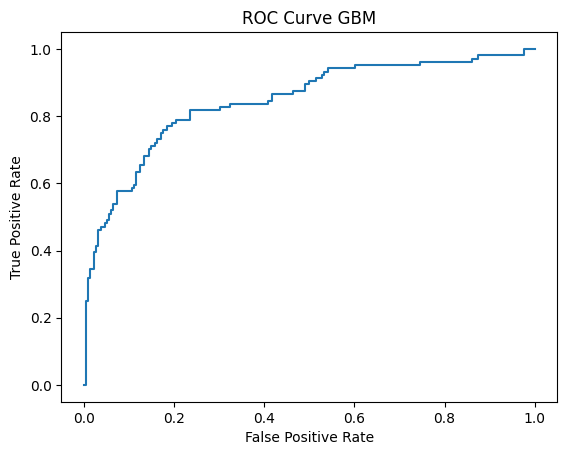

In [164]:
plt.title('ROC Curve GBM')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [165]:
auc_score = roc_auc_score(y_test, y_pred_proba_gbm[:,1])
auc_score

0.844684829059829

##### AUC-ROC Hyper

In [166]:
y_pred_proba_gbmhyp = gbm_clf_hyp.predict_proba(x_test)    
y_pred_proba_gbmhyp

array([[6.41810344e-07, 9.99999358e-01],
       [9.99999580e-01, 4.20444941e-07],
       [9.99997994e-01, 2.00649751e-06],
       [1.62612482e-07, 9.99999837e-01],
       [9.99577259e-01, 4.22741360e-04],
       [9.99999954e-01, 4.62293530e-08],
       [9.99999979e-01, 2.05465472e-08],
       [4.24336934e-01, 5.75663066e-01],
       [9.99993317e-01, 6.68252410e-06],
       [9.99995026e-01, 4.97378585e-06],
       [2.23003391e-08, 9.99999978e-01],
       [2.18787467e-07, 9.99999781e-01],
       [5.79394466e-01, 4.20605534e-01],
       [9.22039196e-01, 7.79608045e-02],
       [9.99984771e-01, 1.52291854e-05],
       [9.99998770e-01, 1.23035726e-06],
       [9.99999994e-01, 5.97882973e-09],
       [7.16689046e-01, 2.83310954e-01],
       [8.02541662e-07, 9.99999197e-01],
       [9.99998670e-01, 1.32962668e-06],
       [7.01102566e-04, 9.99298897e-01],
       [2.10909146e-07, 9.99999789e-01],
       [9.99999957e-01, 4.31967332e-08],
       [8.97566919e-01, 1.02433081e-01],
       [9.999992

In [167]:
fpr, tpr, thresh = roc_curve(y_test, y_pred_proba_gbmhyp[:,1])
thresh

array([           inf, 1.00000000e+00, 1.00000000e+00, 9.99999255e-01,
       9.99999197e-01, 9.99999115e-01, 9.99999041e-01, 9.99997011e-01,
       9.99996759e-01, 9.99996468e-01, 9.99992131e-01, 9.99987405e-01,
       9.99977882e-01, 9.99975061e-01, 9.99972187e-01, 9.99857830e-01,
       9.99688570e-01, 9.99592012e-01, 9.99486240e-01, 9.99305467e-01,
       9.99298897e-01, 9.99106231e-01, 9.98325332e-01, 9.98321031e-01,
       9.97898757e-01, 9.96605198e-01, 9.94527543e-01, 9.90452639e-01,
       9.62837206e-01, 9.61927891e-01, 8.89818860e-01, 8.75895095e-01,
       8.23631845e-01, 8.10040359e-01, 8.08085621e-01, 6.60335763e-01,
       5.75663066e-01, 4.69969648e-01, 4.45700963e-01, 1.74625407e-01,
       1.20056277e-01, 1.05704597e-01, 1.02433081e-01, 6.65752058e-02,
       6.06035312e-02, 5.46495299e-02, 3.15868479e-02, 1.01179235e-02,
       7.65556430e-03, 6.53902891e-03, 6.09456775e-03, 3.70175339e-03,
       2.00097466e-03, 1.98731371e-03, 1.90434557e-03, 1.73701647e-03,
      

Text(0, 0.5, 'True Positive Rate')

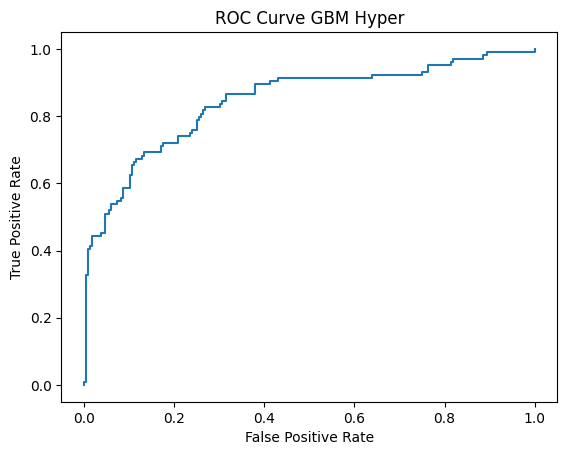

In [168]:
plt.title('ROC Curve GBM Hyper')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [169]:
auc_score = roc_auc_score(y_test, y_pred_proba_gbmhyp[:,1])
auc_score

0.8444177350427351

In [170]:
print("print of x train is >>",len(x_train))
print("print of y train is >>",len(y_train))
print("print of x test is >>", len(x_test))
print("print of y test is >>", len(y_test))

print of x train is >> 1277
print of y train is >> 1277
print of x test is >> 320
print of y test is >> 320


### Voting Classifier

In [ ]:
# clf1 = LogisticRegression()
# clf2 = KNeighborsClassifier()
# clf3 = DecisionTreeClassifier(random_state=34, max_depth = 8)
# clf4 = RandomForestClassifier()
# clf5 = SVC(random_state=34,probability=True)
# clf6 = GaussianNB()
# clf7 = GradientBoostingClassifier()
# clf8 = AdaBoostClassifier()
# clf9 = XGBClassifier()
# clf10 = LGBMClassifier()
# clf11 = CatBoostClassifier()

# models = [  ('Logistic_Regression', clf1),('KNN ', clf2),('Decision_Tree', clf3),
#             ('Random_Forest', clf4),('SVM', clf5),('GaussianNB', clf6),('GBM', clf7),
#             ('AdaBoost', clf8),('XGBoost', clf9),('Light_GBM', clf10),('CatBoost', clf11)]

# voting_clf = VotingClassifier(estimators=models, voting='hard',verbose=False)

In [ ]:
# voting_clf.fit(x_train,y_train)

In [ ]:
# evaluate_model('Training Data Evaluation', voting_clf, x_train, y_train)
# evaluate_model('Testing Data Evaluation', voting_clf, x_test, y_test)

In [ ]:
print("print of x train is >>",len(x_train))
print("print of y train is >>",len(y_train))
print("print of x test is >>", len(x_test))
print("print of y test is >>", len(y_test))

##### Soft Voting

In [225]:
# clf1 = LogisticRegression()
# clf2 = KNeighborsClassifier()
# clf3 = DecisionTreeClassifier(random_state=34, max_depth = 8)
# clf4 = RandomForestClassifier()
# clf5 = SVC(random_state=34,probability=True)
# clf6 = GaussianNB()
# clf7 = GradientBoostingClassifier()
# clf8 = AdaBoostClassifier()
# clf9 = XGBClassifier()
# clf10 = LGBMClassifier()
# clf11 = CatBoostClassifier()

# models = [  ('Logistic_Regression', clf1),('KNN ', clf2),('Decision_Tree', clf3),
#             ('Random_Forest', clf4),('SVM', clf5),('GaussianNB', clf6),('GBM', clf7),
#             ('AdaBoost', clf8),('XGBoost', clf9),('Light_GBM', clf10),('CatBoost', clf11)]

# voting_clf_soft = VotingClassifier(estimators=models, voting='soft',verbose=False)

In [ ]:
# voting_clf_soft.fit(x_train,y_train)

In [ ]:
# evaluate_model('Training Data Evaluation', voting_clf_soft, x_train, y_train)
# evaluate_model('Testing Data Evaluation', voting_clf_soft, x_test, y_test)

In [ ]:
print("print of x train is >>",len(x_train))
print("print of y train is >>",len(y_train))
print("print of x test is >>", len(x_test))
print("print of y test is >>", len(y_test))

##### AUC-ROC Curve

In [ ]:
# y_pred_proba_vtg = voting_clf_soft.predict_proba(x_test)    
# y_pred_proba_vtg

In [ ]:
# fpr, tpr, thresh = roc_curve(y_test, y_pred_proba_vtg[:,1])
# thresh

In [ ]:
# plt.title('ROC Curve Voting Classifier')
# plt.plot(fpr, tpr)
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')

In [ ]:
# auc_score = roc_auc_score(y_test, y_pred_proba_vtg[:,1])
# auc_score

In [ ]:
print("print of x train is >>",len(x_train))
print("print of y train is >>",len(y_train))
print("print of x test is >>", len(x_test))
print("print of y test is >>", len(y_test))

<!-- sample -->

#### Checking Model Overfit

In [365]:
#sample

In [ ]:
# evaluate decision tree performance on train and test sets with different tree depths
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot

# create dataset
X, y = make_classification(n_samples=10000, n_features=20, n_informative=5, n_redundant=15, random_state=1)
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
# define lists to collect scores
train_scores, test_scores = list(), list()
# define the tree depths to evaluate
values = [i for i in range(1, 21)]
# evaluate a decision tree for each depth
for i in values:
	# configure the model
	model = DecisionTreeClassifier(max_depth=i)
	# fit model on the training dataset
	model.fit(X_train, y_train)
	# evaluate on the train dataset
	train_yhat = model.predict(X_train)
	train_acc = accuracy_score(y_train, train_yhat)
	train_scores.append(train_acc)
	# evaluate on the test dataset
	test_yhat = model.predict(X_test)
	test_acc = accuracy_score(y_test, test_yhat)
	test_scores.append(test_acc)
	# summarize progress
	print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs tree depth
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
pyplot.legend()
pyplot.show()

#### XGBoost

>1, train: 0.762, test: 0.778
>2, train: 0.886, test: 0.812
>3, train: 0.960, test: 0.834
>4, train: 0.995, test: 0.841
>5, train: 1.000, test: 0.844
>6, train: 1.000, test: 0.844
>7, train: 1.000, test: 0.850
>8, train: 1.000, test: 0.859
>9, train: 1.000, test: 0.831
>10, train: 1.000, test: 0.831
>11, train: 1.000, test: 0.844
>12, train: 1.000, test: 0.847
>13, train: 1.000, test: 0.847
>14, train: 1.000, test: 0.850
>15, train: 1.000, test: 0.844
>16, train: 1.000, test: 0.847
>17, train: 1.000, test: 0.828
>18, train: 1.000, test: 0.834
>19, train: 1.000, test: 0.850
>20, train: 1.000, test: 0.847


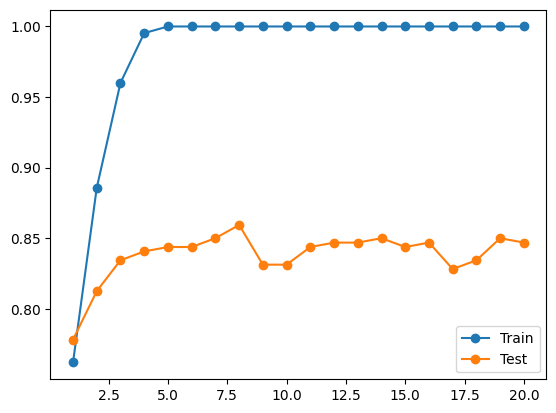

In [354]:
from matplotlib import pyplot

train_scores, test_scores = list(), list()
# define the tree depths to evaluate
values = [i for i in range(1, 21)]
# evaluate a decision tree for each depth
for i in values:
	# configure the model
	model = XGBClassifier(max_depth=i, use_label_encoder=False, eval_metric='logloss')
	# fit model on the training dataset
	model.fit(x_train, y_train)
	# evaluate on the train dataset
	train_yhat = model.predict(x_train)
	train_acc = accuracy_score(y_train, train_yhat)
	train_scores.append(train_acc)
	# evaluate on the test dataset
	test_yhat = model.predict(x_test)
	test_acc = accuracy_score(y_test, test_yhat)
	test_scores.append(test_acc)
	# summarize progress
	print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs tree depth
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
pyplot.legend()
pyplot.show()

>1, train: 0.739, test: 0.747
>2, train: 0.810, test: 0.787
>3, train: 0.883, test: 0.822
>4, train: 0.949, test: 0.853
>5, train: 0.994, test: 0.841
>6, train: 1.000, test: 0.831
>7, train: 1.000, test: 0.844
>8, train: 1.000, test: 0.847
>9, train: 1.000, test: 0.853
>10, train: 1.000, test: 0.847
>11, train: 1.000, test: 0.853
>12, train: 1.000, test: 0.844
>13, train: 1.000, test: 0.834
>14, train: 1.000, test: 0.841
>15, train: 1.000, test: 0.841
>16, train: 1.000, test: 0.831
>17, train: 1.000, test: 0.766
>18, train: 1.000, test: 0.775
>19, train: 1.000, test: 0.759
>20, train: 1.000, test: 0.766


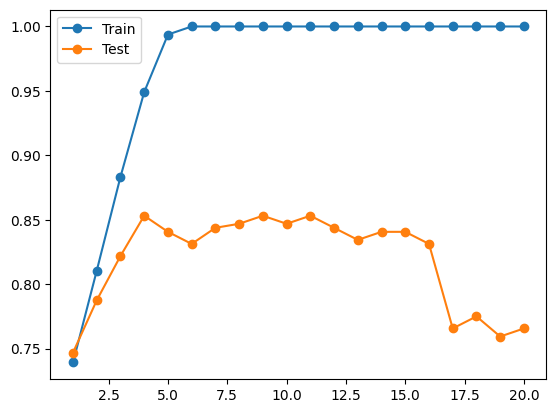

In [355]:
from matplotlib import pyplot

train_scores, test_scores = list(), list()
# define the tree depths to evaluate
values = [i for i in range(1, 21)]
# evaluate a decision tree for each depth
for i in values:
	# configure the model
	model = GradientBoostingClassifier(max_depth=i)
	# fit model on the training dataset
	model.fit(x_train, y_train)
	# evaluate on the train dataset
	train_yhat = model.predict(x_train)
	train_acc = accuracy_score(y_train, train_yhat)
	train_scores.append(train_acc)
	# evaluate on the test dataset
	test_yhat = model.predict(x_test)
	test_acc = accuracy_score(y_test, test_yhat)
	test_scores.append(test_acc)
	# summarize progress
	print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs tree depth
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
pyplot.legend()
pyplot.show()

##### Light GBM

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 417, number of negative: 860
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000541 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4750
[LightGBM] [Info] Number of data points in the train set: 1277, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.326547 -> initscore=-0.723846
[LightGBM] [Info] Start training from score -0.723846
>1, train: 0.735, test: 0.747
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 417, number of negative: 860
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000390 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4750
[LightGBM] [Info] Number of data points in the train set: 

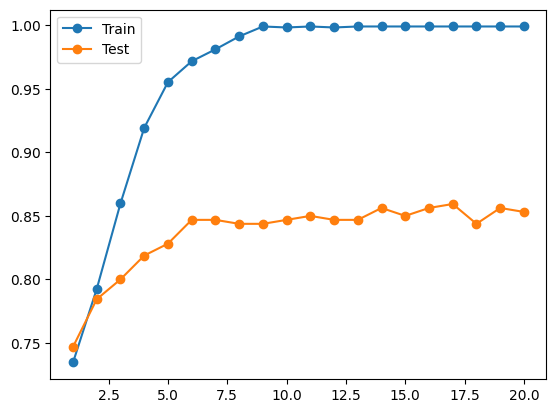

In [356]:
train_scores, test_scores = list(), list()
# define the tree depths to evaluate
values = [i for i in range(1, 21)]
# evaluate a decision tree for each depth
for i in values:
	# configure the model
	model = LGBMClassifier(max_depth=i,num_leaves=31)
	# fit model on the training dataset
	model.fit(x_train, y_train)
	# evaluate on the train dataset
	train_yhat = model.predict(x_train)
	train_acc = accuracy_score(y_train, train_yhat)
	train_scores.append(train_acc)
	# evaluate on the test dataset
	test_yhat = model.predict(x_test)
	test_acc = accuracy_score(y_test, test_yhat)
	test_scores.append(test_acc)
	# summarize progress
	print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs tree depth
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
pyplot.legend()
pyplot.show()

##### Catboost

In [ ]:
# train_scores, test_scores = list(), list()
# # define the tree depths to evaluate
# values = [i for i in range(1, 21)]
# # evaluate a decision tree for each depth
# for i in values:
# 	# configure the model
# 	model = CatBoostClassifier(max_depth=i,verbose=False)
# 	# fit model on the training dataset
# 	model.fit(x_train, y_train)
# 	# evaluate on the train dataset
# 	train_yhat = model.predict(x_train)
# 	train_acc = accuracy_score(y_train, train_yhat)
# 	train_scores.append(train_acc)
# 	# evaluate on the test dataset
# 	test_yhat = model.predict(x_test)
# 	test_acc = accuracy_score(y_test, test_yhat)
# 	test_scores.append(test_acc)
# 	# summarize progress
# 	#print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# # plot of train and test scores vs tree depth
# pyplot.plot(values, train_scores, '-o', label='Train')
# pyplot.plot(values, test_scores, '-o', label='Test')
# pyplot.legend()
# pyplot.show()

In [ ]:
print(len(y_train))

In [ ]:
Hard Voting: In hard voting, the final prediction is the class that gets the majority of votes from all the classifiers12. 
Each classifier in the ensemble votes for a class, and the class with the most votes is predicted12. Hard voting is simpler to implement,
but it can be less accurate than soft voting because it ignores the confidence of each classifier’s prediction3.
    
Soft Voting: In soft voting, the base classifiers output probabilities or numerical scores12.
The final prediction is made by averaging the probabilities for each class and predicting the class with the highest average probability12.
Soft voting is more accurate, but it is also more complex to implement3. It considers the confidence levels of individual models4.
The choice between hard and soft voting depends on the problem domain, the characteristics of the base models,
and the availability of probability estimates4. It’s always a good idea to experiment with both and see which one works best for your specific task. 
Remember, for soft voting to work, all your base classifiers should be able to estimate probabilities (i.e., they should have a predict_proba method).

In [173]:
import pickle

In [174]:
#open the file where you want to store data
file=open('gradient_boost_machine_model.pkl','wb')

#dump info to that file
pickle.dump(gbm_clf_hyp,file)

In [201]:
##########################